## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. 
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [ ]:
#data manipulation libraries
import pandas as pd
import numpy as np

#data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#model tuning libraries
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    #plot_confusion_matrix,
)

from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Loading the dataset

######Importing the train dataset

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/13jhA3yCfk8ltVdo4nqpi_5HywiudQQNs/view?usp=sharing'

# # Verify that you have everything after '='
fluff, id = link.split('=')
print (id) 

id = link.split("/")[-2]
#  storing a dataset in pandas
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Train.csv.csv')  
df = pd.read_csv('Train.csv.csv' )
#making a copy of the dataset
data_copy = df.copy()

sharing




*   The train dataset has been imported.



**Checking the train dataset**

In [ ]:
#displaying the head
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0




*   The train dataset has been successfully imported. 
*   The output above shows the first five rows of the dataset



######Importing the test dataset

In [ ]:
link = 'https://drive.google.com/file/d/1keDoTKDS2J8z6GBS94owi6UZGKS2ogLi/view?usp=sharing'

# # Verify that you have everything after '='
fluff, id = link.split('=')
print (id) 

id = link.split("/")[-2]
#  storing a dataset in pandas
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Test.csv.csv')  
df_test = pd.read_csv('Test.csv.csv' )
#making a copy of the dataset
data_test_copy = df_test.copy()

sharing




*   The test dataset has been imported



**Displaying the test dataset**

In [ ]:
#displaying the head of the dataset
df_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613,-3.820,2.202,1.300,-1.185,-4.496,-1.836,4.723,1.206,-0.342,-5.123,1.017,4.819,3.269,-2.984,1.387,2.032,-0.512,-1.023,7.339,-2.242,0.155,2.054,-2.772,1.851,-1.789,-0.277,-1.255,-3.833,-1.505,1.587,2.291,-5.411,0.870,0.574,4.157,1.428,-10.511,0.455,-1.448,0
1,0.390,-0.512,0.527,-2.577,-1.017,2.235,-0.441,-4.406,-0.333,1.967,1.797,0.410,0.638,-1.390,-1.883,-5.018,-3.827,2.418,1.762,-3.242,-3.193,1.857,-1.708,0.633,-0.588,0.084,3.014,-0.182,0.224,0.865,-1.782,-2.475,2.494,0.315,2.059,0.684,-0.485,5.128,1.721,-1.488,0
2,-0.875,-0.641,4.084,-1.590,0.526,-1.958,-0.695,1.347,-1.732,0.466,-4.928,3.565,-0.449,-0.656,-0.167,-1.630,2.292,2.396,0.601,1.794,-2.120,0.482,-0.841,1.790,1.874,0.364,-0.169,-0.484,-2.119,-2.157,2.907,-1.319,-2.997,0.460,0.620,5.632,1.324,-1.752,1.808,1.676,0
3,0.238,1.459,4.015,2.534,1.197,-3.117,-0.924,0.269,1.322,0.702,-5.578,-0.851,2.591,0.767,-2.391,-2.342,0.572,-0.934,0.509,1.211,-3.260,0.105,-0.659,1.498,1.100,4.143,-0.248,-1.137,-5.356,-4.546,3.809,3.518,-3.074,-0.284,0.955,3.029,-1.367,-3.412,0.906,-2.451,0
4,5.828,2.768,-1.235,2.809,-1.642,-1.407,0.569,0.965,1.918,-2.775,-0.530,1.375,-0.651,-1.679,-0.379,-4.443,3.894,-0.608,2.945,0.367,-5.789,4.598,4.450,3.225,0.397,0.248,-2.362,1.079,-0.473,2.243,-3.591,1.774,-1.502,-2.227,4.777,-6.560,-0.806,-0.276,-3.858,-0.538,0




*   The test dataset has been successfully loaded.
*   The code above shows the first five rows of the dataset



## Data Overview

- Observations
- Sanity checks

**Checking the shape of the datasets**

In [ ]:
#checking shape of train dataset
df.shape

(20000, 41)



*   The train dataset has 20000 rows and 41 columns




In [ ]:
#checking the shape of the test dataset
df_test.shape

(5000, 41)



*   The test dataset has 5000 rows and 41 columns




**checking the datatypes of the datasets**

In [ ]:
#checking the datatypes of the train dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22



*   All columns are of float datatype apart from the target column which has int datatype




In [ ]:
#checking the datatypes of the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

**Checking for duplicate values**

In [ ]:
#checking for dupliate values in train dataset
df.duplicated().sum()

0



*   There are no duplicated values in the train dataset




In [ ]:
#checking for dupliate values in test dataset
df_test.duplicated().sum()

0



*   There are 0 duplicated values in the test dataset




**Checking for missing values in the dataset**

In [ ]:
#checking for missing values in train dataset
df.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64



*   Columns v1 and v2 have 18 missing values on each.
*   All other missing values have no missing values



In [ ]:
#checking for missing values in test dataset
df_test.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64



*   Column v1 has 5 missing values while column v2 has 6 missing values
*   All the other columns have no missing values



**Checking the statistical summery of the dataset**

In [ ]:
#checking the statistical summery in train dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.000,-0.272,3.442,-11.876,-2.737,-0.748,1.840,15.493
V2,19982.000,0.440,3.151,-12.320,-1.641,0.472,2.544,13.089
V3,20000.000,2.485,3.389,-10.708,0.207,2.256,4.566,17.091
V4,20000.000,-0.083,3.432,-15.082,-2.348,-0.135,2.131,13.236
V5,20000.000,-0.054,2.105,-8.603,-1.536,-0.102,1.340,8.134
V6,20000.000,-0.995,2.041,-10.227,-2.347,-1.001,0.380,6.976
V7,20000.000,-0.879,1.762,-7.950,-2.031,-0.917,0.224,8.006
V8,20000.000,-0.548,3.296,-15.658,-2.643,-0.389,1.723,11.679
V9,20000.000,-0.017,2.161,-8.596,-1.495,-0.068,1.409,8.138
V10,20000.000,-0.013,2.193,-9.854,-1.411,0.101,1.477,8.108




*   v1 has a maximum value of 15.493
*   v2 has a minimum value of -12.320 and a standered deviation of 3.151
* v7 has a maximum value of 8.006, a minimum value of -7.950 and a mean value of -0.879



In [ ]:
#checking the statistical summery in test dataset
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,4995.000,-0.278,3.466,-12.382,-2.744,-0.765,1.831,13.504
V2,4994.000,0.398,3.140,-10.716,-1.649,0.427,2.444,14.079
V3,5000.000,2.552,3.327,-9.238,0.315,2.260,4.587,15.315
V4,5000.000,-0.049,3.414,-14.682,-2.293,-0.146,2.166,12.140
V5,5000.000,-0.080,2.111,-7.712,-1.615,-0.132,1.341,7.673
V6,5000.000,-1.042,2.005,-8.924,-2.369,-1.049,0.308,5.068
V7,5000.000,-0.908,1.769,-8.124,-2.054,-0.940,0.212,7.616
V8,5000.000,-0.575,3.332,-12.253,-2.642,-0.358,1.713,10.415
V9,5000.000,0.030,2.174,-6.785,-1.456,-0.080,1.450,8.851
V10,5000.000,0.019,2.145,-8.171,-1.353,0.166,1.511,6.599


## Exploratory Data Analysis (EDA)

###Univariet Analysis

### Plotting histograms and boxplots for all the variables

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

<ipython-input-17-f3b56adba9bd>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f2, (ax_box2, ax_hist2) = plt.subplots(


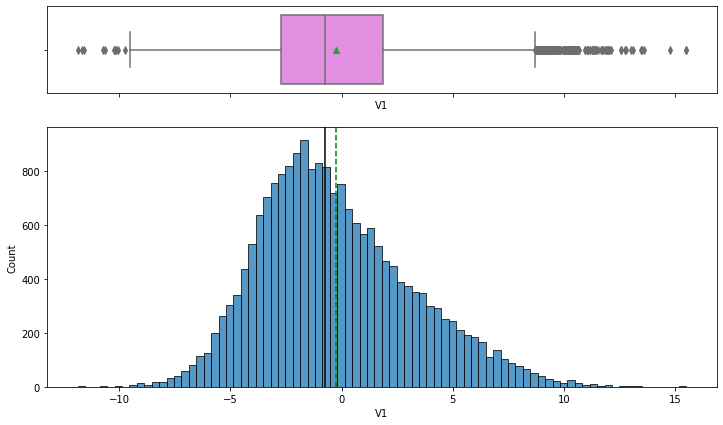

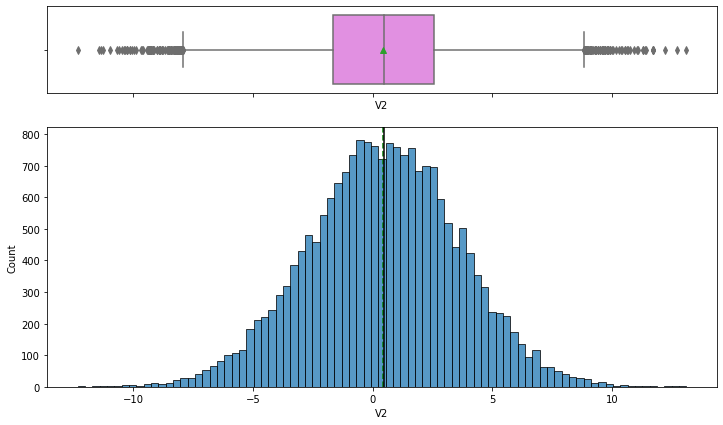

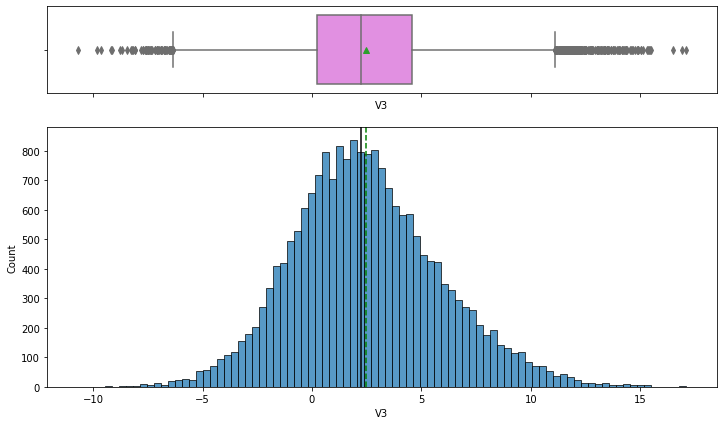

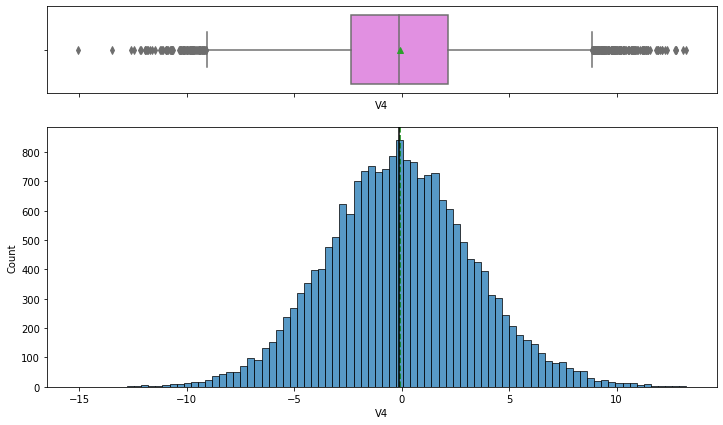

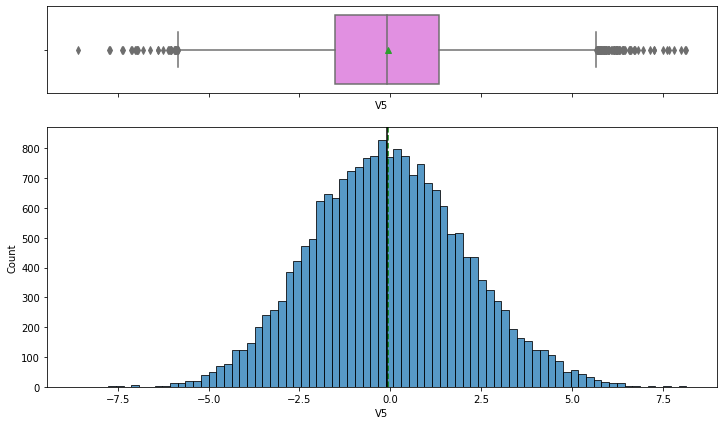

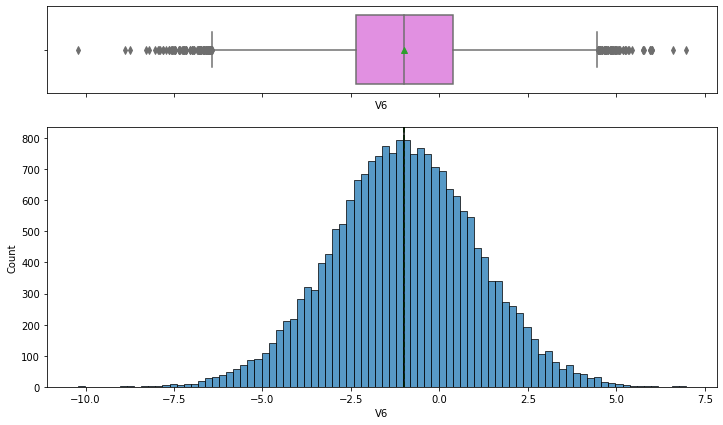

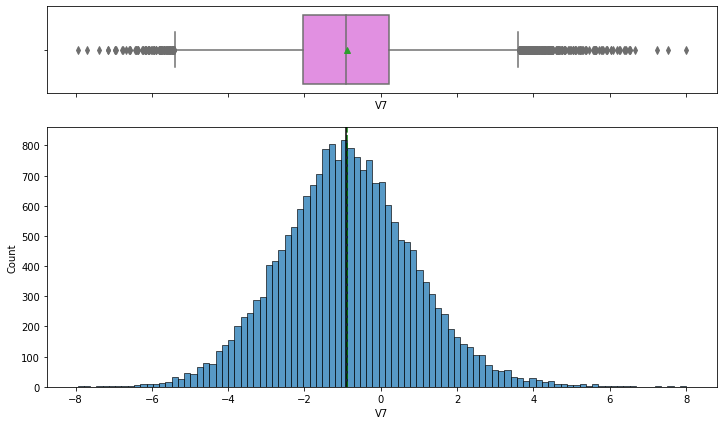

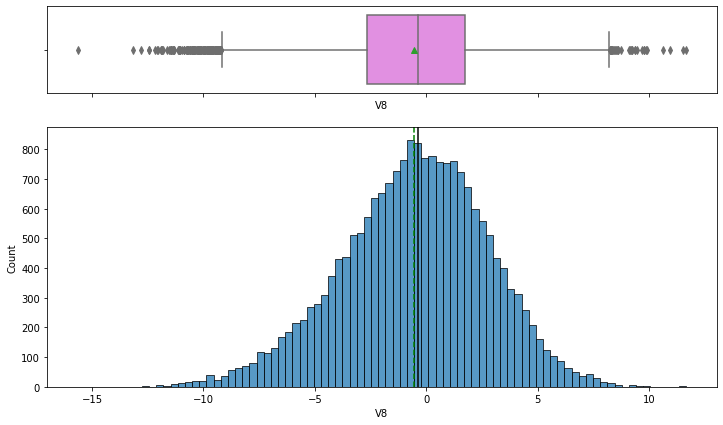

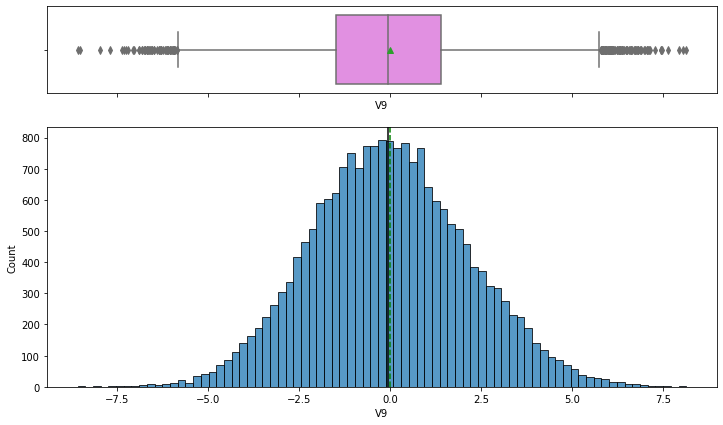

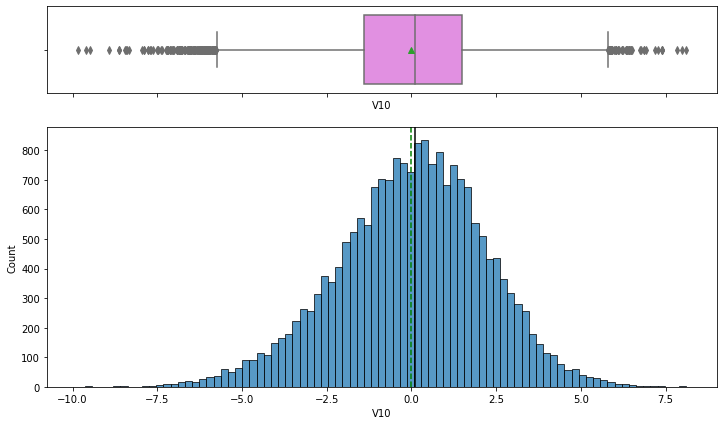

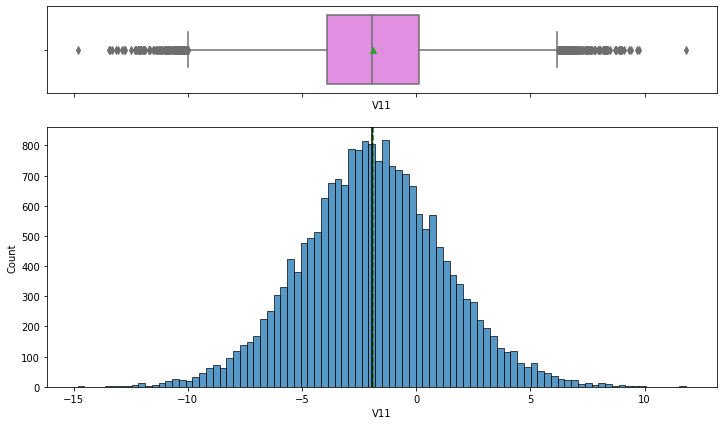

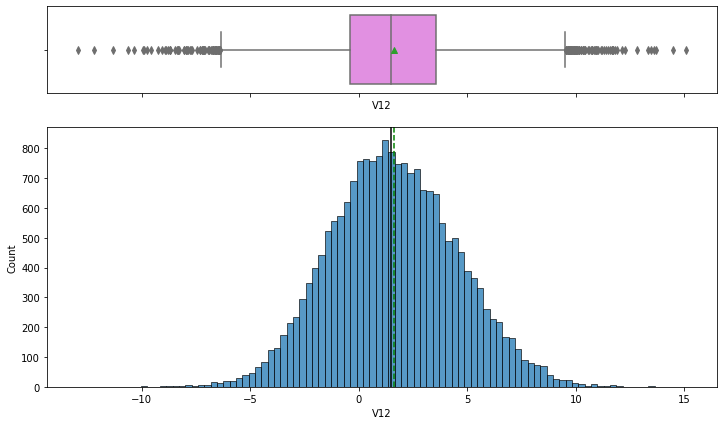

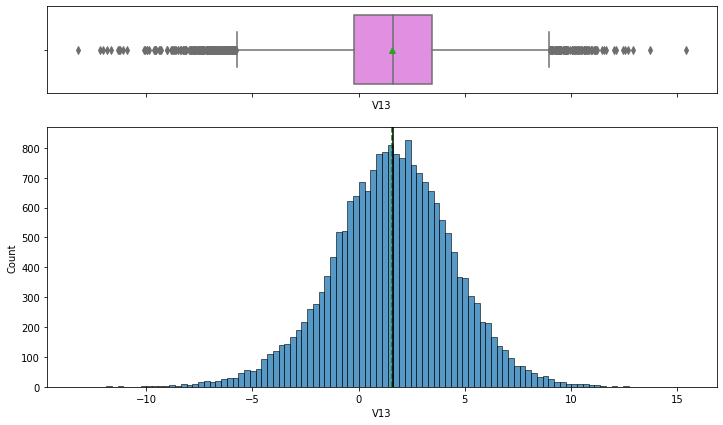

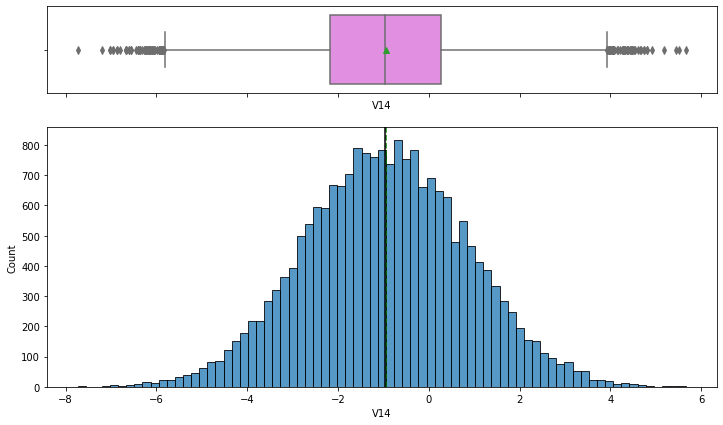

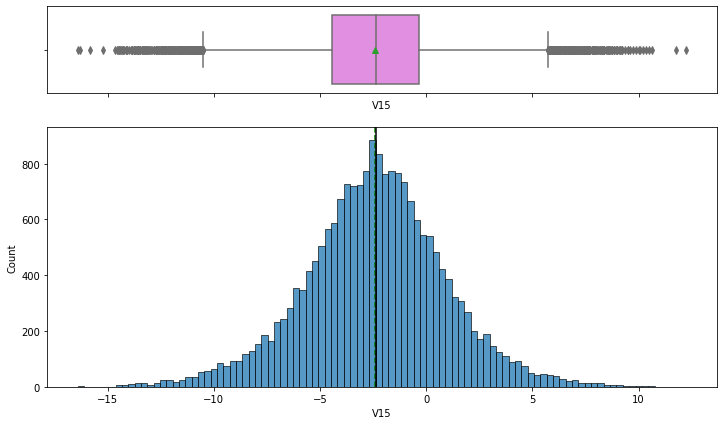

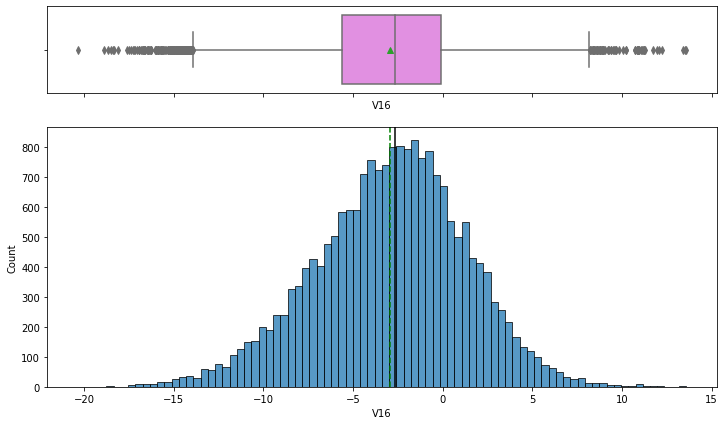

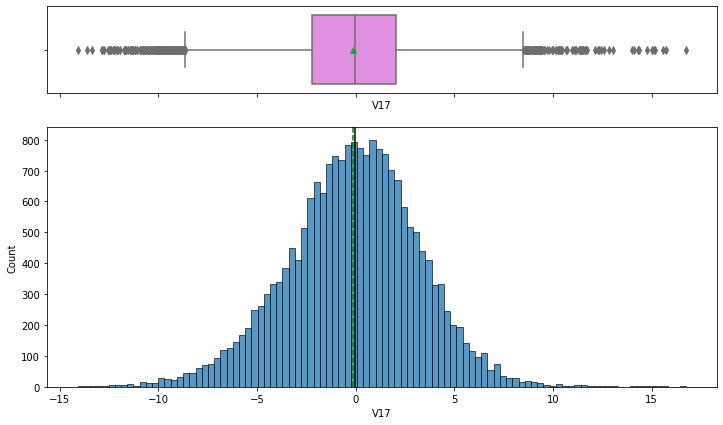

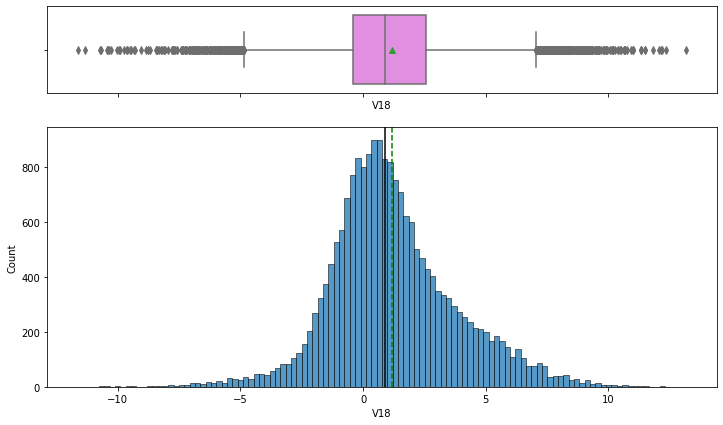

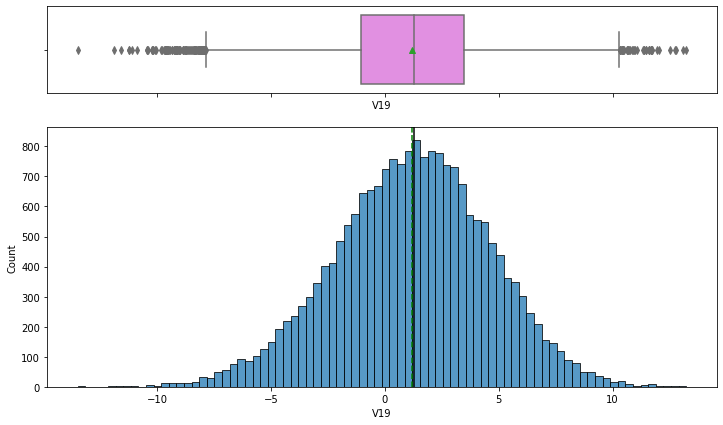

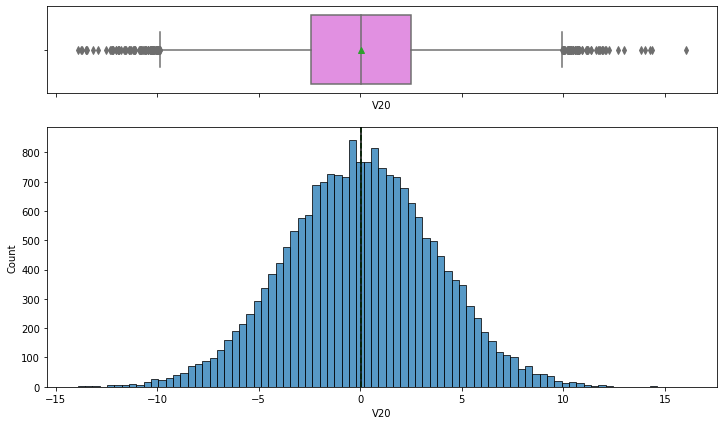

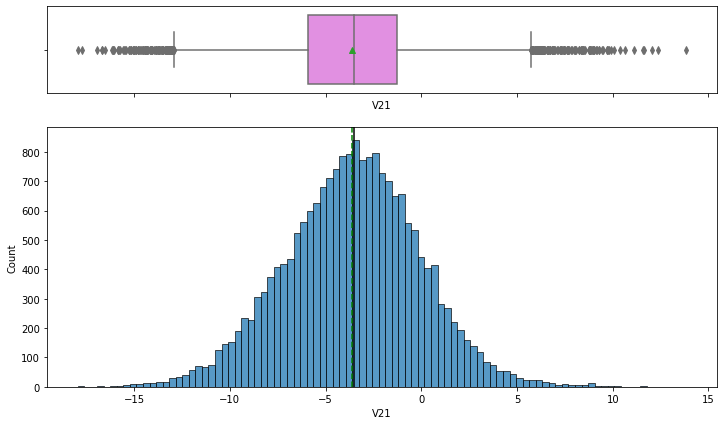

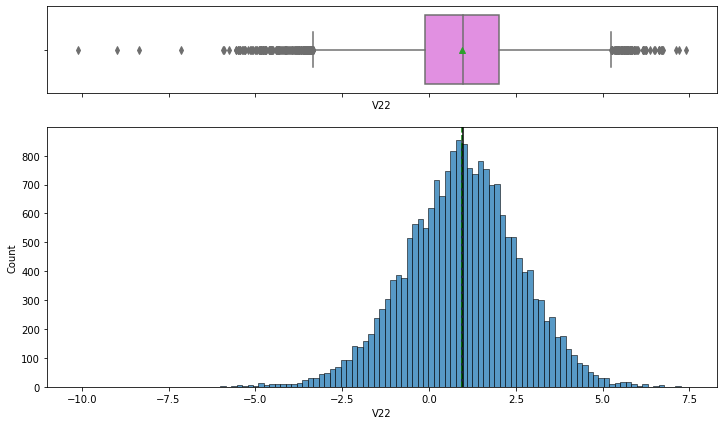

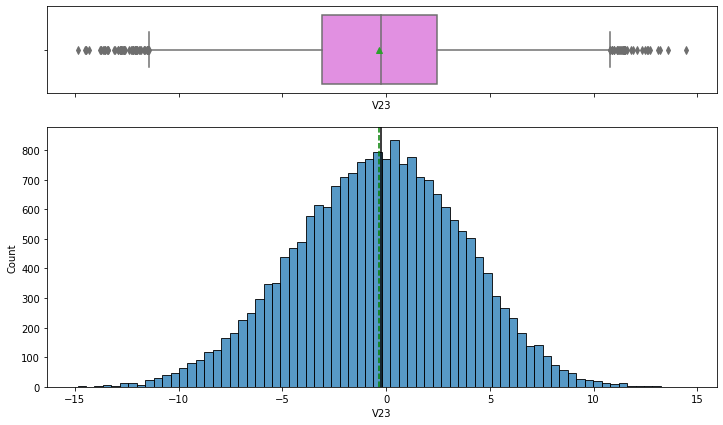

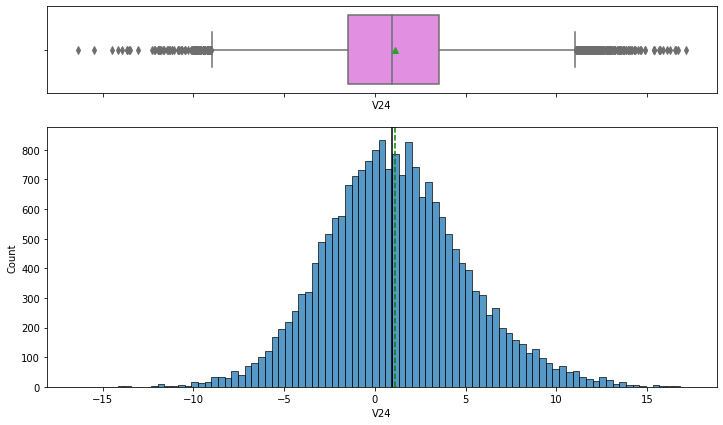

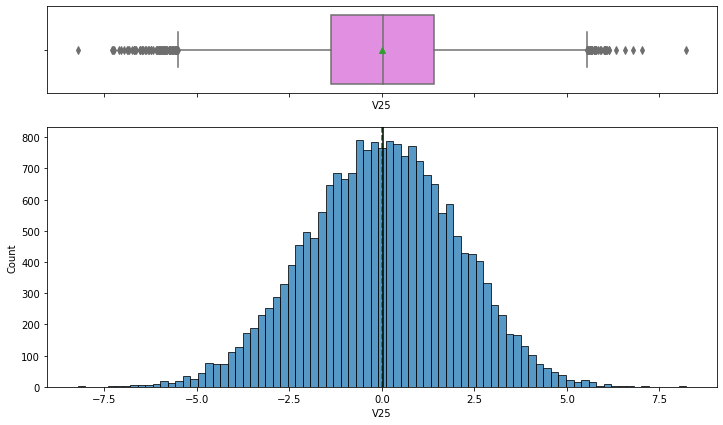

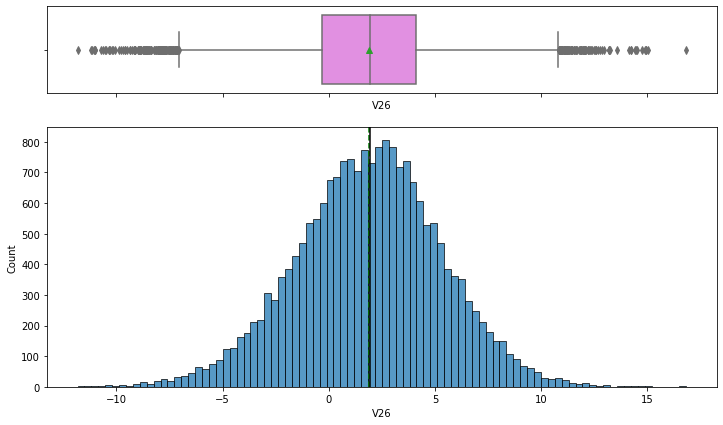

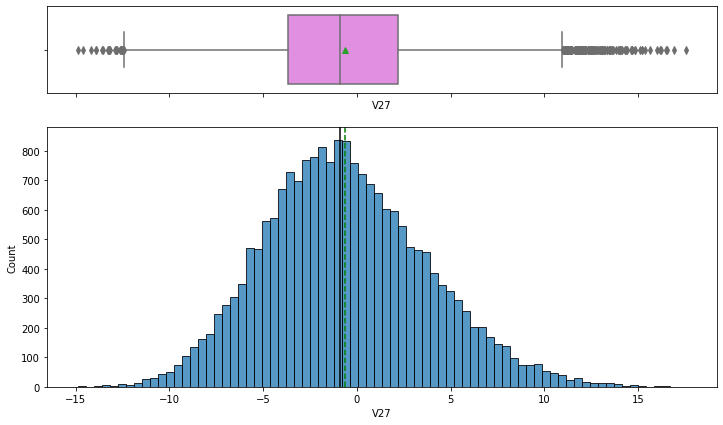

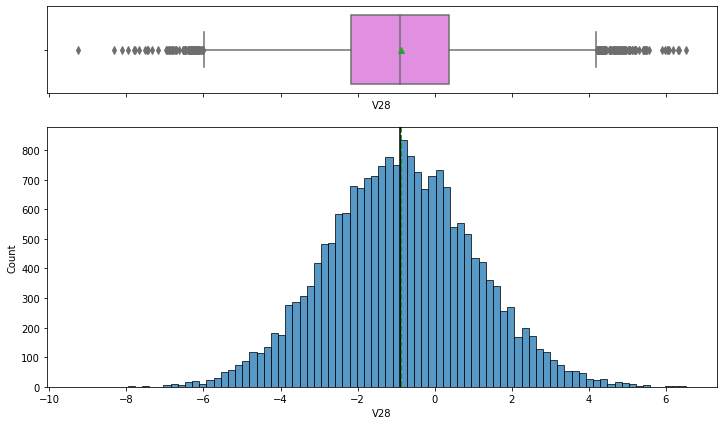

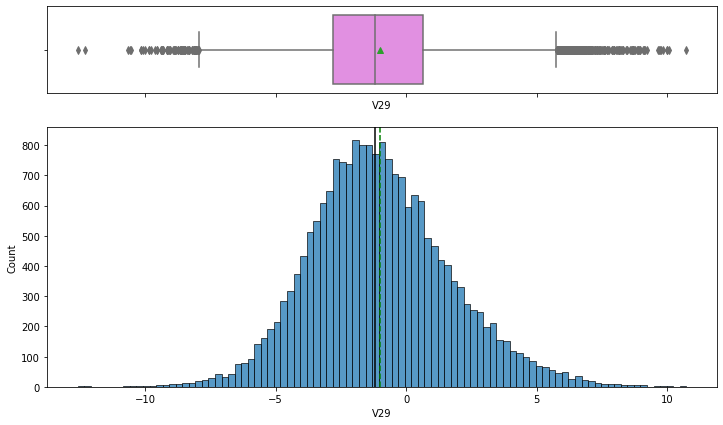

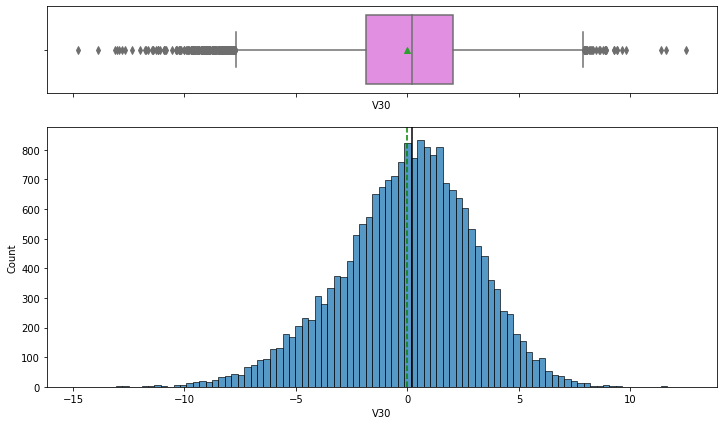

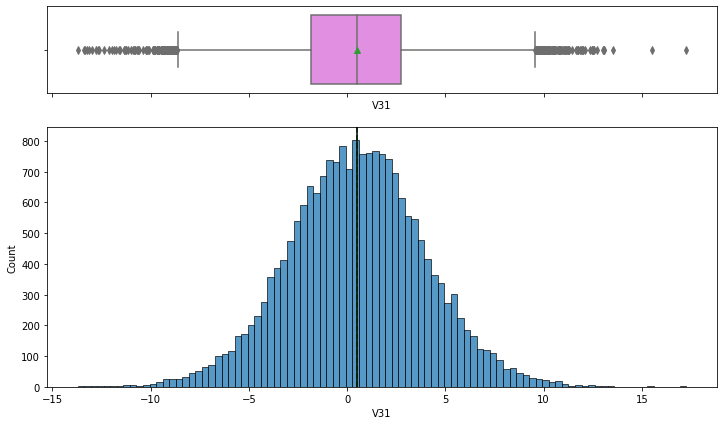

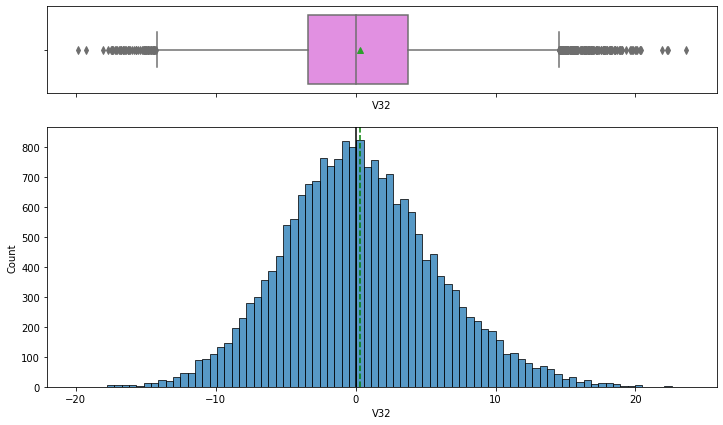

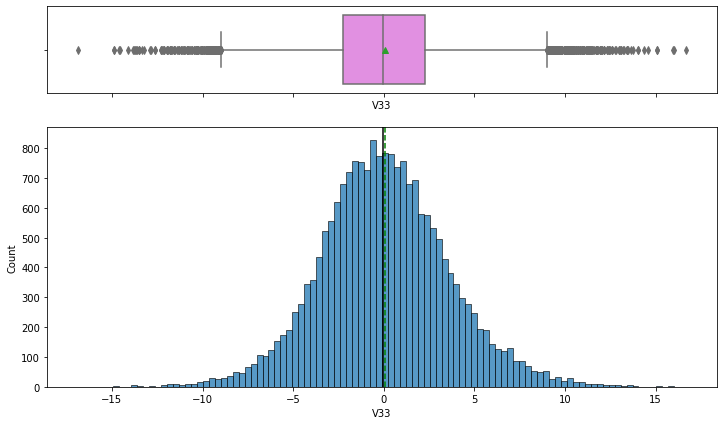

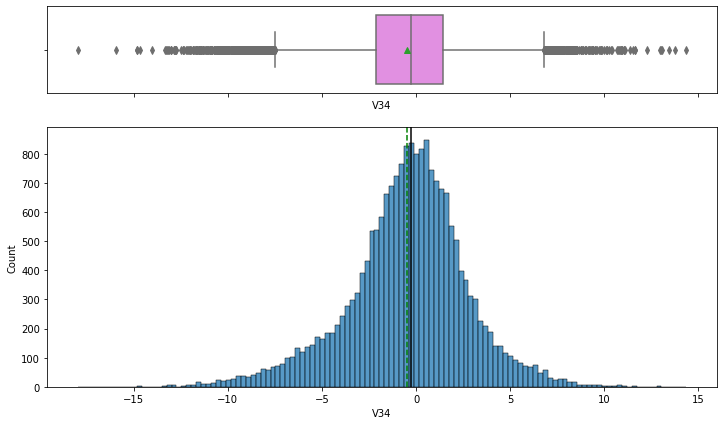

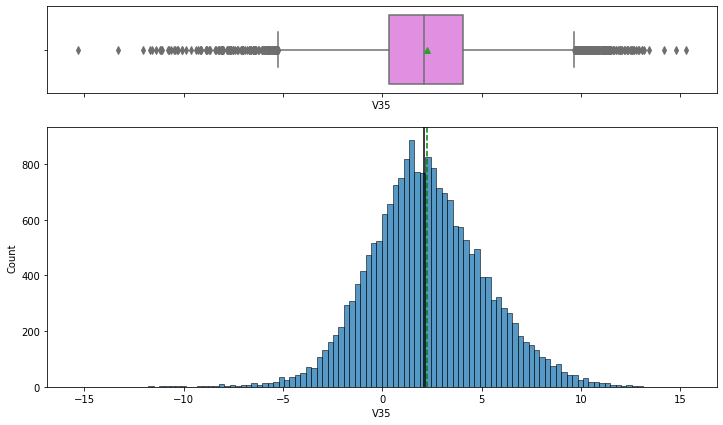

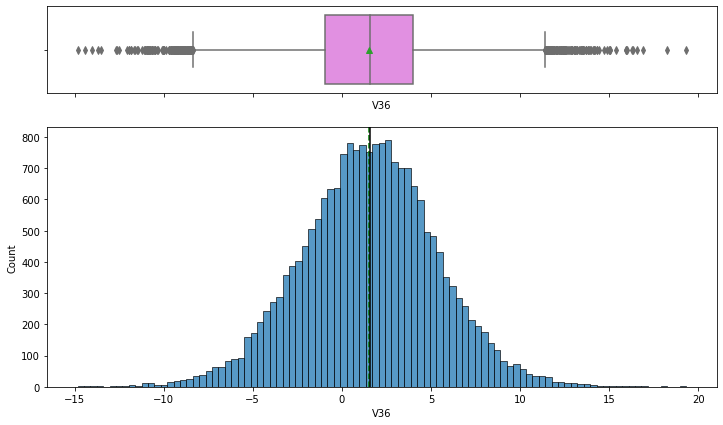

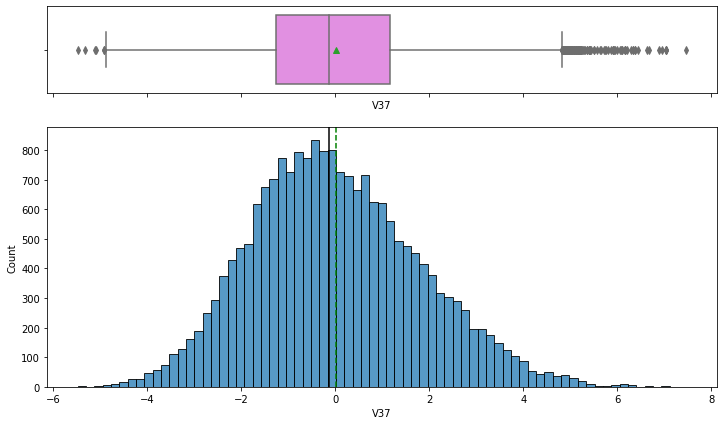

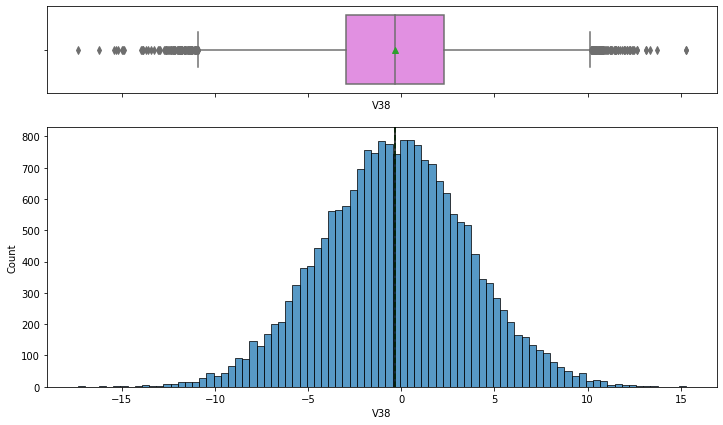

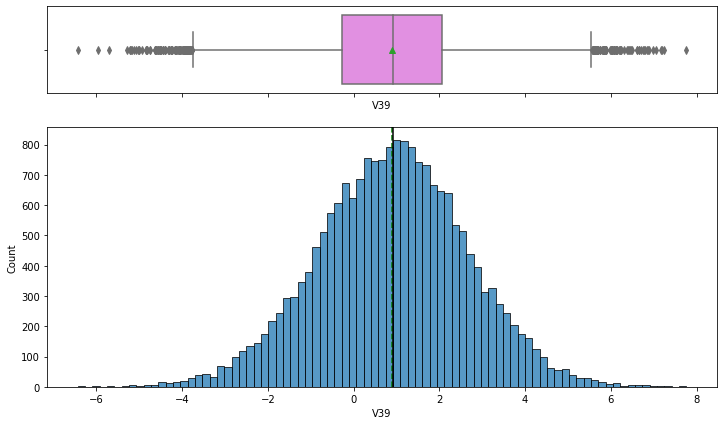

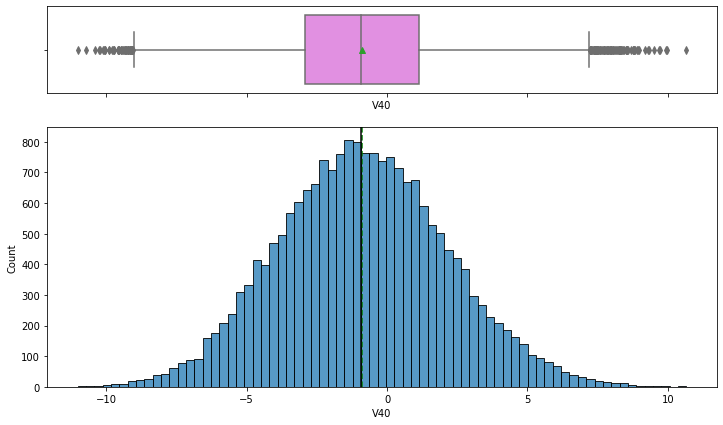

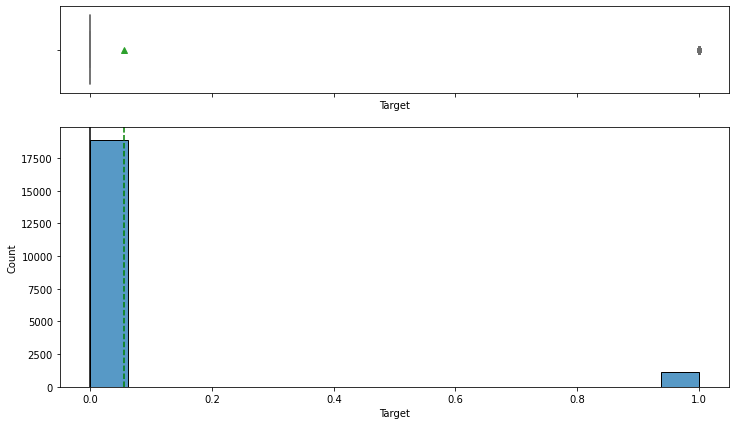

In [ ]:
#plotting features for train dataset
for feature in df.columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None) ## Please change the dataframe name as you define while reading the data



*   The data on the columns is normally distributed
*   There is presence of outliers in every column apart from the target variable
* The target variable is not balanced. Most values lie on the 0 mark



<ipython-input-17-f3b56adba9bd>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f2, (ax_box2, ax_hist2) = plt.subplots(


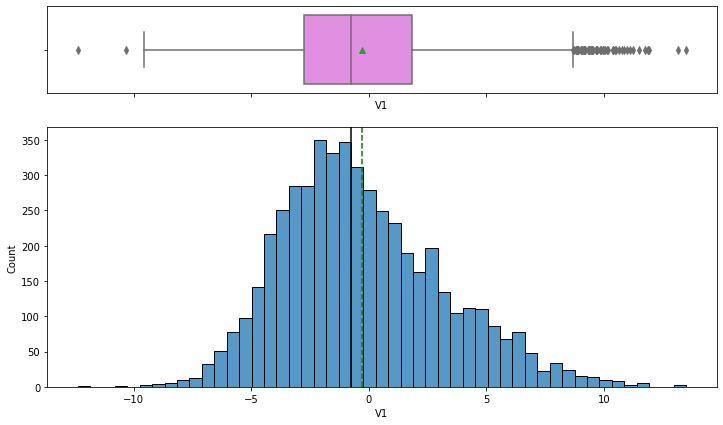

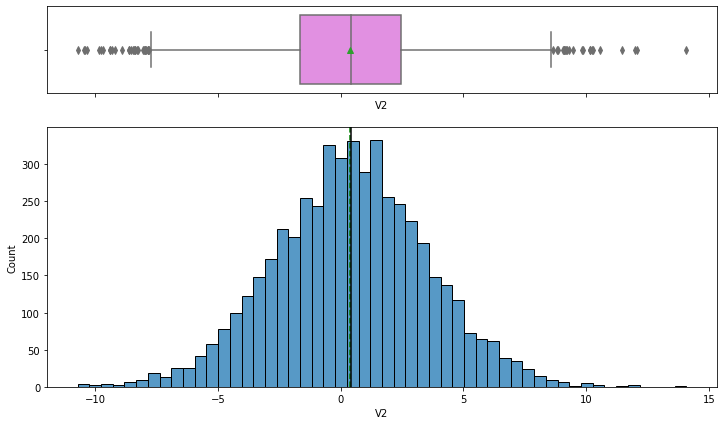

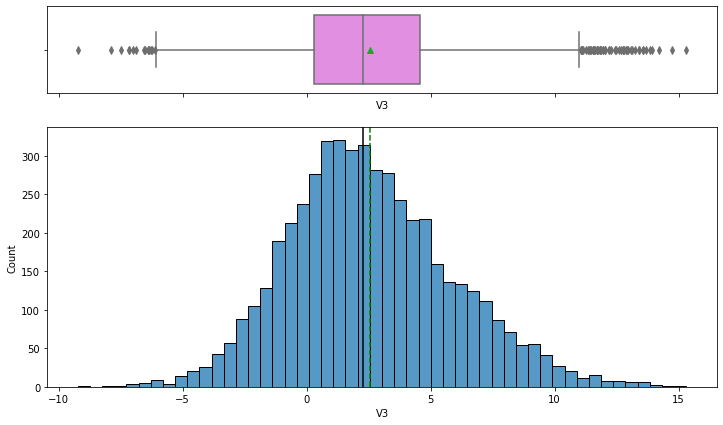

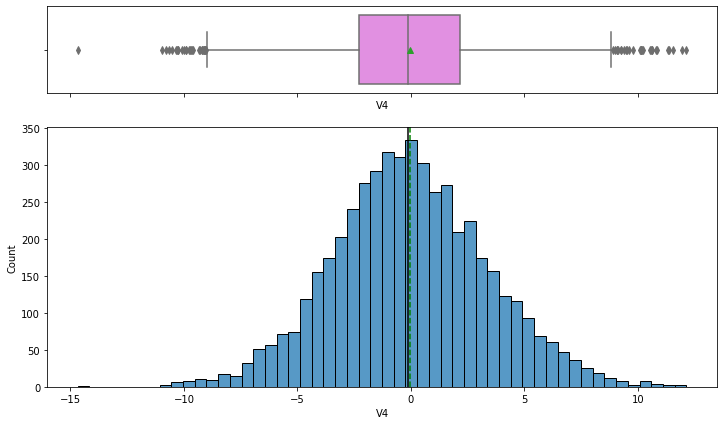

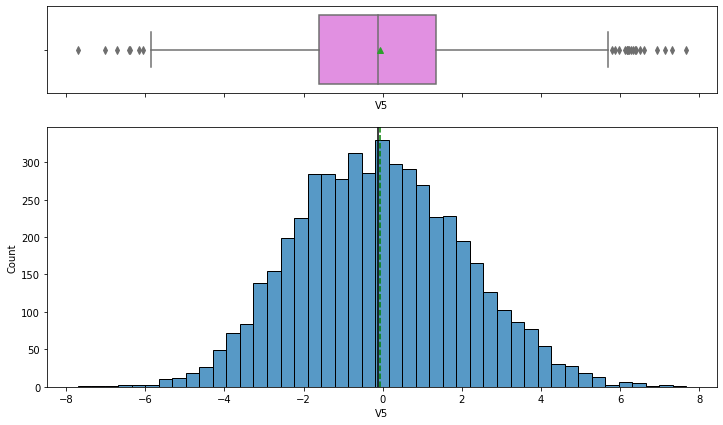

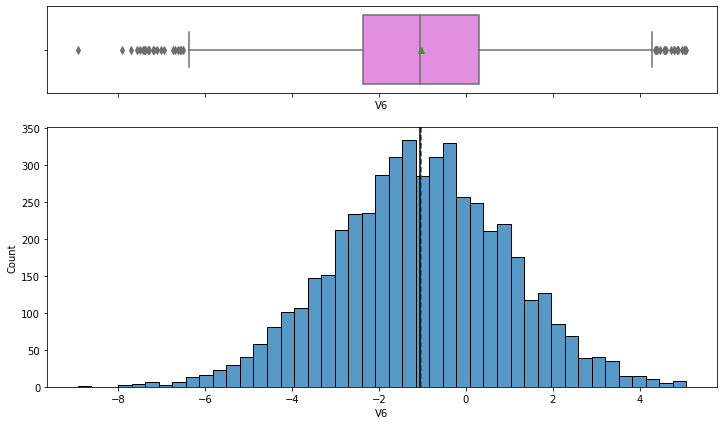

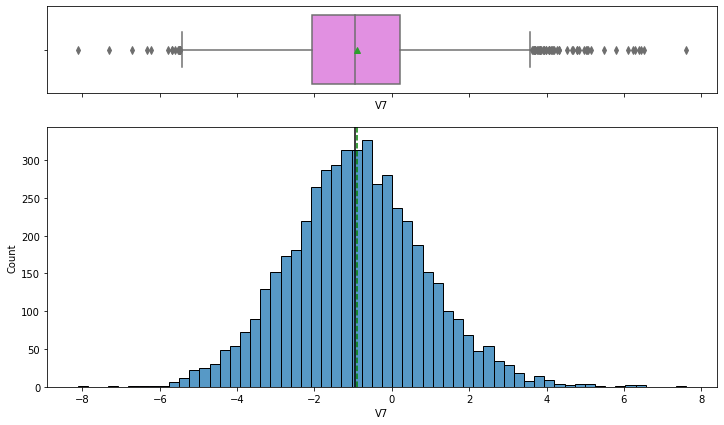

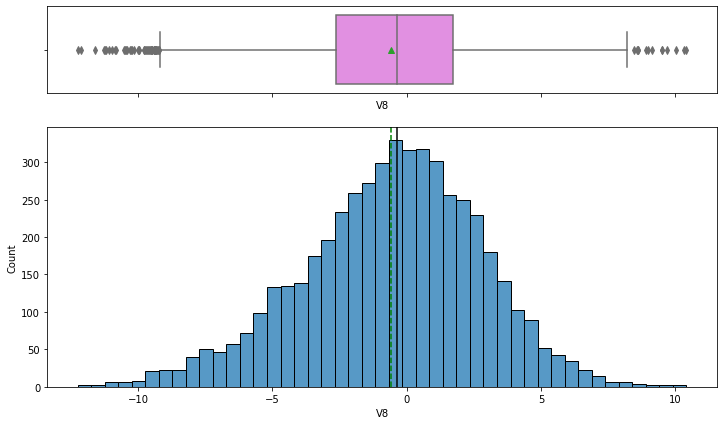

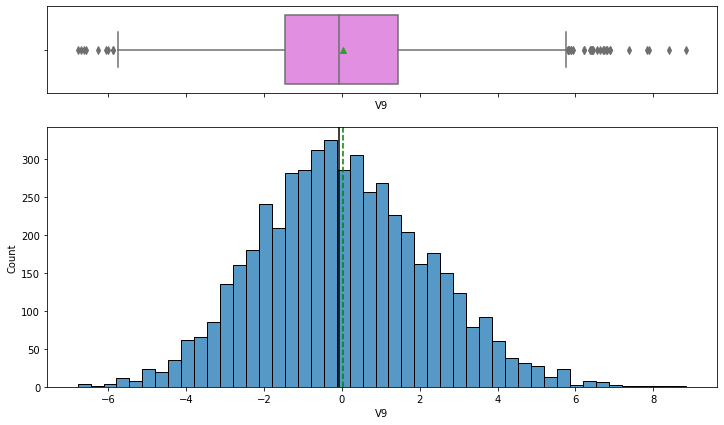

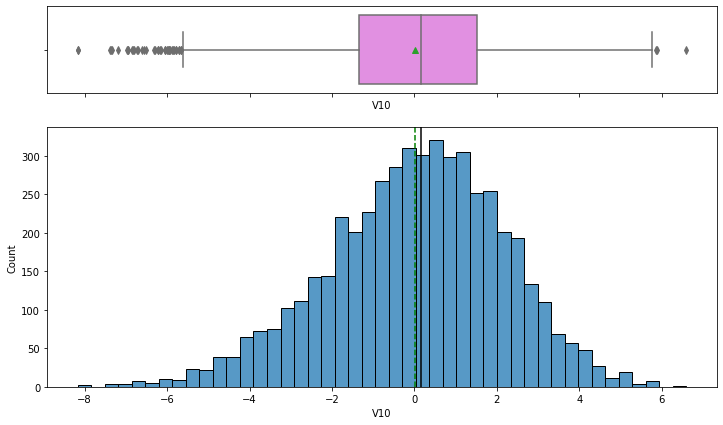

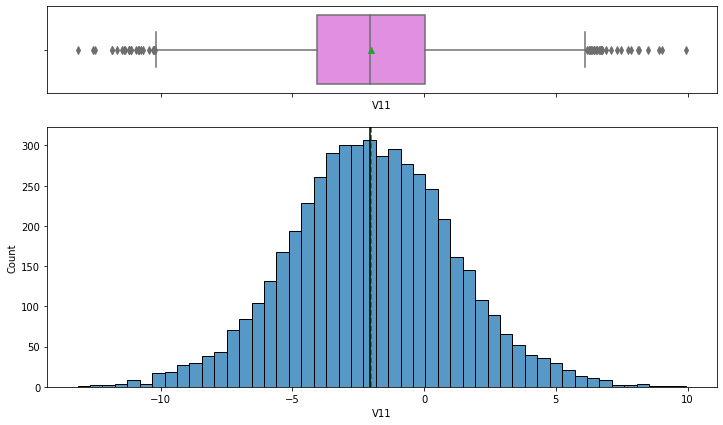

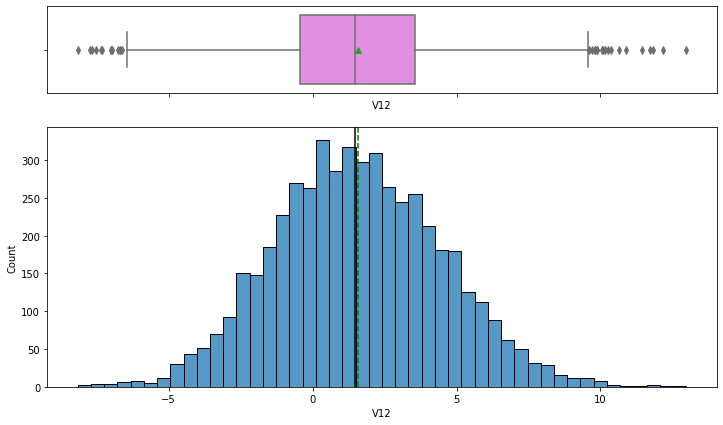

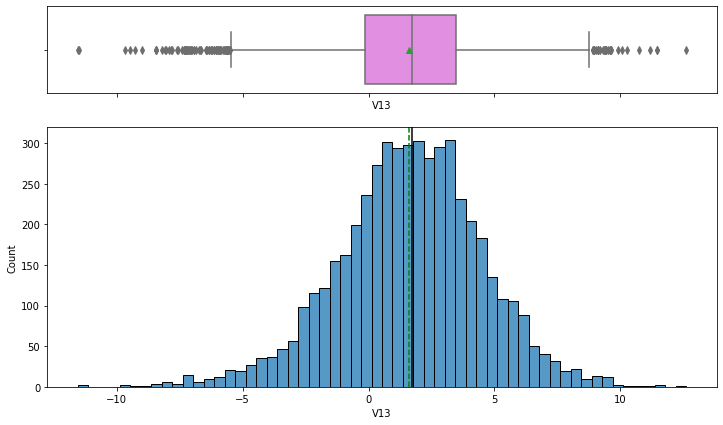

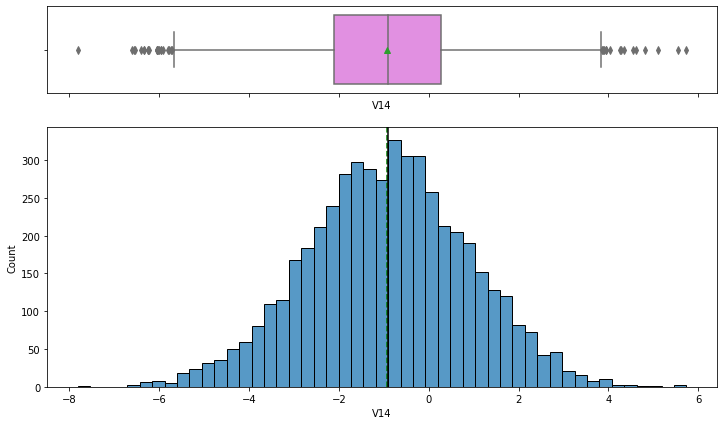

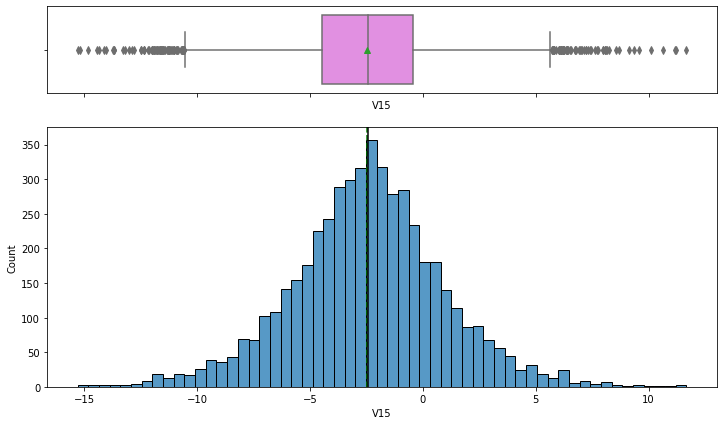

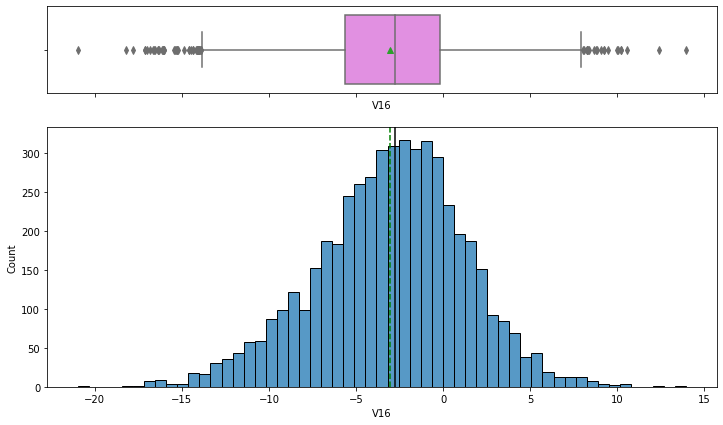

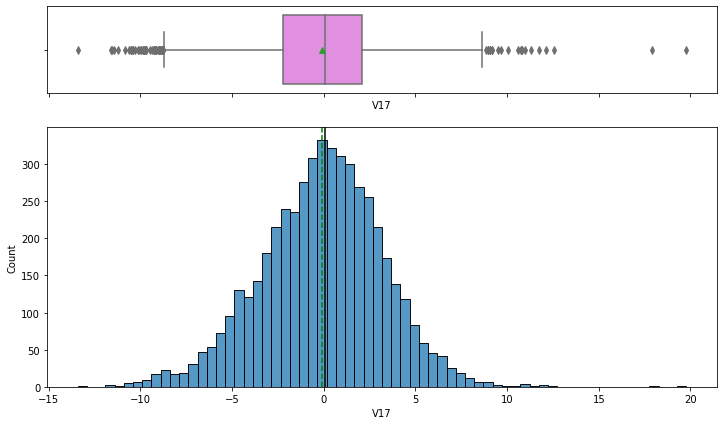

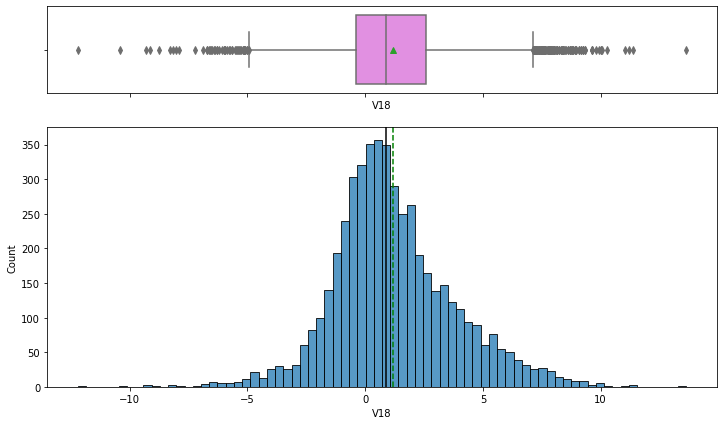

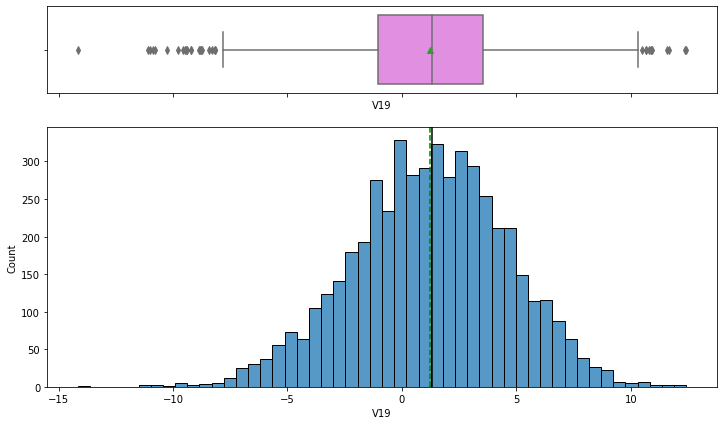

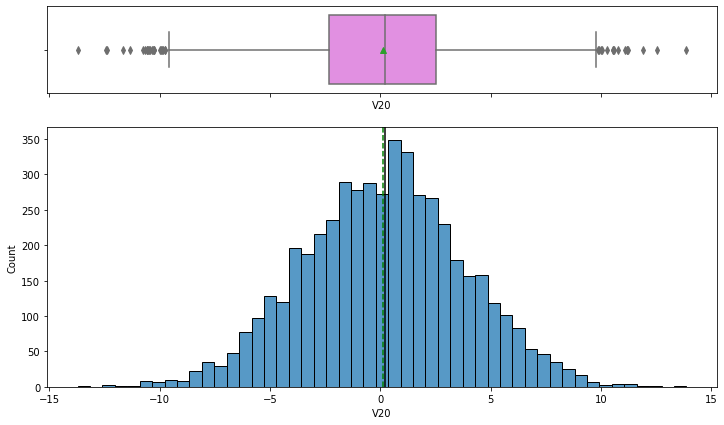

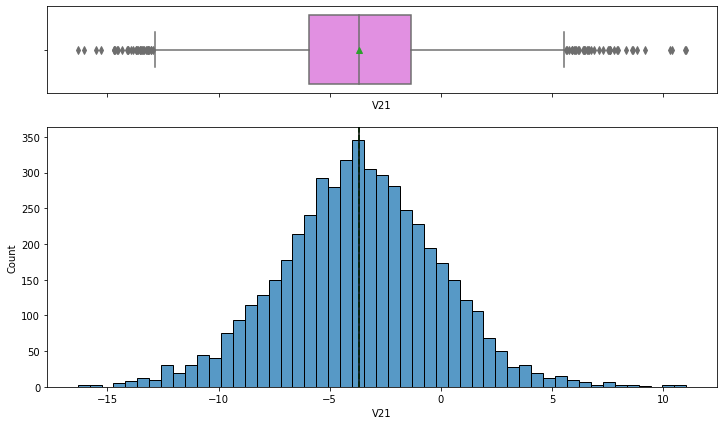

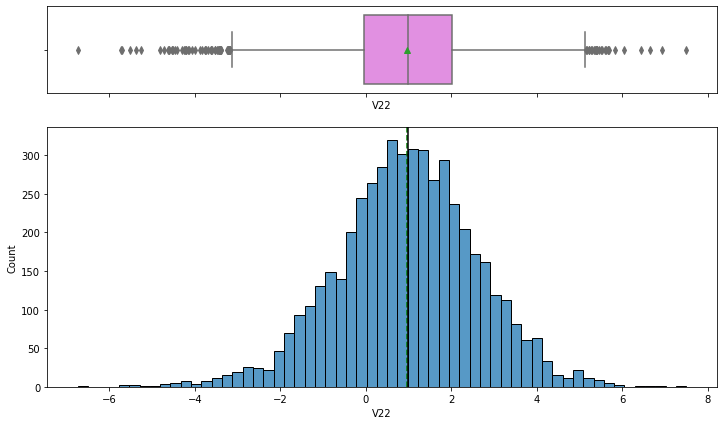

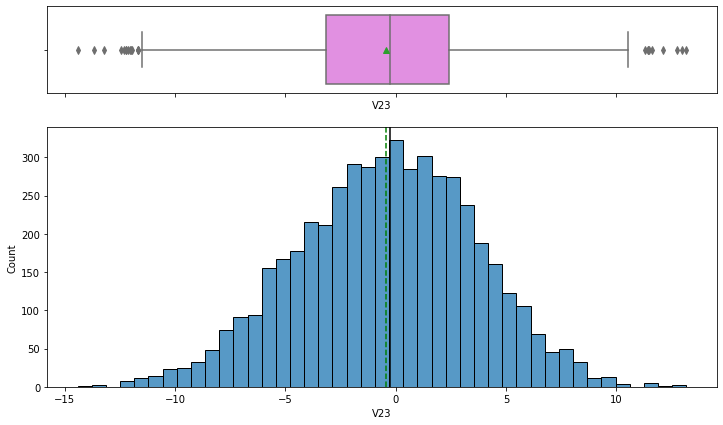

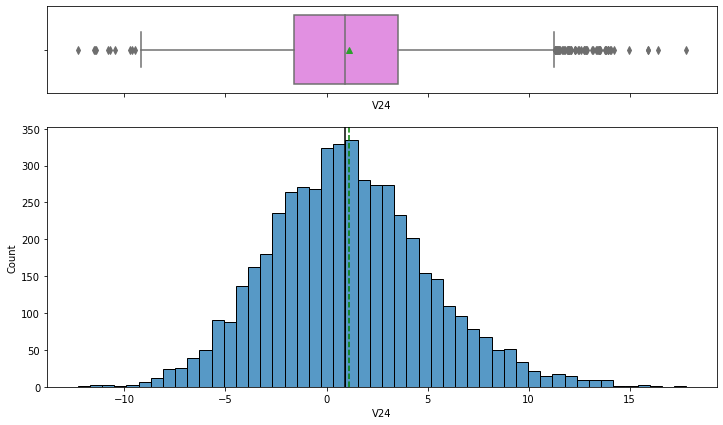

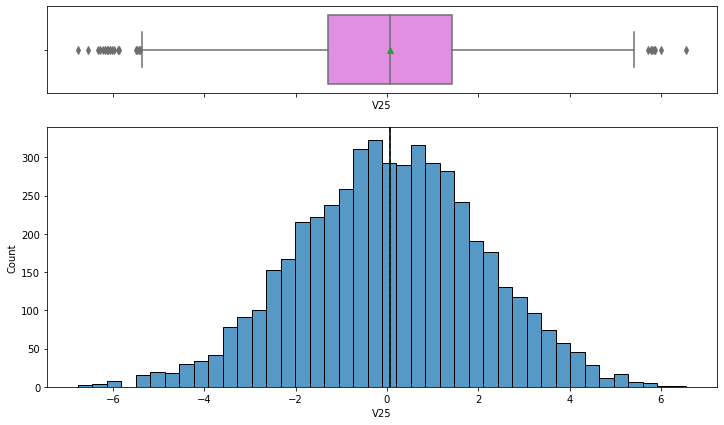

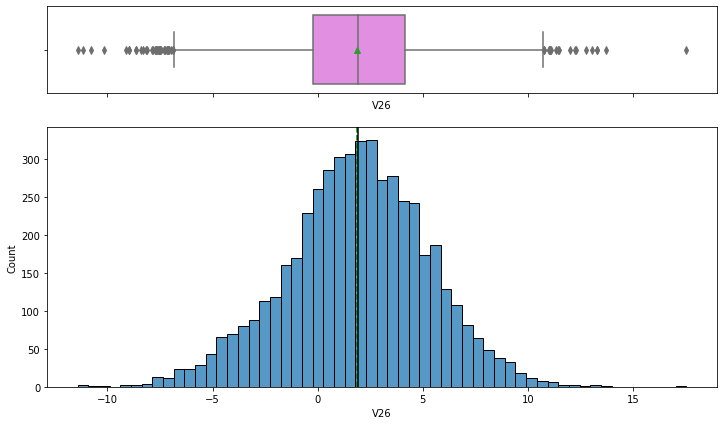

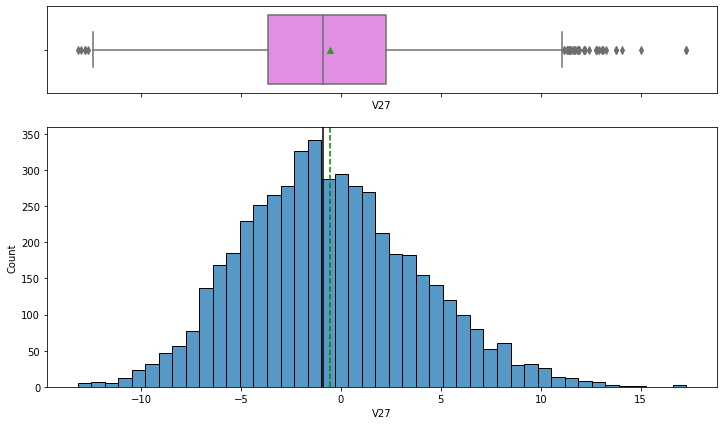

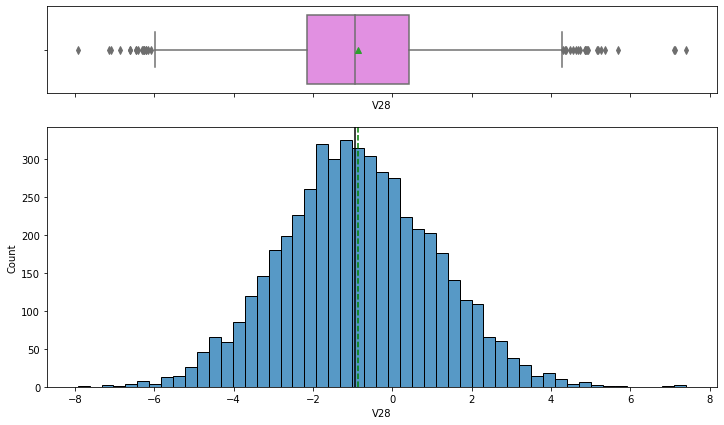

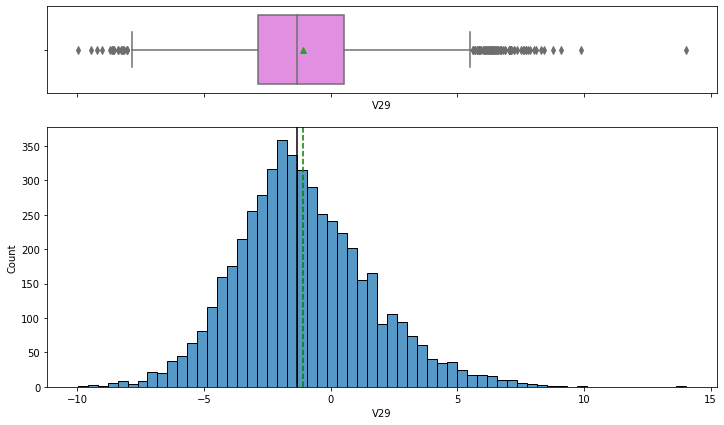

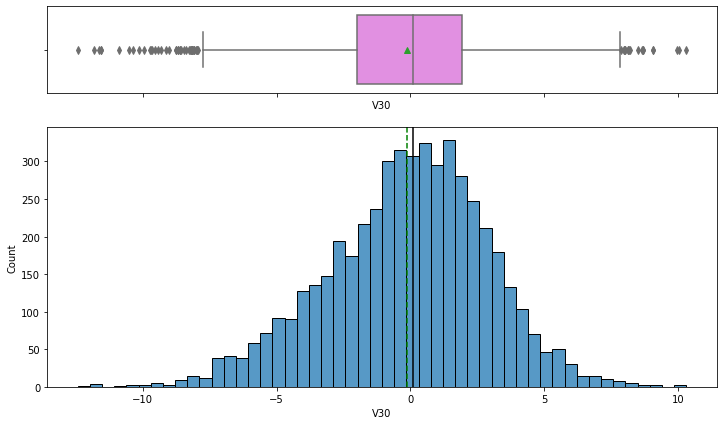

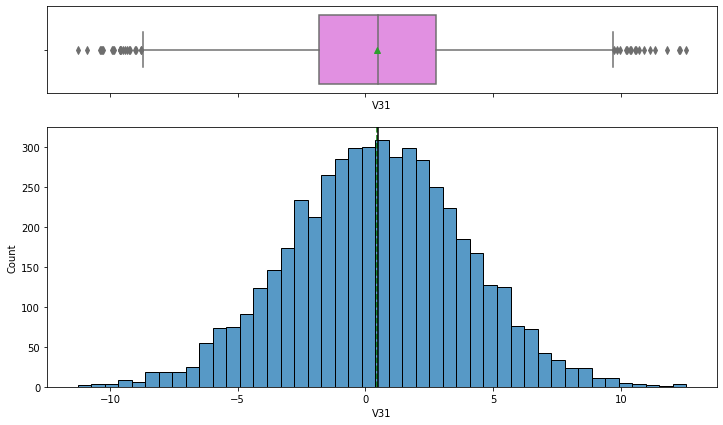

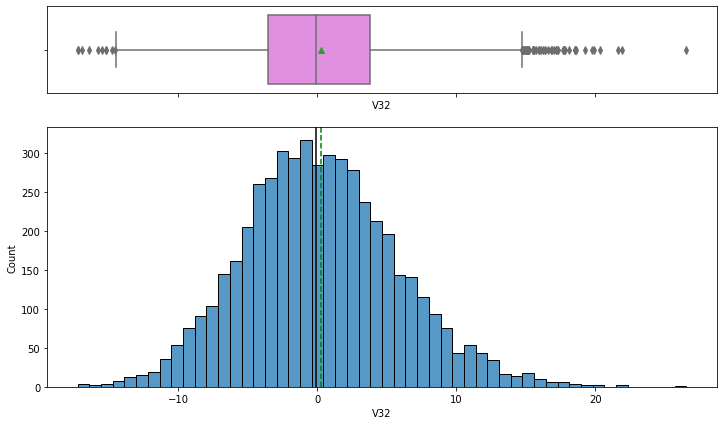

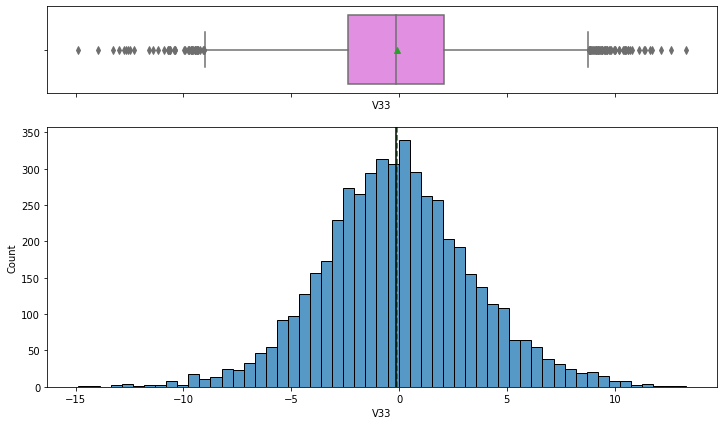

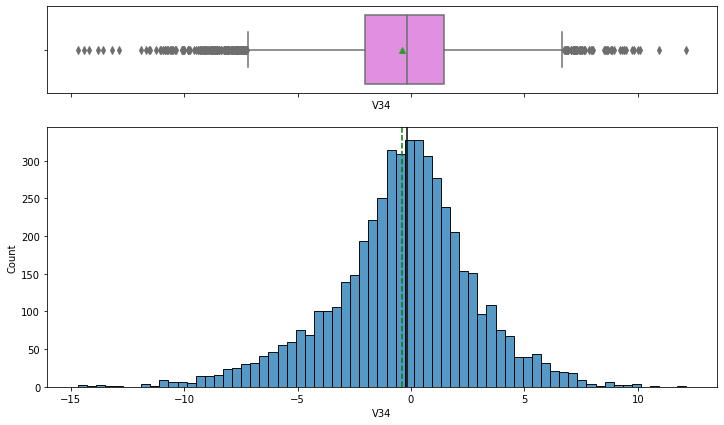

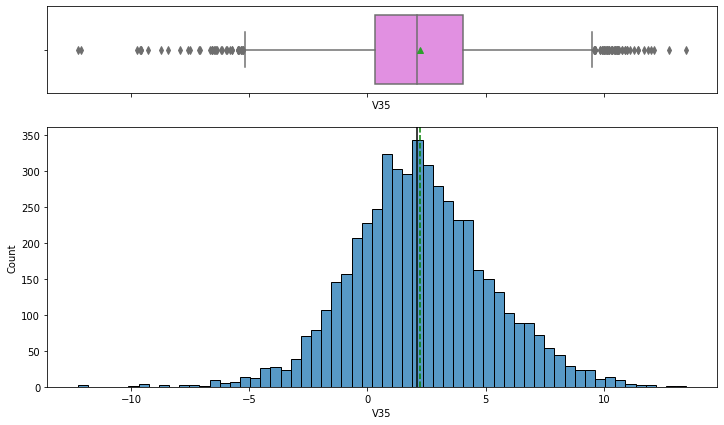

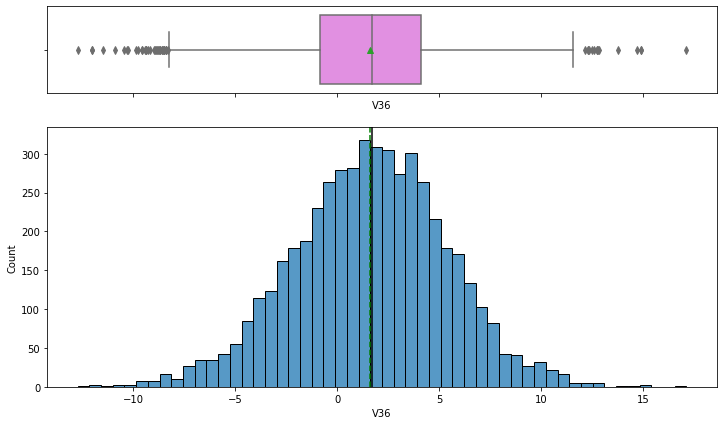

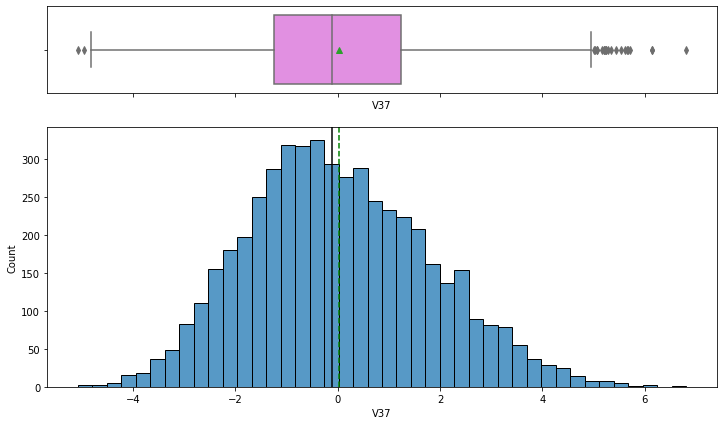

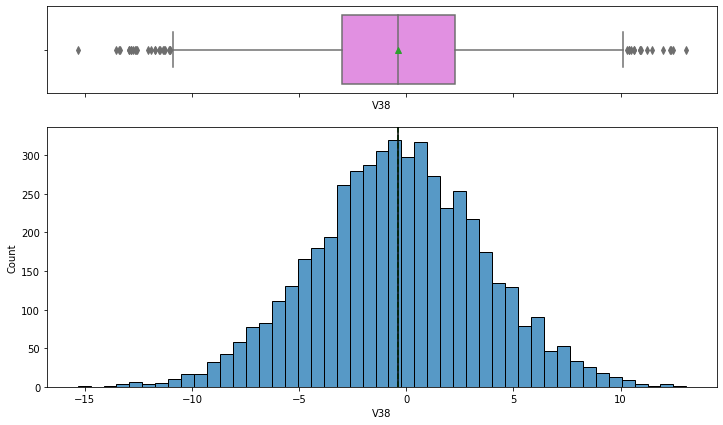

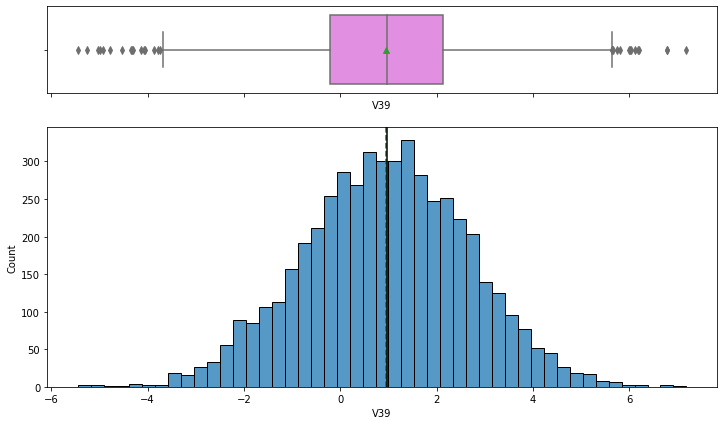

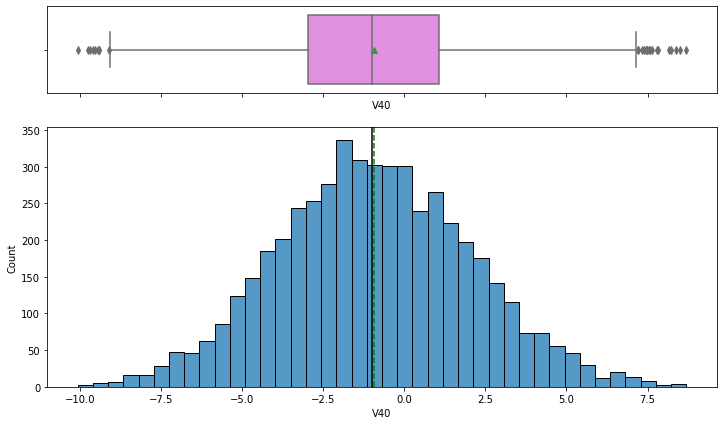

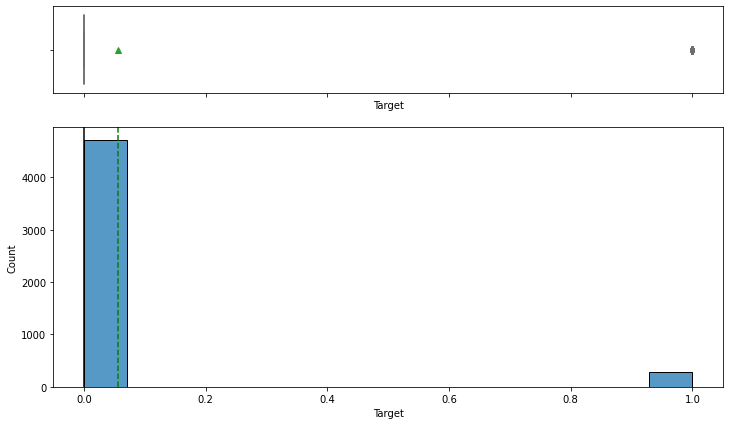

In [ ]:
#plotting features for test dataset
for feature in df_test.columns:
    histogram_boxplot(df_test, feature, figsize=(12, 7), kde=False, bins=None) ## Please change the dataframe name as you define while reading the data





*   The data on the columns is normally distributed
*   There is presence of outliers in every column apart from the target variable
* The target variable is not balanced. Most values lie on the 0 mark





######Observing the target variable

In [ ]:
#checking the value counts of the train dataset
df['Target'].value_counts()

0    18890
1     1110
Name: Target, dtype: int64



*   There are 18890 0 values and 1110 1 values in the target column




In [ ]:
#checking the value counts of the test dataset
df_test['Target'].value_counts()

0    4718
1     282
Name: Target, dtype: int64



*   There are 4718 0 values and 282 1 values in the target column




## Data Pre-processing

**Dropping the target variable**

In [ ]:
#dropping the target variable
x = df.drop(['Target'], axis = 1)
y = df['Target']

In [ ]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510




*   The Target column has been dropped




**Dividing data into train and validation sets**

In [ ]:
#dividing the data to 75% training set and 25% validation set
x_train,x_val,y_train,y_val= train_test_split(x, y, test_size = 0.25, stratify = y, random_state =1 )
x_val.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40
3053,-3.734,-2.562,-2.894,2.146,1.100,1.058,-1.530,1.271,-1.155,1.281,1.457,-4.011,-2.193,1.615,-0.013,3.874,-0.184,-0.184,-1.188,0.677,3.975,-1.742,0.702,2.879,-2.300,-2.395,-3.709,1.038,2.320,3.814,1.370,7.494,5.070,-0.870,0.853,-1.566,-1.132,-1.150,-1.602,-1.209
9997,-4.102,2.672,4.272,3.729,2.455,-3.164,-2.195,0.662,-1.556,0.313,-4.825,2.999,1.968,-2.107,-5.773,-3.272,0.837,1.128,3.574,-1.231,-5.816,0.853,1.348,8.223,-2.919,6.443,-6.951,-1.239,-2.041,1.620,3.394,9.755,3.423,-1.786,6.140,1.502,-1.692,-0.168,0.659,-3.937
15748,-1.495,0.720,4.446,0.298,1.102,-3.135,-1.210,2.680,-1.253,-0.906,-4.669,3.762,1.670,-0.885,-2.425,-0.666,2.097,1.227,0.573,1.417,-3.585,0.138,0.583,2.540,0.223,3.168,-3.302,-1.739,-1.391,-0.267,3.649,2.779,-0.881,-1.314,2.618,3.850,0.602,-3.870,0.780,0.518
9795,-1.500,-1.560,-3.231,4.049,-2.812,-0.573,-1.203,0.213,0.576,-0.423,3.046,1.656,1.834,-0.753,-4.119,-2.344,0.254,-0.702,5.416,2.397,-3.748,2.550,3.584,2.271,-3.289,-2.830,-3.961,1.844,2.432,7.350,-7.401,3.871,3.070,1.787,5.836,-6.587,-0.307,0.975,-1.723,-5.573
8327,-1.708,-0.557,3.092,7.859,-1.937,-4.098,-3.519,0.608,3.251,-1.555,-4.988,-1.230,2.557,-0.703,-6.005,-6.263,4.918,-0.699,5.010,8.013,-7.064,1.418,-0.368,2.080,-0.095,0.290,-6.152,1.202,-1.556,2.681,-4.136,3.571,-1.193,1.283,6.374,-3.337,-0.460,-5.109,-1.140,-5.938




*   The data has been split to the training and validation set




In [ ]:
print('shape of training set', x_train.shape)
print('shape of validation set', x_val.shape)
print('size  of class in training set: ')
print( y_train.value_counts(normalize = True))
print('size  of class in validation set: ')
print( y_val.value_counts(normalize = True))

shape of training set (15000, 40)
shape of validation set (5000, 40)
size  of class in training set: 
0   0.945
1   0.055
Name: Target, dtype: float64
size  of class in validation set: 
0   0.944
1   0.056
Name: Target, dtype: float64




*   The output above shows the shape of the training and validation set
*   The training set has 15000 rows and 40 columns while the validation set has 5000 rows and 40 columns
* As shown from the output, the target class is imbalanced



**Dropping the target variable in test data**

In [ ]:
#dropping the target variable
x_test = df_test.drop(['Target'], axis = 1)
y_test = df_test['Target']
#checking to see if it has been dropped
x_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40
0,-0.613,-3.820,2.202,1.300,-1.185,-4.496,-1.836,4.723,1.206,-0.342,-5.123,1.017,4.819,3.269,-2.984,1.387,2.032,-0.512,-1.023,7.339,-2.242,0.155,2.054,-2.772,1.851,-1.789,-0.277,-1.255,-3.833,-1.505,1.587,2.291,-5.411,0.870,0.574,4.157,1.428,-10.511,0.455,-1.448
1,0.390,-0.512,0.527,-2.577,-1.017,2.235,-0.441,-4.406,-0.333,1.967,1.797,0.410,0.638,-1.390,-1.883,-5.018,-3.827,2.418,1.762,-3.242,-3.193,1.857,-1.708,0.633,-0.588,0.084,3.014,-0.182,0.224,0.865,-1.782,-2.475,2.494,0.315,2.059,0.684,-0.485,5.128,1.721,-1.488
2,-0.875,-0.641,4.084,-1.590,0.526,-1.958,-0.695,1.347,-1.732,0.466,-4.928,3.565,-0.449,-0.656,-0.167,-1.630,2.292,2.396,0.601,1.794,-2.120,0.482,-0.841,1.790,1.874,0.364,-0.169,-0.484,-2.119,-2.157,2.907,-1.319,-2.997,0.460,0.620,5.632,1.324,-1.752,1.808,1.676
3,0.238,1.459,4.015,2.534,1.197,-3.117,-0.924,0.269,1.322,0.702,-5.578,-0.851,2.591,0.767,-2.391,-2.342,0.572,-0.934,0.509,1.211,-3.260,0.105,-0.659,1.498,1.100,4.143,-0.248,-1.137,-5.356,-4.546,3.809,3.518,-3.074,-0.284,0.955,3.029,-1.367,-3.412,0.906,-2.451
4,5.828,2.768,-1.235,2.809,-1.642,-1.407,0.569,0.965,1.918,-2.775,-0.530,1.375,-0.651,-1.679,-0.379,-4.443,3.894,-0.608,2.945,0.367,-5.789,4.598,4.450,3.225,0.397,0.248,-2.362,1.079,-0.473,2.243,-3.591,1.774,-1.502,-2.227,4.777,-6.560,-0.806,-0.276,-3.858,-0.538




*   The target variable has been dropped.




In [ ]:
#printing the shape of the testing class
print('shape of testing set', x_test.shape)
#printing the size of the testing class
print('size  of class in testing set: ')
print( y_test.value_counts(normalize = True))


shape of testing set (5000, 40)
size  of class in testing set: 
0   0.944
1   0.056
Name: Target, dtype: float64




*   The output above shows the shape of the testing set
*   The testing set has 5000 rows and 40 columns 
* As shown from the output, the target class is imbalanced



## Missing value imputation




In [ ]:
#using imputer to fill missing values
imputer = SimpleImputer(strategy = 'median')

In [ ]:
# Fit and transform the train data
x_train = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)

# Transform the validation data
x_val = pd.DataFrame(imputer.fit_transform(x_val), columns=x_train.columns) 

# Transform the test data
x_test = pd.DataFrame(imputer.fit_transform(x_test), columns=x_test.columns) 

In [ ]:
# Checking that no column has missing values in train or test sets
print(x_train.isnull().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64


In [ ]:
print(x_val.isnull().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64


In [ ]:
print(x_test.isnull().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64




*   As shown in the output above, all the missing values have been filled




## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
            
        },
        index=[0],
    )

    return df_perf

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

Sample Decision Tree model building with original data 

In [ ]:
# models = []  # Empty list to store all the models

# # Appending models into the list
# models.append(("dtree", DecisionTreeClassifier(random_state=1)))

# results1 = []  # Empty list to store all model's CV scores
# names = []  # Empty list to store name of the models


# # loop through all models to get the mean cross validated score
# print("\n" "Cross-Validation performance on training dataset:" "\n")

# for name, model in models:
#     kfold = StratifiedKFold(
#         n_splits=5, shuffle=True, random_state=1
#     )  # Setting number of splits equal to 5
#     cv_result = cross_val_score(
#         estimator=model, X=x_train, y=y_train, scoring=scorer, cv=kfold
#     )
#     results1.append(cv_result)
#     names.append(name)
#     print("{}: {}".format(name, cv_result.mean()))

# print("\n" "Validation Performance:" "\n")

# for name, model in models:
#     model.fit(x_train, y_train)
#     scores = recall_score(y_val, model.predict(x_val))
#     print("{}: {}".format(name, scores))



*   As shown from the output above, the model is not overfitting.
*   The cross-validation on the training set is 0.698 ahile it is 0.705 on the validation set



######KFOLD

**Decision Tree**

In [ ]:
#importing kfold library
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [ ]:
#defining kfold
k_fold =  KFold(n_splits=5, random_state=1, shuffle = True)

# number of splits = 10

In [ ]:
# defining the model
Dtree = DecisionTreeClassifier(random_state = 1)
Dtree.fit(x_train,y_train)
scoring1 = ['accuracy', 'precision', 'recall', 'f1']
# storing accuracy values of model for every fold in "results"
results = cross_validate(Dtree, x_train, y_train, cv=k_fold, scoring= scoring1, return_train_score = True)
print("Training Accuracy scores:", results['train_accuracy'])
print( "Mean Training Accuracy: ", results['train_accuracy'].mean()*100)
print("Training Precision scores: ", results['train_precision'])
print("Mean Training Precision: " , results['train_precision'].mean())
print("Training Recall scores:" ,results['train_recall'])
print("Mean Training Recall: ", results['train_recall'].mean())
print("Training F1 scores: ", results['train_f1'])
print("Mean Training F1 Score: ", results['train_f1'].mean())
print("Validation Accuracy scores: ", results['test_accuracy'])
print("Mean Validation Accuracy: ", results['test_accuracy'].mean()*100)
print("Validation Precision scores: ", results['test_precision'])
print("Mean Validation Precision: ", results['test_precision'].mean())
print("Validation Recall scores: ", results['test_recall'])
print("Mean Validation Recall: ", results['test_recall'].mean())
print("Validation F1 scores: ", results['test_f1'])
print("Mean Validation F1 Score: ", results['test_f1'].mean())

Training Accuracy scores: [1. 1. 1. 1. 1.]
Mean Training Accuracy:  100.0
Training Precision scores:  [1. 1. 1. 1. 1.]
Mean Training Precision:  1.0
Training Recall scores: [1. 1. 1. 1. 1.]
Mean Training Recall:  1.0
Training F1 scores:  [1. 1. 1. 1. 1.]
Mean Training F1 Score:  1.0
Validation Accuracy scores:  [0.96633333 0.96833333 0.96466667 0.96566667 0.96666667]
Mean Validation Accuracy:  96.63333333333334
Validation Precision scores:  [0.7125     0.72988506 0.65131579 0.71282051 0.64880952]
Mean Validation Precision:  0.691066176714997
Validation Recall scores:  [0.67455621 0.72571429 0.65131579 0.74731183 0.72666667]
Mean Validation Recall:  0.7051129565658755
Validation F1 scores:  [0.69300912 0.7277937  0.65131579 0.72965879 0.68553459]
Mean Validation F1 Score:  0.6974623976271354




*   The code above shows the train and test accuracy, precision, recall and f1 scores of the kfold decison tree model.
*   It also displays the mean of these metrics



*plotting the results*

In [ ]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='black', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [ ]:
## Function to create confusion matrix for test data
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(x_train)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

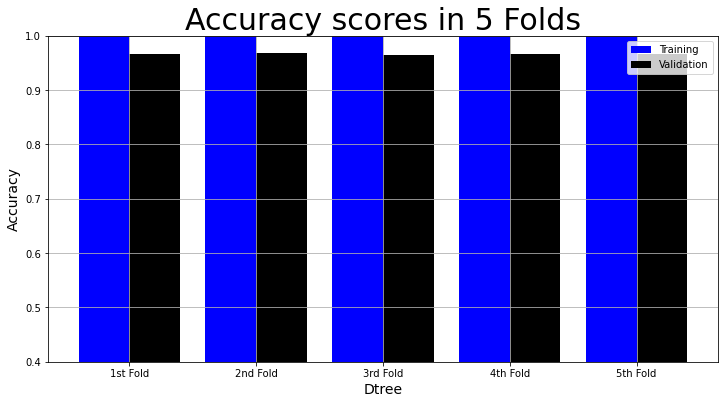

In [ ]:
# Plot Accuracy Result
model_name = "Dtree"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            results["train_accuracy"],
            results["test_accuracy"])



*   The bar graph above shows the accuracy of the kfolds. The blue one represents the train while the red coloured represents the validation.
* As shown above, the accuracy of all the train folds are the same while the accuracy of the validation folds are approximately equal to each other




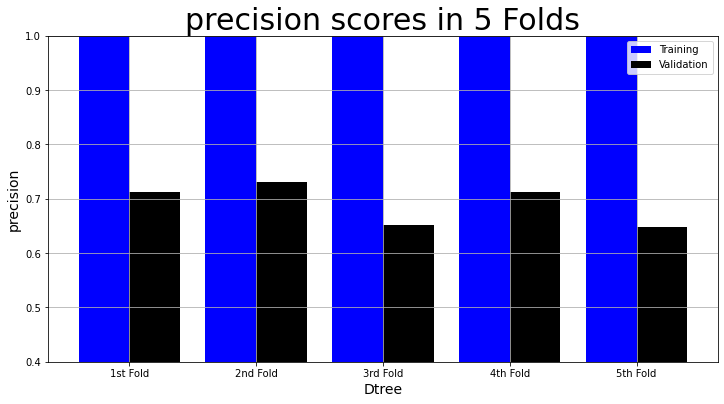

In [ ]:
# Plot precision Result
model_name = "Dtree"
plot_result(model_name,
            "precision",
            "precision scores in 5 Folds",
            results["train_precision"],
            results["test_precision"])



*   The bar graph above shows the precisions of the kfolds. The blue one represents the train while the red coloured represents the validation.
* As shown above, the precisions of all the train folds are the same.
* The third fold and the 5 fold have the least precision
* The second fold has the highest precision




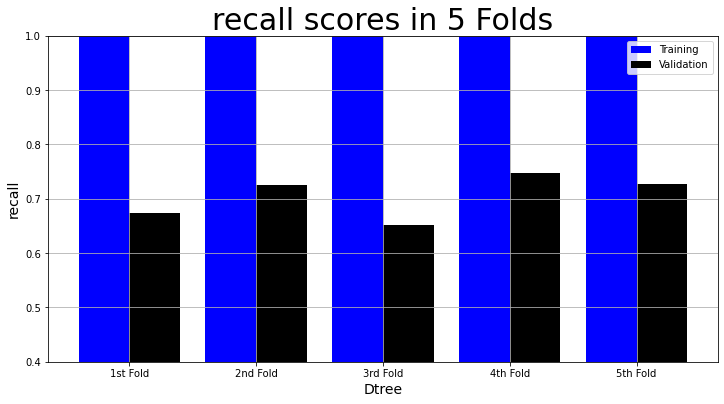

In [ ]:
# Plot recall Result
model_name = "Dtree"
plot_result(model_name,
            "recall",
            "recall scores in 5 Folds",
            results["train_recall"],
            results["test_recall"])



*   The bar graph above shows the recall of the kfolds. The blue one represents the train while the red coloured represents the validation.
* As shown above, the recall of all the train folds are the same.
* The third fold has the least recall
* The fourth fold has the highest recall




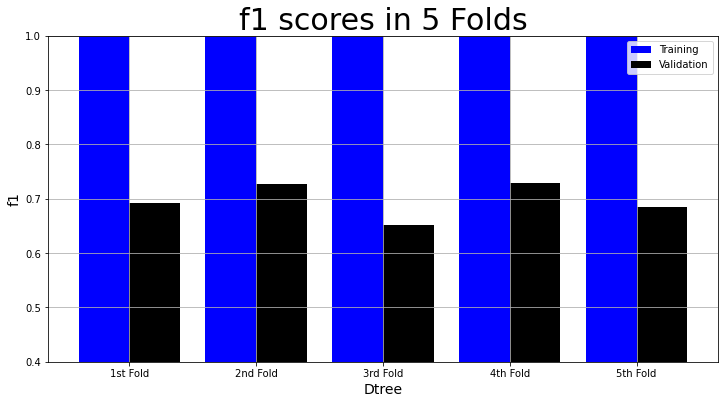

In [ ]:
# Plot recall Result
model_name = "Dtree"
plot_result(model_name,
            "f1",
            "f1 scores in 5 Folds",
            results["train_f1"],
            results["test_f1"])



*   The bar graph above shows the f1 of the kfolds. The blue one represents the train while the red coloured represents the validation.
* As shown above, the f1 of all the train folds are the same.
* The third fold has the least f1 score
* The fourth fold an the second fold have the highest f1 score




*Plotting confusion matrix*

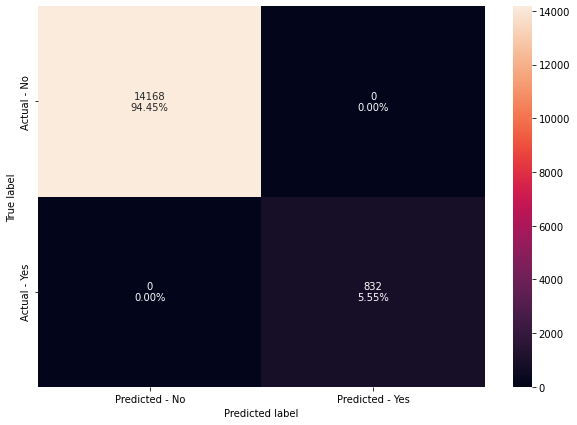

In [ ]:
#using function to plot confusion matrix
make_confusion_matrix(Dtree, y_train)

**Getting the y_validation score**

In [ ]:
scores = recall_score(y_val, Dtree.predict(x_val))
print(scores)


0.7050359712230215


* The above output shows the recall score on the validation set. The recall score is 0.705. This is not bad.

**Logistic Regression model**

In [ ]:
# defining the model
Lregression = LogisticRegression(random_state = 1)
Lregression.fit(x_train,y_train)
scoring1 = ['accuracy', 'precision', 'recall', 'f1']
# storing accuracy values of model for every fold in "results"
results = cross_validate(Lregression, x_train, y_train, cv=k_fold, scoring= scoring1, return_train_score = True)
print("Training Accuracy scores:", results['train_accuracy'])
print( "Mean Training Accuracy: ", results['train_accuracy'].mean()*100)
print("Training Precision scores: ", results['train_precision'])
print("Mean Training Precision: " , results['train_precision'].mean())
print("Training Recall scores:" ,results['train_recall'])
print("Mean Training Recall: ", results['train_recall'].mean())
print("Training F1 scores: ", results['train_f1'])
print("Mean Training F1 Score: ", results['train_f1'].mean())
print("Validation Accuracy scores: ", results['test_accuracy'])
print("Mean Validation Accuracy: ", results['test_accuracy'].mean()*100)
print("Validation Precision scores: ", results['test_precision'])
print("Mean Validation Precision: ", results['test_precision'].mean())
print("Validation Recall scores: ", results['test_recall'])
print("Mean Validation Recall: ", results['test_recall'].mean())
print("Validation F1 scores: ", results['test_f1'])
print("Mean Validation F1 Score: ", results['test_f1'].mean())

Training Accuracy scores: [0.96608333 0.96816667 0.96658333 0.96716667 0.967     ]
Mean Training Accuracy:  96.7
Training Precision scores:  [0.83862434 0.84810127 0.85316456 0.84615385 0.84708738]
Mean Training Precision:  0.8466262772407542
Training Recall scores: [0.47812971 0.50989346 0.49558824 0.47678019 0.51173021]
Mean Training Recall:  0.49442435897079784
Training F1 scores:  [0.60902978 0.63688213 0.62697674 0.60990099 0.63802559]
Mean Training F1 Score:  0.6241630473542259
Validation Accuracy scores:  [0.97166667 0.96266667 0.967      0.96633333 0.966     ]
Mean Validation Accuracy:  96.67333333333333
Validation Precision scores:  [0.90384615 0.85393258 0.77894737 0.9047619  0.77272727]
Mean Validation Precision:  0.8428430568052093
Validation Recall scores:  [0.55621302 0.43428571 0.48684211 0.51075269 0.45333333]
Mean Validation Recall:  0.48828537176114556
Validation F1 scores:  [0.68864469 0.57575758 0.59919028 0.65292096 0.57142857]
Mean Validation F1 Score:  0.61758841



*   The code above shows the train and test accuracy, precision, recall and f1 scores of the kfold logistic regresion model.
*   It also displays the mean of these metrics also



*plotting the results*

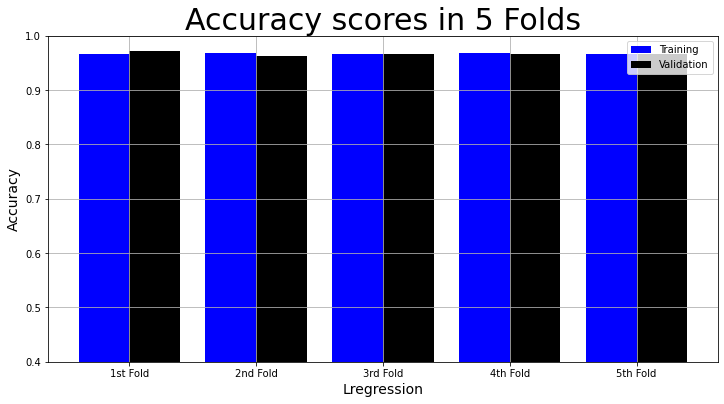

In [ ]:
# Plot Accuracy Result
model_name = "Lregression"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            results["train_accuracy"],
            results["test_accuracy"])



*   The bar graph above shows the accuracy of the kfolds. The blue one represents the train while the red coloured represents the validation.
* As shown above, the accuracy of the  3rd and 5th train folds are the same while the accuracy of 1, 2 and 4 train folds are approximately the same.
* The 1st validation fold has the highest accuracy.




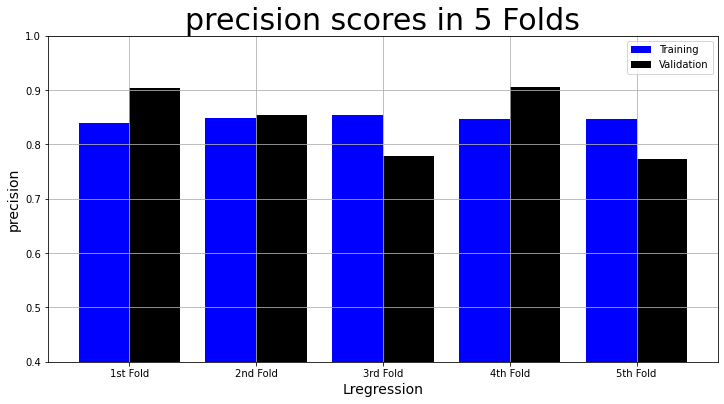

In [ ]:
# Plot Accuracy Result
model_name = "Lregression"
plot_result(model_name,
            "precision",
            "precision scores in 5 Folds",
            results["train_precision"],
            results["test_precision"])



*   The bar graph above shows the accuracy of the kfolds. The blue one represents the train while the black coloured represents the validation.
* As shown above, the accuracy of the  3rd  fold has approximatly the highest train precision. 
* The 1st and the 4th  validation fold has the highest accuracy.




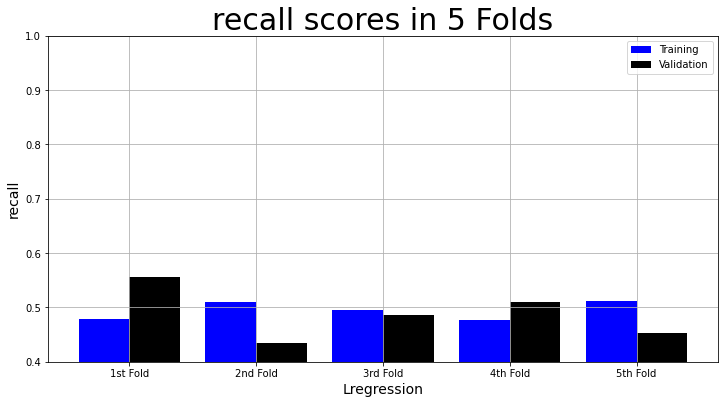

In [ ]:
# Plot recall Result
model_name = "Lregression"
plot_result(model_name,
            "recall",
            "recall scores in 5 Folds",
            results["train_recall"],
            results["test_recall"])



*   The bar graph above shows the recall of the kfolds. The blue one represents the train while the red coloured represents the validation.
* The logistic regression model is performing poorly on the recall.
* The 1 training fold has the lowest recall while the 5 training fold has the highest recall.
* The 1 validation fold has the highest recall while the 2 fold has the lowest recall




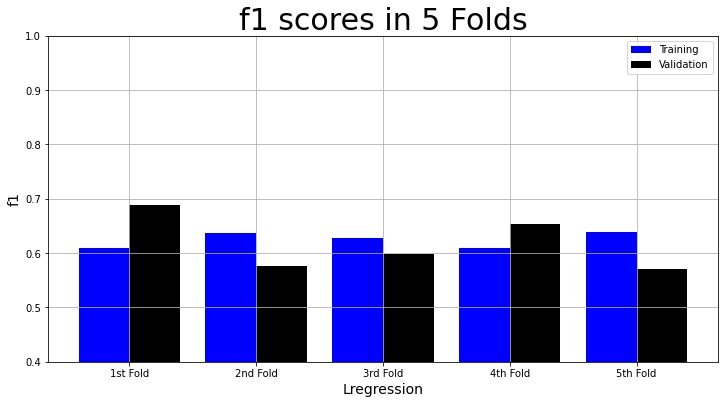

In [ ]:
# Plot f1 Result
model_name = "Lregression"
plot_result(model_name,
            "f1",
            "f1 scores in 5 Folds",
            results["train_f1"],
            results["test_f1"])



*   The bar graph above shows the f1 score of the kfolds. The blue one represents the train while the red coloured represents the validation.
* The 1 and 4 training fold have the lowest f1 score while the 2 and 5 training fold have the highest f1 score.
* The 1 validation fold has the highest f1 score while the 2 and 5 fold have the lowest f1 score.




*plotting the confusion matrix*

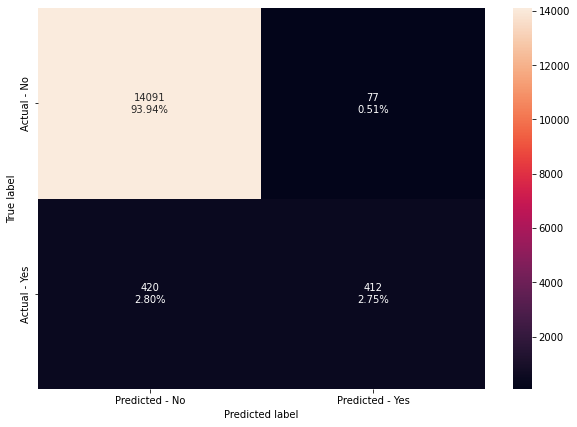

In [ ]:
make_confusion_matrix(Lregression, y_train)

**Getting the y_validation recall**

In [ ]:
scores = recall_score(y_val, Lregression.predict(x_val))
print(scores)


0.48201438848920863




*   The recall of the Logistic regression model is 0.482. This is very low.




**Random Forest Model**

In [ ]:
# defining the model
randomforest = RandomForestClassifier(random_state = 1)
randomforest.fit(x_train,y_train)
scoring1 = ['accuracy', 'precision', 'recall', 'f1']
# storing accuracy values of model for every fold in "results"
results = cross_validate(randomforest, x_train, y_train, cv=k_fold, scoring= scoring1, return_train_score = True)
print("Training Accuracy scores:", results['train_accuracy'])
print( "Mean Training Accuracy: ", results['train_accuracy'].mean()*100)
print("Training Precision scores: ", results['train_precision'])
print("Mean Training Precision: " , results['train_precision'].mean())
print("Training Recall scores:" ,results['train_recall'])
print("Mean Training Recall: ", results['train_recall'].mean())
print("Training F1 scores: ", results['train_f1'])
print("Mean Training F1 Score: ", results['train_f1'].mean())
print("Validation Accuracy scores: ", results['test_accuracy'])
print("Mean Validation Accuracy: ", results['test_accuracy'].mean()*100)
print("Validation Precision scores: ", results['test_precision'])
print("Mean Validation Precision: ", results['test_precision'].mean())
print("Validation Recall scores: ", results['test_recall'])
print("Mean Validation Recall: ", results['test_recall'].mean())
print("Validation F1 scores: ", results['test_f1'])
print("Mean Validation F1 Score: ", results['test_f1'].mean())

Training Accuracy scores: [1. 1. 1. 1. 1.]
Mean Training Accuracy:  100.0
Training Precision scores:  [1. 1. 1. 1. 1.]
Mean Training Precision:  1.0
Training Recall scores: [1. 1. 1. 1. 1.]
Mean Training Recall:  1.0
Training F1 scores:  [1. 1. 1. 1. 1.]
Mean Training F1 Score:  1.0
Validation Accuracy scores:  [0.98466667 0.98133333 0.98266667 0.984      0.986     ]
Mean Validation Accuracy:  98.37333333333333
Validation Precision scores:  [0.992      0.99173554 0.99019608 0.98591549 0.99090909]
Mean Validation Precision:  0.9901512398976585
Validation Recall scores:  [0.73372781 0.68571429 0.66447368 0.75268817 0.72666667]
Mean Validation Recall:  0.7126541238570754
Validation F1 scores:  [0.84353741 0.81081081 0.79527559 0.85365854 0.83846154]
Mean Validation F1 Score:  0.8283487782749764




*   The code above shows the train and test accuracy, precision, recall and f1 scores of the kfold randomforest model.
*   It also displays the mean of these metrics also



*plotting the results*

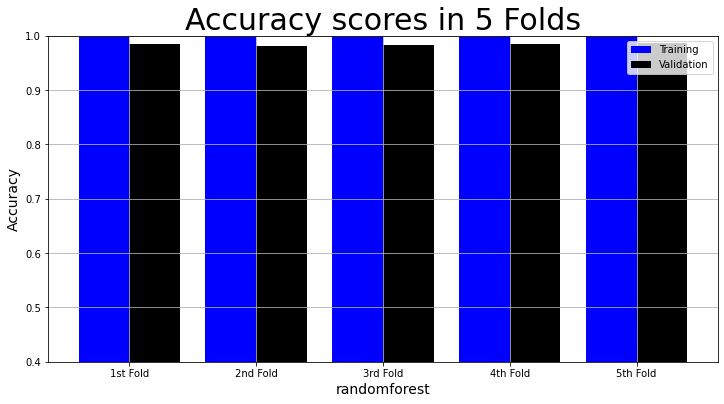

In [ ]:
# Plot Accuracy Result
model_name = "randomforest"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            results["train_accuracy"],
            results["test_accuracy"])



*   The bar graph above shows the accuracy score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* All the train folds have approximately the same accuracy while all the validation folds have approximately the same accuracy.
* The train folds have approximately an accuracy of 1.0 while the validation folds  have an accuracy of approximately 0.98





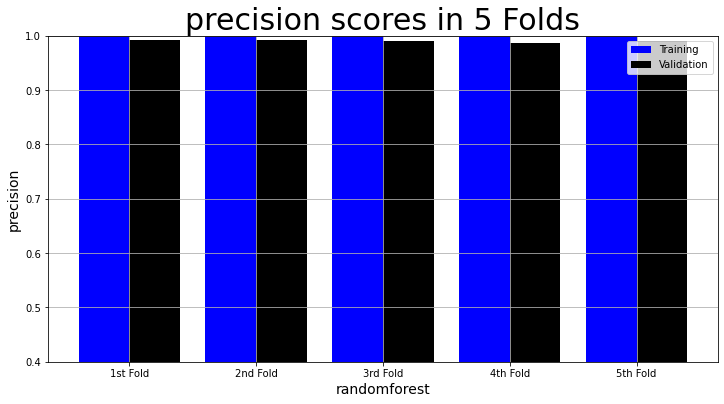

In [ ]:
# Plot precision Result
model_name = "randomforest"
plot_result(model_name,
            "precision",
            "precision scores in 5 Folds",
            results["train_precision"],
            results["test_precision"])



*   The bar graph above shows the accuracy score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* All the train folds have approximately the same precision while all the validation folds have approximately the same precision.
* The train folds have approximately a precision of 1.0 while the validation folds  have a precision of approximately 0.99





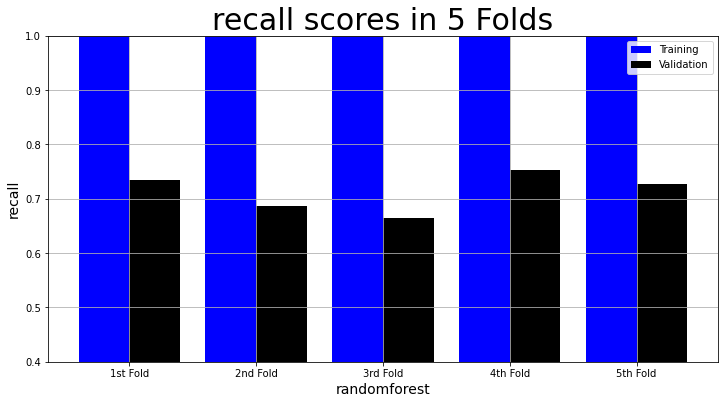

In [ ]:
# Plot recall Result
model_name = "randomforest"
plot_result(model_name,
            "recall",
            "recall scores in 5 Folds",
            results["train_recall"],
            results["test_recall"])



*   The bar graph above shows the accuracy score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* All the train folds have approximately the same recall.
* The validation fold with the highest recall is the 4 fold. It has a recall of approximately 0.85 




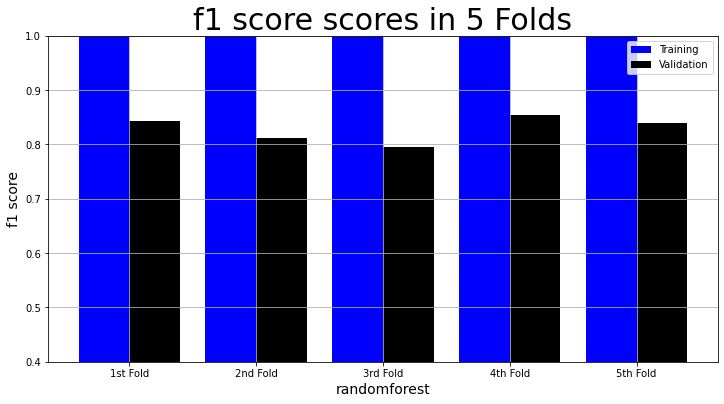

In [ ]:
# Plot f1 score Result
model_name = "randomforest"
plot_result(model_name,
            "f1 score",
            "f1 score scores in 5 Folds",
            results["train_f1"],
            results["test_f1"])



*   The bar graph above shows the accuracy score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* All the train folds have approximately the same f1 score.
* The validation fold with the highest f1 score is the 4 fold. It has a recall of approximately 0.85 




*plotting confusion matrix*

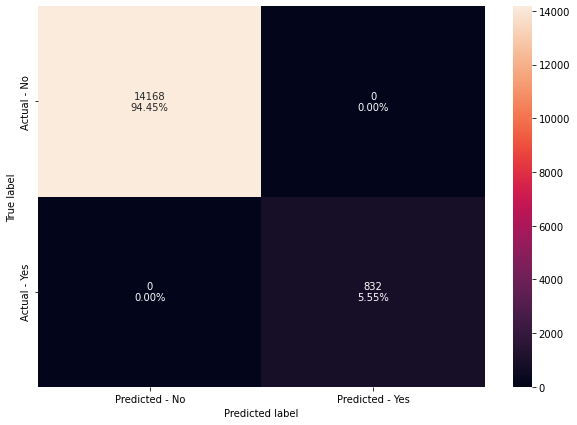

In [ ]:
make_confusion_matrix(randomforest, y_train)

**Getting the recall of the validation set**

In [ ]:
scores = recall_score(y_val, randomforest.predict(x_val))
print(scores)


0.7266187050359713


* The recall of the validation set is 0.7266.
*This shows that the modeli is overfitting the data

**Bagging model**

In [ ]:
# defining the model
B_tree = BaggingClassifier(random_state = 1)
B_tree.fit(x_train,y_train)
scoring1 = ['accuracy', 'precision', 'recall', 'f1']
# storing accuracy values of model for every fold in "results"
results = cross_validate(B_tree, x_train, y_train, cv=k_fold, scoring= scoring1, return_train_score = True)
print("Training Accuracy scores:", results['train_accuracy'])
print( "Mean Training Accuracy: ", results['train_accuracy'].mean()*100)
print("Training Precision scores: ", results['train_precision'])
print("Mean Training Precision: " , results['train_precision'].mean())
print("Training Recall scores:" ,results['train_recall'])
print("Mean Training Recall: ", results['train_recall'].mean())
print("Training F1 scores: ", results['train_f1'])
print("Mean Training F1 Score: ", results['train_f1'].mean())
print("Validation Accuracy scores: ", results['test_accuracy'])
print("Mean Validation Accuracy: ", results['test_accuracy'].mean()*100)
print("Validation Precision scores: ", results['test_precision'])
print("Mean Validation Precision: ", results['test_precision'].mean())
print("Validation Recall scores: ", results['test_recall'])
print("Mean Validation Recall: ", results['test_recall'].mean())
print("Validation F1 scores: ", results['test_f1'])
print("Mean Validation F1 Score: ", results['test_f1'].mean())

Training Accuracy scores: [0.99716667 0.99766667 0.99741667 0.99683333 0.99683333]
Mean Training Accuracy:  99.71833333333333
Training Precision scores:  [0.99841521 1.         0.9984639  0.99836066 1.        ]
Mean Training Precision:  0.999047954274706
Training Recall scores: [0.95022624 0.95738204 0.95588235 0.94272446 0.94428152]
Mean Training Recall:  0.9500993239979818
Training F1 scores:  [0.97372488 0.97822706 0.97670924 0.96974522 0.97134238]
Mean Training F1 Score:  0.973949758388527
Validation Accuracy scores:  [0.98333333 0.98366667 0.982      0.981      0.98366667]
Mean Validation Accuracy:  98.27333333333333
Validation Precision scores:  [0.96850394 0.97727273 0.94545455 0.93288591 0.94690265]
Mean Validation Precision:  0.9542039541285343
Validation Recall scores:  [0.72781065 0.73714286 0.68421053 0.74731183 0.71333333]
Mean Validation Recall:  0.7219618391273086
Validation F1 scores:  [0.83108108 0.84039088 0.79389313 0.82985075 0.81368821]
Mean Validation F1 Score:  0

* The output above shows the metrics of the training and validation folds of the bagging model


*Plotting the results*

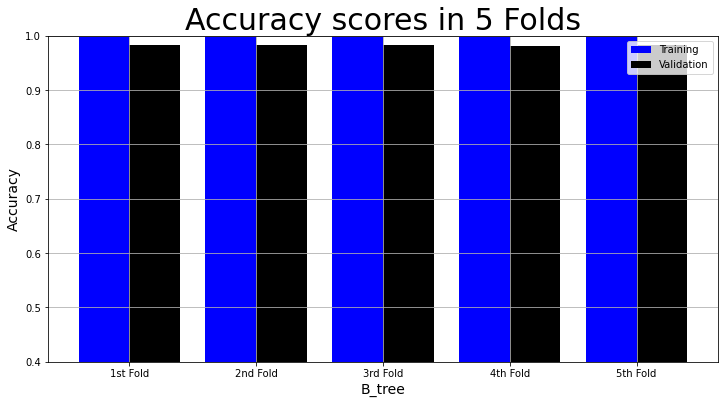

In [ ]:
# Plot Accuracy Result
model_name = "B_tree"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            results["train_accuracy"],
            results["test_accuracy"])



*   The bar graph above shows the accuracy score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* All the train folds have approximately the same Accuracy.
*All the validation folds have approximately the same accuracy.





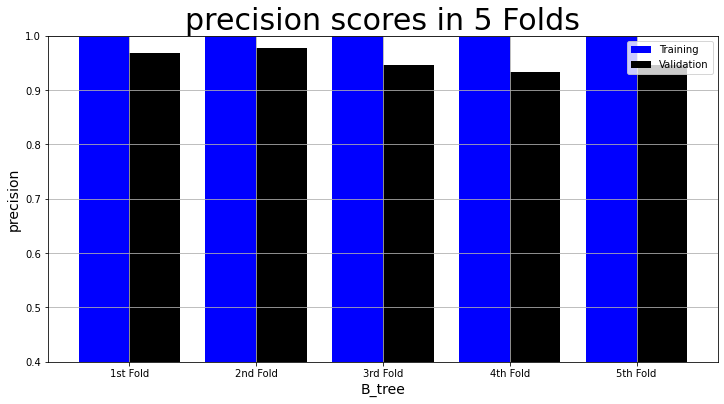

In [ ]:
# Plot precision Result
model_name = "B_tree"
plot_result(model_name,
            "precision",
            "precision scores in 5 Folds",
            results["train_precision"],
            results["test_precision"])



*   The bar graph above shows the accuracy score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* All the train folds have approximately the same precision.
* The 2 validation fold has the highest precision. It is approximately 0.975.
* The 4 validation fold has the lowest precision. It is approximately 0.92.





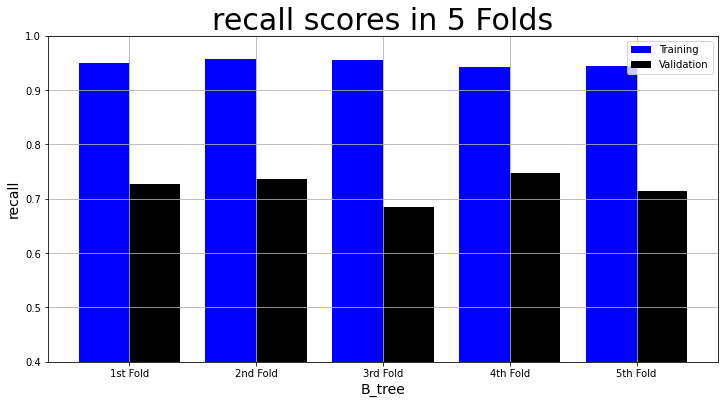

In [ ]:
# Plot recall Result
model_name = "B_tree"
plot_result(model_name,
            "recall",
            "recall scores in 5 Folds",
            results["train_recall"],
            results["test_recall"])



*   The bar graph above shows the accuracy score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* The 2 training fold has approximately the highest recall.
* The 3 validation fold has the lowest recall. 
* The 4 validation fold has the highest recall. 





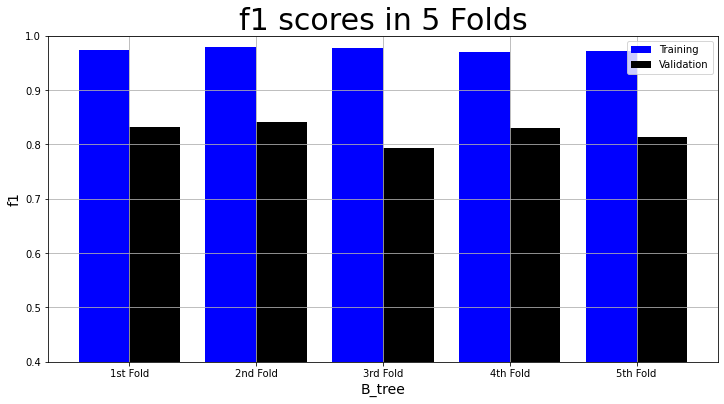

In [ ]:
# Plot f1 Result
model_name = "B_tree"
plot_result(model_name,
            "f1",
            "f1 scores in 5 Folds",
            results["train_f1"],
            results["test_f1"])



*   The bar graph above shows the accuracy score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* All the train folds have approximately the same f1 score.
* The 2 validation fold has the highest f1 score. It is approximately 0.84.
* The 3 validation fold has the lowest precision. It is approximately 0.79.





*plotting the confusion matrix*

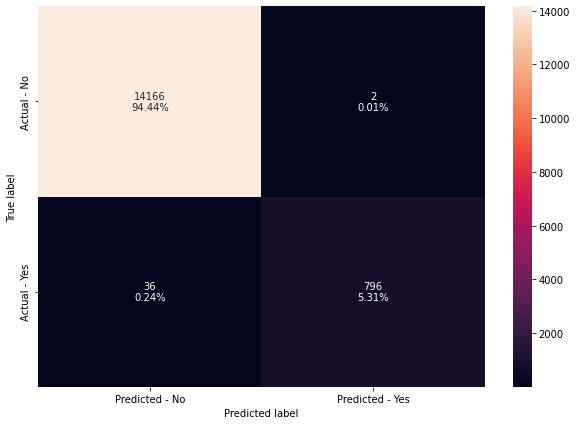

In [ ]:
#using function to make confusion matrix
make_confusion_matrix(B_tree, y_train)

**Getting the recall score of validation set**

In [ ]:
scores = recall_score(y_val, B_tree.predict(x_val))
print(scores)


0.7302158273381295


* The output above shows the recall of the validation set. It is 0.730

###BOOSTING MODELS

**ADA-Boost model**

In [ ]:
# defining the model
ADA_B = AdaBoostClassifier(random_state = 1)
ADA_B.fit(x_train,y_train)
scoring1 = ['accuracy', 'precision', 'recall', 'f1']
# storing accuracy values of model for every fold in "results"
results = cross_validate(ADA_B, x_train, y_train, cv=k_fold, scoring= scoring1, return_train_score = True)
print("Training Accuracy scores:", results['train_accuracy'])
print( "Mean Training Accuracy: ", results['train_accuracy'].mean()*100)
print("Training Precision scores: ", results['train_precision'])
print("Mean Training Precision: " , results['train_precision'].mean())
print("Training Recall scores:" ,results['train_recall'])
print("Mean Training Recall: ", results['train_recall'].mean())
print("Training F1 scores: ", results['train_f1'])
print("Mean Training F1 Score: ", results['train_f1'].mean())
print("Validation Accuracy scores: ", results['test_accuracy'])
print("Mean Validation Accuracy: ", results['test_accuracy'].mean()*100)
print("Validation Precision scores: ", results['test_precision'])
print("Mean Validation Precision: ", results['test_precision'].mean())
print("Validation Recall scores: ", results['test_recall'])
print("Mean Validation Recall: ", results['test_recall'].mean())
print("Validation F1 scores: ", results['test_f1'])
print("Mean Validation F1 Score: ", results['test_f1'].mean())

Training Accuracy scores: [0.977      0.97991667 0.97708333 0.97658333 0.97916667]
Mean Training Accuracy:  97.79500000000002
Training Precision scores:  [0.89409369 0.916      0.91752577 0.89587852 0.90601504]
Mean Training Precision:  0.9059026044180021
Training Recall scores: [0.66214178 0.69710807 0.65441176 0.63931889 0.70674487]
Mean Training Recall:  0.6719450729899817
Training F1 scores:  [0.76083189 0.79170268 0.7639485  0.74616079 0.79406919]
Mean Training F1 Score:  0.771342610794236
Validation Accuracy scores:  [0.97433333 0.973      0.973      0.97233333 0.97566667]
Mean Validation Accuracy:  97.36666666666667
Validation Precision scores:  [0.88983051 0.8852459  0.85148515 0.89312977 0.84684685]
Mean Validation Precision:  0.8733076352935971
Validation Recall scores:  [0.62130178 0.61714286 0.56578947 0.62903226 0.62666667]
Mean Validation Recall:  0.6119866061412358
Validation F1 scores:  [0.73170732 0.72727273 0.6798419  0.73817035 0.72030651]
Mean Validation F1 Score:  

* The output above shows the metrics of the training and validation folds of the ada boost model. It contains accuracy, recall, precision and f1 score

*Plotting the results*

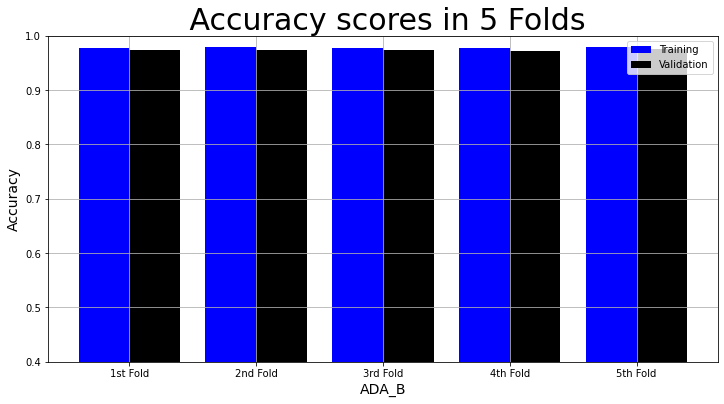

In [ ]:
# Plot accuracy Result
model_name = "ADA_B"
plot_result(model_name,
            "Accuracy",
            " Accuracy scores in 5 Folds",
            results["train_accuracy"],
            results["test_accuracy"])



*   The bar graph above shows the accuracy score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* All the train folds have approximately the same accuracy.
*All the validation folds have approximately the same accuracy.





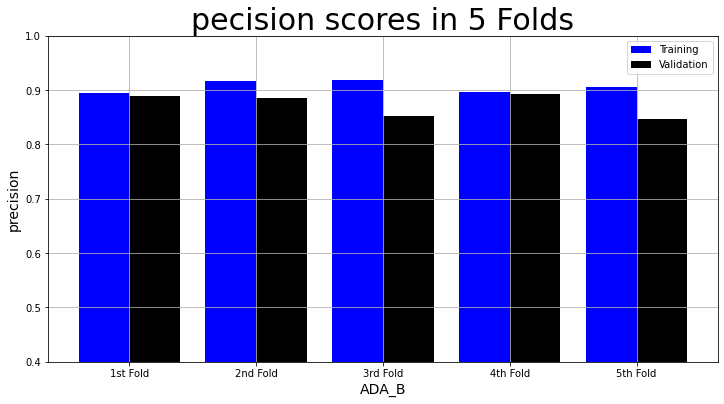

In [ ]:
# Plot precision Result
model_name = "ADA_B"
plot_result(model_name,
            "precision",
            "pecision scores in 5 Folds",
            results["train_precision"],
            results["test_precision"])



*   The bar graph above shows the accuracy score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* The 2 and the 3 train folds have approximately the highest presicion.
* The 1, 2 and 4 validation fold have the highest precision. 



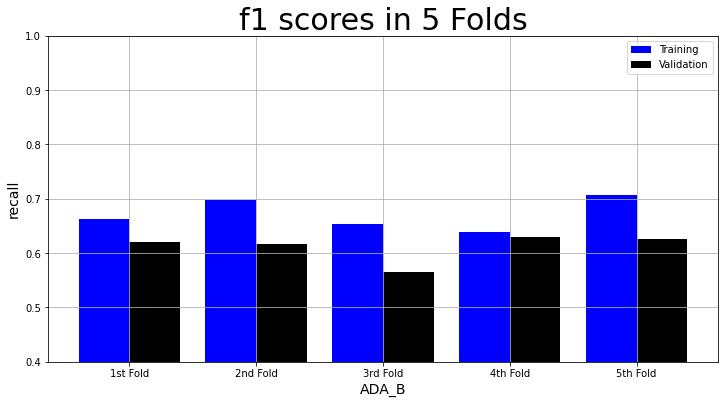

In [ ]:
# Plot RECALL Result
model_name = "ADA_B"
plot_result(model_name,
            "recall",
            "f1 scores in 5 Folds",
            results["train_recall"],
            results["test_recall"])



*   The bar graph above shows the accuracy score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* The 5 train fold has the highest recall score.
* All the validation folds have approximately the same recall apart from the 3 fold.


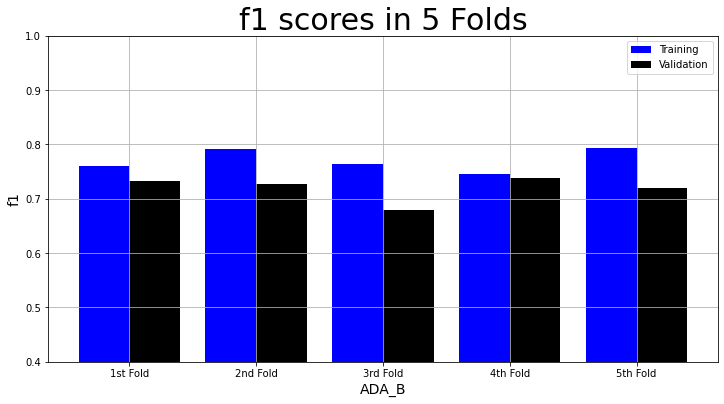

In [ ]:
# Plot f1 Result
model_name = "ADA_B"
plot_result(model_name,
            "f1",
            "f1 scores in 5 Folds",
            results["train_f1"],
            results["test_f1"])



*   The bar graph above shows the accuracy score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* The 5 train fold has the highest f1 score.
* The 1 and the 4 validation fold have approximately the highest f1 score.

*Plotting the confusion matrix*

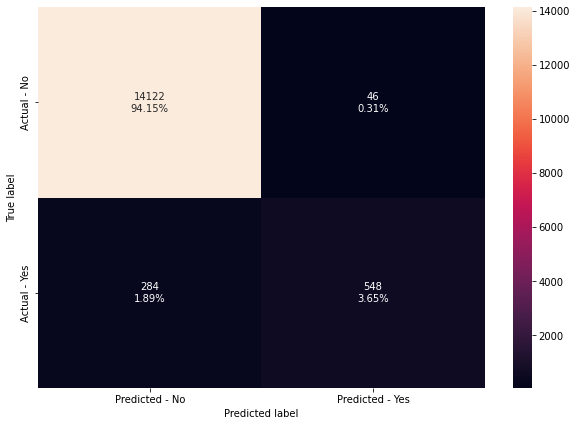

In [ ]:
#using defined function to plot confusion matrix
make_confusion_matrix(ADA_B, y_train)

**Getting the recall score of the validation set**

In [ ]:
scores = recall_score(y_val, ADA_B.predict(x_val))
print(scores)


0.6762589928057554


* The recall of the validation set of the ada boost model is 0.676

**Gradient Boost Model**

In [ ]:
# defining the model
Gradient_B = GradientBoostingClassifier(random_state = 1)
Gradient_B.fit(x_train,y_train)
scoring1 = ['accuracy', 'precision', 'recall', 'f1']
# storing accuracy values of model for every fold in "results"
results = cross_validate(Gradient_B, x_train, y_train, cv=k_fold, scoring= scoring1, return_train_score = True)
print("Training Accuracy scores:", results['train_accuracy'])
print( "Mean Training Accuracy: ", results['train_accuracy'].mean()*100)
print("Training Precision scores: ", results['train_precision'])
print("Mean Training Precision: " , results['train_precision'].mean())
print("Training Recall scores:" ,results['train_recall'])
print("Mean Training Recall: ", results['train_recall'].mean())
print("Training F1 scores: ", results['train_f1'])
print("Mean Training F1 Score: ", results['train_f1'].mean())
print("Validation Accuracy scores: ", results['test_accuracy'])
print("Mean Validation Accuracy: ", results['test_accuracy'].mean()*100)
print("Validation Precision scores: ", results['test_precision'])
print("Mean Validation Precision: ", results['test_precision'].mean())
print("Validation Recall scores: ", results['test_recall'])
print("Mean Validation Recall: ", results['test_recall'].mean())
print("Validation F1 scores: ", results['test_f1'])
print("Mean Validation F1 Score: ", results['test_f1'].mean())

Training Accuracy scores: [0.9905     0.99008333 0.99075    0.98983333 0.99      ]
Mean Training Accuracy:  99.02333333333333
Training Precision scores:  [0.99459459 0.98555957 0.98632479 0.9906367  0.98784722]
Mean Training Precision:  0.9889925748096914
Training Recall scores: [0.83257919 0.83105023 0.84852941 0.81888545 0.83431085]
Mean Training Recall:  0.8330710249903722
Training F1 scores:  [0.90640394 0.9017341  0.91225296 0.89661017 0.90461049]
Mean Training F1 Score:  0.9043223343394265
Validation Accuracy scores:  [0.98333333 0.97933333 0.98133333 0.981      0.98366667]
Mean Validation Accuracy:  98.17333333333333
Validation Precision scores:  [0.96124031 0.91851852 0.9137931  0.93877551 0.93913043]
Mean Validation Precision:  0.9342915754062009
Validation Recall scores:  [0.73372781 0.70857143 0.69736842 0.74193548 0.72      ]
Mean Validation Recall:  0.7203206288291829
Validation F1 scores:  [0.83221477 0.8        0.79104478 0.82882883 0.81509434]
Mean Validation F1 Score: 

* The output above shows the metrics of the training and validation folds of the gradient boost model. It contains accuracy, recall, precision and f1 score

*plotting the results*

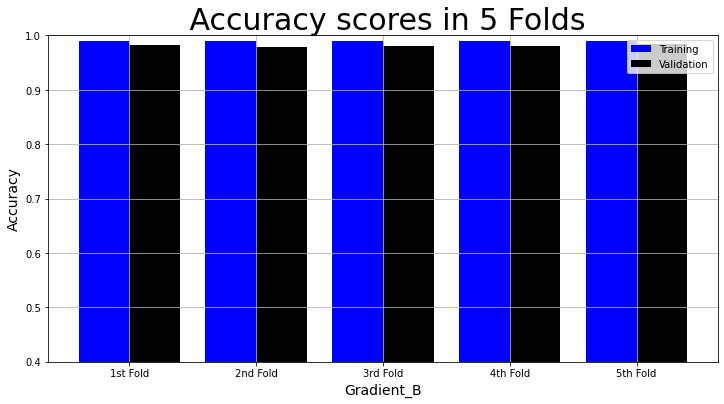

In [ ]:
# Plot accuracy Result
model_name = "Gradient_B"
plot_result(model_name,
            "Accuracy",
            " Accuracy scores in 5 Folds",
            results["train_accuracy"],
            results["test_accuracy"])



*   The bar graph above shows the accuracy score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* The train folds have the same accuracy.
* The validation folds have approximately equal accuracy.

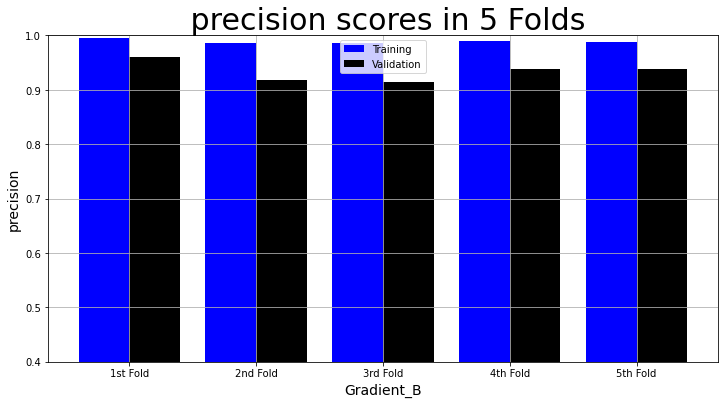

In [ ]:
# Plot precision Result
model_name = "Gradient_B"
plot_result(model_name,
            "precision",
            " precision scores in 5 Folds",
            results["train_precision"],
            results["test_precision"])



*   The bar graph above shows the precision score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* The 1 train and validation folds have the highest precision


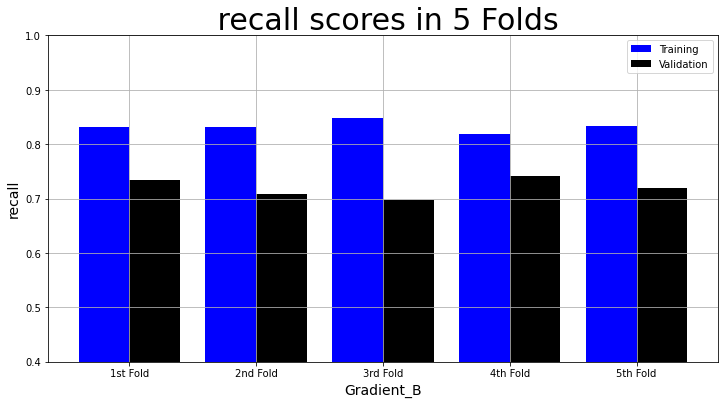

In [ ]:
# Plot recall Result
model_name = "Gradient_B"
plot_result(model_name,
            "recall",
            " recall scores in 5 Folds",
            results["train_recall"],
            results["test_recall"])



*   The bar graph above shows the recall score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* The 3 train fold has approximately the highest recall.
* The 4 validation fold has approximately the highest recall.


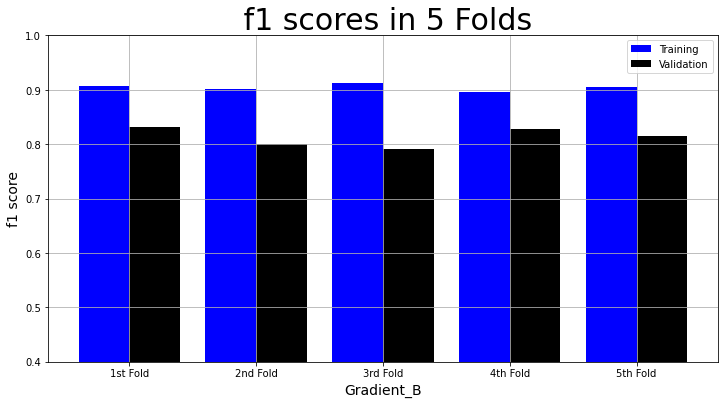

In [ ]:
# Plot f1 Result
model_name = "Gradient_B"
plot_result(model_name,
            "f1 score",
            " f1 scores in 5 Folds",
            results["train_f1"],
            results["test_f1"])



*   The bar graph above shows the f1 score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* The 3 train fold has approximately the highest f1 score.
* The 1 validation fold has approximately the highest f1 score.


*plotting the confusion matrix*

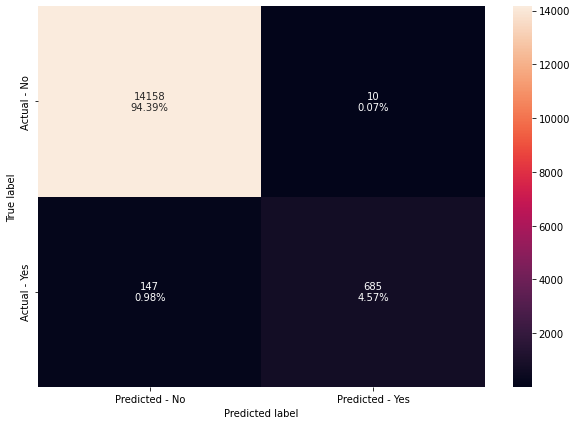

In [ ]:
#using function to create a confusion matrix
make_confusion_matrix(Gradient_B, y_train)

**Getting the recall score for validation set**

In [ ]:
scores = recall_score(y_val, Gradient_B.predict(x_val))
print(scores)


0.7230215827338129


* The recall score for the validation set is 0.723. The mean training recall is 0.833. This shows that the model is overfitting

**XG_Boost Model**

In [ ]:
# defining the model
XG_boost = XGBClassifier(random_state = 1)
XG_boost.fit(x_train,y_train)
scoring1 = ['accuracy', 'precision', 'recall', 'f1']
# storing accuracy values of model for every fold in "results"
results = cross_validate(XG_boost, x_train, y_train, cv=k_fold, scoring= scoring1, return_train_score = True)
print("Training Accuracy scores:", results['train_accuracy'])
print( "Mean Training Accuracy: ", results['train_accuracy'].mean()*100)
print("Training Precision scores: ", results['train_precision'])
print("Mean Training Precision: " , results['train_precision'].mean())
print("Training Recall scores:" ,results['train_recall'])
print("Mean Training Recall: ", results['train_recall'].mean())
print("Training F1 scores: ", results['train_f1'])
print("Mean Training F1 Score: ", results['train_f1'].mean())
print("Validation Accuracy scores: ", results['test_accuracy'])
print("Mean Validation Accuracy: ", results['test_accuracy'].mean()*100)
print("Validation Precision scores: ", results['test_precision'])
print("Mean Validation Precision: ", results['test_precision'].mean())
print("Validation Recall scores: ", results['test_recall'])
print("Mean Validation Recall: ", results['test_recall'].mean())
print("Validation F1 scores: ", results['test_f1'])
print("Mean Validation F1 Score: ", results['test_f1'].mean())

Training Accuracy scores: [1. 1. 1. 1. 1.]
Mean Training Accuracy:  100.0
Training Precision scores:  [1. 1. 1. 1. 1.]
Mean Training Precision:  1.0
Training Recall scores: [1. 1. 1. 1. 1.]
Mean Training Recall:  1.0
Training F1 scores:  [1. 1. 1. 1. 1.]
Mean Training F1 Score:  1.0
Validation Accuracy scores:  [0.988      0.98666667 0.98766667 0.98866667 0.989     ]
Mean Validation Accuracy:  98.80000000000001
Validation Precision scores:  [0.97841727 0.98561151 0.99145299 0.95238095 0.98347107]
Mean Validation Precision:  0.9782667590385052
Validation Recall scores:  [0.80473373 0.78285714 0.76315789 0.86021505 0.79333333]
Mean Validation Recall:  0.800859430500282
Validation F1 scores:  [0.88311688 0.87261146 0.86245353 0.9039548  0.87822878]
Mean Validation F1 Score:  0.8800730928462517


* The output above shows the metrics of the training and validation folds of the XG boost model. It contains accuracy, recall, precision and f1 score

*plotting the results*

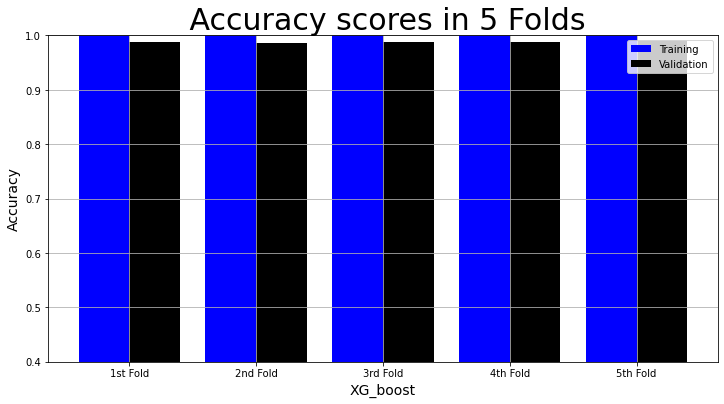

In [ ]:
# Plot accuracy Result
model_name = "XG_boost"
plot_result(model_name,
            "Accuracy",
            " Accuracy scores in 5 Folds",
            results["train_accuracy"],
            results["test_accuracy"])



*   The bar graph above shows the accuracy score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* The train folds have the same accuracy.
* The validation folds have approximately equal accuracy.

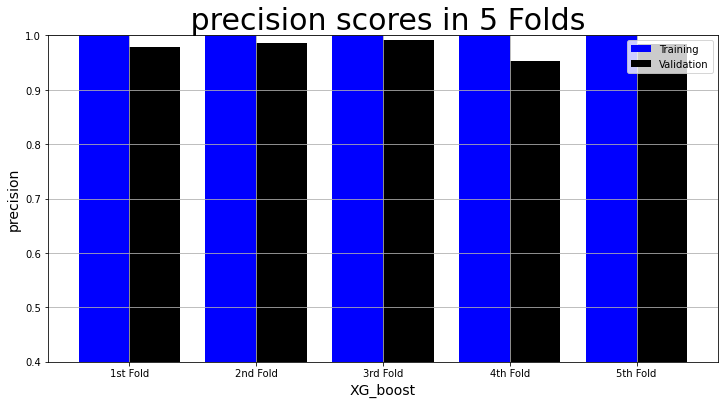

In [ ]:
# Plot precision Result
model_name = "XG_boost"
plot_result(model_name,
            "precision",
            " precision scores in 5 Folds",
            results["train_precision"],
            results["test_precision"])



*   The bar graph above shows the precision score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* The train folds have the same precision.
* The 3 and 5 validation folds have approximately the highest precision

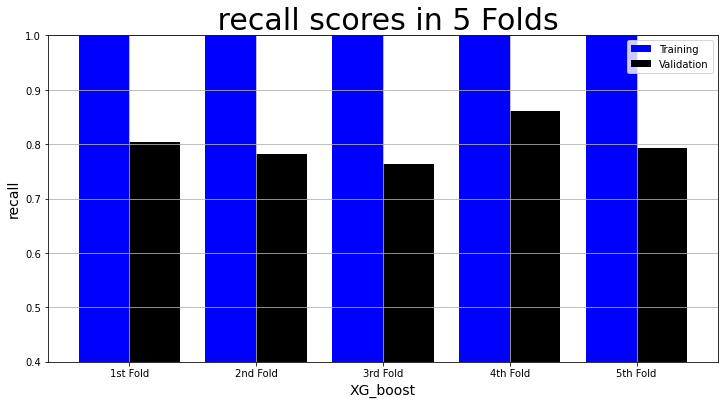

In [ ]:
# Plot recall Result
model_name = "XG_boost"
plot_result(model_name,
            "recall",
            " recall scores in 5 Folds",
            results["train_recall"],
            results["test_recall"])



*   The bar graph above shows the recall score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* The train folds have the same recall.
* The 3 validation fold has approximately the highest recall

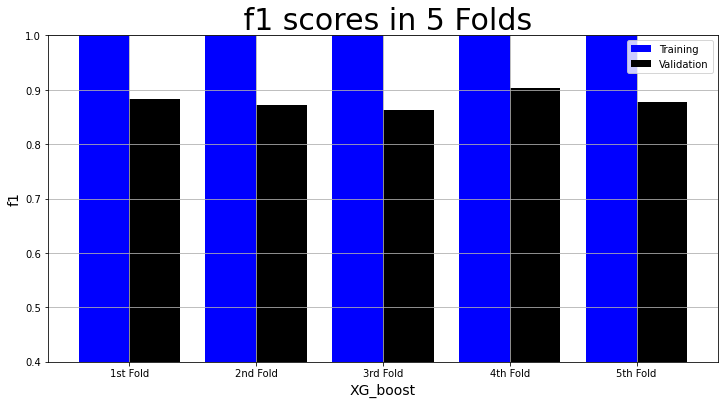

In [ ]:
# Plot f1 Result
model_name = "XG_boost"
plot_result(model_name,
            "f1",
            " f1 scores in 5 Folds",
            results["train_f1"],
            results["test_f1"])



*   The bar graph above shows the recall score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* The train folds have the same recall.
* The 4 validation fold has approximately the highest recall

*making a confusion matrix*

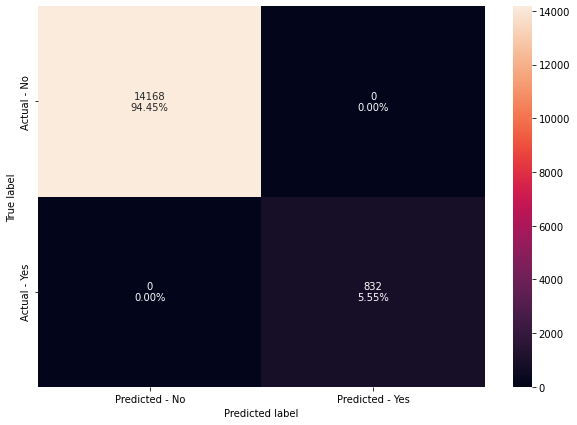

In [ ]:
#using function to make confusion matrix
make_confusion_matrix(XG_boost, y_train)

**Getting the recall of the validation set**

In [ ]:
scores = recall_score(y_val, XG_boost.predict(x_val))
print(scores)


0.8201438848920863


* The output shows the validation set recall score of the xg boost model. It has a very high recall

### Model Building with Oversampled data


**Checking the class balance**

In [ ]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in df")
print(df['Target'].value_counts())
print("Target value ratio in y_train")
print(y_train.value_counts(1))

print("Target value ratio in y_val")
print(y_val.value_counts(1))

print("Target value ratio in y_test")
print(y_test.value_counts(1))


Target value ratio in df
0    18890
1     1110
Name: Target, dtype: int64
Target value ratio in y_train
0   0.945
1   0.055
Name: Target, dtype: float64
Target value ratio in y_val
0   0.944
1   0.056
Name: Target, dtype: float64
Target value ratio in y_test
0   0.944
1   0.056
Name: Target, dtype: float64


**Over sampling train data using smote**

In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
x_train_over, y_train_over = sm.fit_resample(x_train, y_train)

In [ ]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(x_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 832
Before OverSampling, count of label '0': 14168 

After OverSampling, count of label '1': 14168
After OverSampling, count of label '0': 14168 

After OverSampling, the shape of train_X: (28336, 40)
After OverSampling, the shape of train_y: (28336,) 



* As shown the label count of 1 has increased after oversampling.
* There is a big difference between the label count before over sampling and label count after oversampling

**Decision tree using oversampled data**

In [ ]:
# defining the model
Dtree1 = DecisionTreeClassifier(random_state = 1)
Dtree1.fit(x_train_over,y_train_over)
scoring1 = ['accuracy', 'precision', 'recall', 'f1']
# storing accuracy values of model for every fold in "results"
results = cross_validate(Dtree1, x_train_over, y_train_over, cv=k_fold, scoring= scoring1, return_train_score = True)
print("Training Accuracy scores:", results['train_accuracy'])
print( "Mean Training Accuracy: ", results['train_accuracy'].mean()*100)
print("Training Precision scores: ", results['train_precision'])
print("Mean Training Precision: " , results['train_precision'].mean())
print("Training Recall scores:" ,results['train_recall'])
print("Mean Training Recall: ", results['train_recall'].mean())
print("Training F1 scores: ", results['train_f1'])
print("Mean Training F1 Score: ", results['train_f1'].mean())
print("Validation Accuracy scores: ", results['test_accuracy'])
print("Mean Validation Accuracy: ", results['test_accuracy'].mean()*100)
print("Validation Precision scores: ", results['test_precision'])
print("Mean Validation Precision: ", results['test_precision'].mean())
print("Validation Recall scores: ", results['test_recall'])
print("Mean Validation Recall: ", results['test_recall'].mean())
print("Validation F1 scores: ", results['test_f1'])
print("Mean Validation F1 Score: ", results['test_f1'].mean())

Training Accuracy scores: [1. 1. 1. 1. 1.]
Mean Training Accuracy:  100.0
Training Precision scores:  [1. 1. 1. 1. 1.]
Mean Training Precision:  1.0
Training Recall scores: [1. 1. 1. 1. 1.]
Mean Training Recall:  1.0
Training F1 scores:  [1. 1. 1. 1. 1.]
Mean Training F1 Score:  1.0
Validation Accuracy scores:  [0.96224418 0.96294336 0.96153167 0.96382566 0.95817893]
Mean Validation Accuracy:  96.17447593372916
Validation Precision scores:  [0.95215146 0.95533845 0.95249738 0.95923261 0.94813784]
Mean Validation Precision:  0.9534715486184251
Validation Recall scores:  [0.97360084 0.97092199 0.97080812 0.97020097 0.96870555]
Mean Validation Recall:  0.9708474930419978
Validation F1 scores:  [0.9627567  0.96306718 0.96156559 0.96468562 0.95831135]
Mean Validation F1 Score:  0.96207728593864


* The output above shows the metrics of the training and validation folds of the oversampled decision tree model. It contains accuracy, recall, precision and f1 score

*plotting graphs to represent the output*

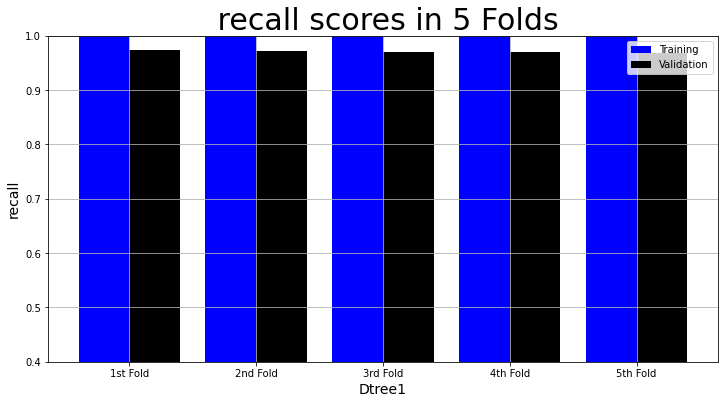

In [ ]:
# Plot recall Result
model_name = "Dtree1"
plot_result(model_name,
            "recall",
            " recall scores in 5 Folds",
            results["train_recall"],
            results["test_recall"])



*   The bar graph above shows the recall score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* The train folds have the same recall.
* The validation folds have approximately the same recall.

**Random Forest using oversampled data**

In [ ]:
# defining the model
randomforest1 = RandomForestClassifier(random_state = 1)
randomforest1.fit(x_train_over,y_train_over)
scoring1 = ['accuracy', 'precision', 'recall', 'f1']
# storing accuracy values of model for every fold in "results"
results = cross_validate(randomforest1, x_train_over, y_train_over, cv=k_fold, scoring= scoring1, return_train_score = True)
print("Training Accuracy scores:", results['train_accuracy'])
print( "Mean Training Accuracy: ", results['train_accuracy'].mean()*100)
print("Training Precision scores: ", results['train_precision'])
print("Mean Training Precision: " , results['train_precision'].mean())
print("Training Recall scores:" ,results['train_recall'])
print("Mean Training Recall: ", results['train_recall'].mean())
print("Training F1 scores: ", results['train_f1'])
print("Mean Training F1 Score: ", results['train_f1'].mean())
print("Validation Accuracy scores: ", results['test_accuracy'])
print("Mean Validation Accuracy: ", results['test_accuracy'].mean()*100)
print("Validation Precision scores: ", results['test_precision'])
print("Mean Validation Precision: ", results['test_precision'].mean())
print("Validation Recall scores: ", results['test_recall'])
print("Mean Validation Recall: ", results['test_recall'].mean())
print("Validation F1 scores: ", results['test_f1'])
print("Mean Validation F1 Score: ", results['test_f1'].mean())

Training Accuracy scores: [1. 1. 1. 1. 1.]
Mean Training Accuracy:  100.0
Training Precision scores:  [1. 1. 1. 1. 1.]
Mean Training Precision:  1.0
Training Recall scores: [1. 1. 1. 1. 1.]
Mean Training Recall:  1.0
Training F1 scores:  [1. 1. 1. 1. 1.]
Mean Training F1 Score:  1.0
Validation Accuracy scores:  [0.99258998 0.98817717 0.98905947 0.99011823 0.98976531]
Mean Validation Accuracy:  98.99420296460623
Validation Precision scores:  [0.99645264 0.99783002 0.99317774 0.99788881 0.99532374]
Mean Validation Precision:  0.9961345900899412
Validation Recall scores:  [0.98873636 0.97836879 0.98469206 0.98267498 0.98399716]
Mean Validation Recall:  0.9836938707438463
Validation F1 scores:  [0.99257951 0.98800358 0.9889167  0.99022346 0.98962804]
Mean Validation F1 Score:  0.9898702573051625


* The output above shows the metrics of the training and validation folds of the oversampled random forest model. It contains accuracy, recall, precision and f1 score

**Plotting the recall score of the random forest model**

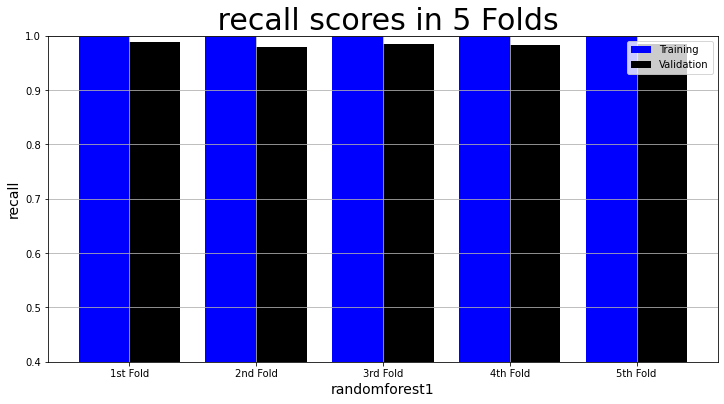

In [ ]:
# Plot recall Result
model_name = "randomforest1"
plot_result(model_name,
            "recall",
            " recall scores in 5 Folds",
            results["train_recall"],
            results["test_recall"])



*   The bar graph above shows the recall score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* The train folds have the same recall.
* The validation folds have approximately the same recall , apart from the 1 fold which has the highest recall.

**Logisitic regression using oversampled data**

In [ ]:
# defining the model
Lregression1 = LogisticRegression(random_state=1)
Lregression1.fit(x_train_over, y_train_over)
scoring1 = ['accuracy', 'precision', 'recall', 'f1']
# storing accuracy values of model for every fold in "results"
results = cross_validate(Lregression1, x_train_over, y_train_over, cv=k_fold, scoring= scoring1, return_train_score = True)
print("Training Accuracy scores:", results['train_accuracy'])
print( "Mean Training Accuracy: ", results['train_accuracy'].mean()*100)
print("Training Precision scores: ", results['train_precision'])
print("Mean Training Precision: " , results['train_precision'].mean())
print("Training Recall scores:" ,results['train_recall'])
print("Mean Training Recall: ", results['train_recall'].mean())
print("Training F1 scores: ", results['train_f1'])
print("Mean Training F1 Score: ", results['train_f1'].mean())
print("Validation Accuracy scores: ", results['test_accuracy'])
print("Mean Validation Accuracy: ", results['test_accuracy'].mean()*100)
print("Validation Precision scores: ", results['test_precision'])
print("Mean Validation Precision: ", results['test_precision'].mean())
print("Validation Recall scores: ", results['test_recall'])
print("Mean Validation Recall: ", results['test_recall'].mean())
print("Validation F1 scores: ", results['test_f1'])
print("Mean Validation F1 Score: ", results['test_f1'].mean())

Training Accuracy scores: [0.87859538 0.88217389 0.87988001 0.88062994 0.88155631]
Mean Training Accuracy:  88.05671056983257
Training Precision scores:  [0.87659201 0.87920636 0.87771169 0.87739835 0.87894415]
Mean Training Precision:  0.8779705100403028
Training Recall scores: [0.8810806  0.8864117  0.88335241 0.88361993 0.88552307]
Mean Training Recall:  0.8839975422402105
Training F1 scores:  [0.87883057 0.88279433 0.88052301 0.88049815 0.88222134]
Mean Training F1 Score:  0.8809734816663966
Validation Accuracy scores:  [0.88637968 0.87541909 0.88106582 0.8807129  0.87877184]
Mean Validation Accuracy:  88.04698648429373
Validation Precision scores:  [0.88476357 0.87061711 0.87286064 0.88501742 0.87637265]
Mean Validation Precision:  0.8779262787968733
Validation Recall scores:  [0.88912355 0.88049645 0.88964044 0.88011088 0.87980085]
Mean Validation Recall:  0.88383443539627
Validation F1 scores:  [0.8869382  0.87552891 0.88117066 0.88255733 0.87808341]
Mean Validation F1 Score:  0

**plotting the recall**

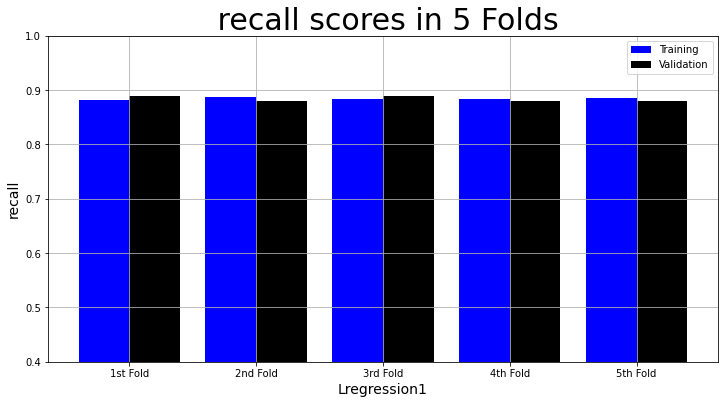

In [ ]:
# Plot recall Result
model_name = "Lregression1"
plot_result(model_name,
            "recall",
            " recall scores in 5 Folds",
            results["train_recall"],
            results["test_recall"])



*   The bar graph above shows the recall score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* The train folds have the same recall.
* The 1 and 3 validation folds have approximately the same recall. These folds have the highest recall.

**Bagging using oversampled data**

In [ ]:
# defining the model
Bagging_t1 = BaggingClassifier(random_state=1)
Bagging_t1.fit(x_train_over, y_train_over)
scoring1 = ['accuracy', 'precision', 'recall', 'f1']
# storing accuracy values of model for every fold in "results"
results = cross_validate(Bagging_t1, x_train_over, y_train_over, cv=k_fold, scoring= scoring1, return_train_score = True)
print("Training Accuracy scores:", results['train_accuracy'])
print( "Mean Training Accuracy: ", results['train_accuracy'].mean()*100)
print("Training Precision scores: ", results['train_precision'])
print("Mean Training Precision: " , results['train_precision'].mean())
print("Training Recall scores:" ,results['train_recall'])
print("Mean Training Recall: ", results['train_recall'].mean())
print("Training F1 scores: ", results['train_f1'])
print("Mean Training F1 Score: ", results['train_f1'].mean())
print("Validation Accuracy scores: ", results['test_accuracy'])
print("Mean Validation Accuracy: ", results['test_accuracy'].mean()*100)
print("Validation Precision scores: ", results['test_precision'])
print("Mean Validation Precision: ", results['test_precision'].mean())
print("Validation Recall scores: ", results['test_recall'])
print("Mean Validation Recall: ", results['test_recall'].mean())
print("Validation F1 scores: ", results['test_f1'])
print("Mean Validation F1 Score: ", results['test_f1'].mean())

Training Accuracy scores: [0.99885301 0.99916185 0.99876483 0.99836782 0.99902951]
Mean Training Accuracy:  99.88354038820295
Training Precision scores:  [0.99955795 0.99964717 0.99973538 0.999467   0.99991179]
Mean Training Precision:  0.9996638577827248
Training Recall scores: [0.99814602 0.99867818 0.9977991  0.99725226 0.99815076]
Mean Training Recall:  0.9980052647069645
Training F1 scores:  [0.99885149 0.99916244 0.9987663  0.9983584  0.9990305 ]
Mean Training F1 Score:  0.9988338259089045
Validation Accuracy scores:  [0.98570924 0.97953062 0.97953062 0.9818246  0.98058938]
Mean Validation Accuracy:  98.14368904448602
Validation Precision scores:  [0.98866856 0.98633094 0.97901103 0.98910369 0.98353615]
Mean Validation Precision:  0.9853300716344725
Validation Recall scores:  [0.98275255 0.97234043 0.97970808 0.97505198 0.9772404 ]
Mean Validation Recall:  0.9774186863925868
Validation F1 scores:  [0.98570168 0.97928571 0.97935943 0.98202757 0.98037817]
Mean Validation F1 Score: 

**plotting the recall of the bagging tree model**

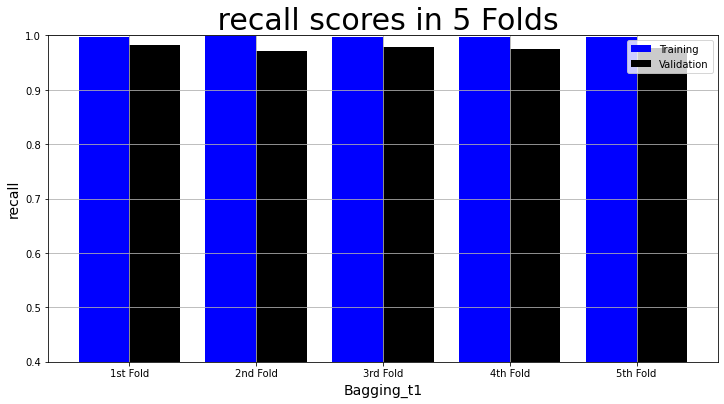

In [ ]:
# Plot recall Result
model_name = "Bagging_t1"
plot_result(model_name,
            "recall",
            " recall scores in 5 Folds",
            results["train_recall"],
            results["test_recall"])



*   The bar graph above shows the recall score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* The 2 train fold has approximately  the highest recall.
* The validation folds have approximately the same recall apart from the second fold. The second fold has the lowest recall

######Boosting models using oversampled data

**Ada-Boost**

In [ ]:
# defining the model
Ada_boost1 = AdaBoostClassifier(random_state= 1)
Ada_boost1.fit(x_train_over, y_train_over)
scoring1 = ['accuracy', 'precision', 'recall', 'f1']
# storing accuracy values of model for every fold in "results"
results = cross_validate(Ada_boost1, x_train_over, y_train_over, cv=k_fold, scoring= scoring1, return_train_score = True)
print("Training Accuracy scores:", results['train_accuracy'])
print( "Mean Training Accuracy: ", results['train_accuracy'].mean()*100)
print("Training Precision scores: ", results['train_precision'])
print("Mean Training Precision: " , results['train_precision'].mean())
print("Training Recall scores:" ,results['train_recall'])
print("Mean Training Recall: ", results['train_recall'].mean())
print("Training F1 scores: ", results['train_f1'])
print("Mean Training F1 Score: ", results['train_f1'].mean())
print("Validation Accuracy scores: ", results['test_accuracy'])
print("Mean Validation Accuracy: ", results['test_accuracy'].mean()*100)
print("Validation Precision scores: ", results['test_precision'])
print("Mean Validation Precision: ", results['test_precision'].mean())
print("Validation Recall scores: ", results['test_recall'])
print("Mean Validation Recall: ", results['test_recall'].mean())
print("Validation F1 scores: ", results['test_f1'])
print("Mean Validation F1 Score: ", results['test_f1'].mean())

Training Accuracy scores: [0.91132875 0.91331775 0.91137677 0.91561163 0.91137677]
Mean Training Accuracy:  91.2602332072393
Training Precision scores:  [0.92438736 0.92399458 0.92064063 0.92420538 0.92008989]
Mean Training Precision:  0.9226635665849804
Training Recall scores: [0.89582414 0.90095171 0.90078352 0.90462684 0.90137372]
Mean Training Recall:  0.9007119857201948
Training F1 scores:  [0.90988164 0.91232767 0.91060384 0.91431131 0.91063565]
Mean Training F1 Score:  0.9115520192689633
Validation Accuracy scores:  [0.91090332 0.90171166 0.90788777 0.90577025 0.90841715]
Mean Validation Accuracy:  90.69380305870173
Validation Precision scores:  [0.91714286 0.91280555 0.91416154 0.91584158 0.91888929]
Mean Validation Precision:  0.9157681634493011
Validation Recall scores:  [0.90390707 0.88723404 0.89854041 0.8974359  0.89438122]
Mean Validation Recall:  0.8962997288259317
Validation F1 scores:  [0.91047687 0.89983816 0.90628366 0.90654533 0.90646963]
Mean Validation F1 Score:  

**plotting the recall of ada-boost model**

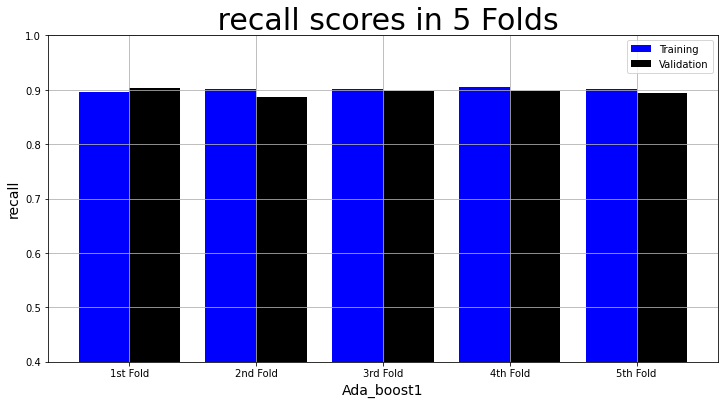

In [ ]:
# Plot recall Result
model_name = "Ada_boost1"
plot_result(model_name,
            "recall",
            " recall scores in 5 Folds",
            results["train_recall"],
            results["test_recall"])

* The plot above shows the recall scores of the 5 folds. 
* The 4 training fold has the highest recall
* The 1 validation fold has the maximum recall

**Gradient boost**

In [ ]:
# defining the model
Gradient_boost1 = GradientBoostingClassifier(random_state= 1)
Gradient_boost1.fit(x_train_over,y_train_over)
scoring1 = ['accuracy', 'precision', 'recall', 'f1']
# storing accuracy values of model for every fold in "results"
results = cross_validate(Gradient_boost1, x_train_over, y_train_over, cv=k_fold, scoring= scoring1, return_train_score = True)
print("Training Accuracy scores:", results['train_accuracy'])
print( "Mean Training Accuracy: ", results['train_accuracy'].mean()*100)
print("Training Precision scores: ", results['train_precision'])
print("Mean Training Precision: " , results['train_precision'].mean())
print("Training Recall scores:" ,results['train_recall'])
print("Mean Training Recall: ", results['train_recall'].mean())
print("Training F1 scores: ", results['train_f1'])
print("Mean Training F1 Score: ", results['train_f1'].mean())
print("Validation Accuracy scores: ", results['test_accuracy'])
print("Mean Validation Accuracy: ", results['test_accuracy'].mean()*100)
print("Validation Precision scores: ", results['test_precision'])
print("Mean Validation Precision: ", results['test_precision'].mean())
print("Validation Recall scores: ", results['test_recall'])
print("Mean Validation Recall: ", results['test_recall'].mean())
print("Validation F1 scores: ", results['test_f1'])
print("Mean Validation F1 Score: ", results['test_f1'].mean())

Training Accuracy scores: [0.95275278 0.9542106  0.95315188 0.95465173 0.95482818]
Mean Training Accuracy:  95.39190326241057
Training Precision scores:  [0.97640282 0.97476515 0.97622792 0.97684152 0.97762574]
Mean Training Precision:  0.9763726295724444
Training Recall scores: [0.92787146 0.93267536 0.92913109 0.93095196 0.93113772]
Mean Training Recall:  0.9303535175565392
Training F1 scores:  [0.95151872 0.95325588 0.95209743 0.95334483 0.95381562]
Mean Training F1 Score:  0.9528064955605838
Validation Accuracy scores:  [0.950247   0.94423857 0.95094406 0.9472384  0.95059114]
Mean Validation Accuracy:  94.86518352920169
Validation Precision scores:  [0.96954128 0.96821242 0.96714655 0.97363603 0.97098214]
Mean Validation Precision:  0.9699036844834138
Validation Recall scores:  [0.92995424 0.91808511 0.93271627 0.92134442 0.92816501]
Mean Validation Recall:  0.9260530090877944
Validation F1 scores:  [0.94933525 0.94248271 0.94961943 0.94676874 0.94909091]
Mean Validation F1 Score: 

**Plotting the recall of Gradient-boost model**

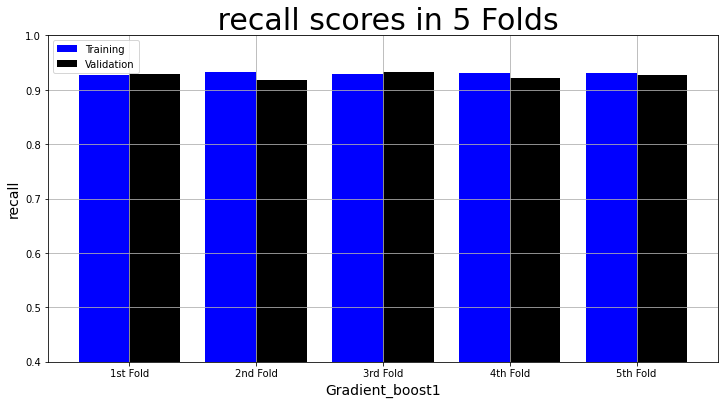

In [ ]:
# Plot recall Result
model_name = "Gradient_boost1"
plot_result(model_name,
            "recall",
            " recall scores in 5 Folds",
            results["train_recall"],
            results["test_recall"])

* The plot above shows the recall scores of the 5 folds. 
* The recall of the training folds are approximately equal
* The 1 and 3 validation folds have the maximum recall. They have equal recall.

**XG boost Model**

In [ ]:
# defining the model
XG_boost1= XGBClassifier(random_state = 1)
XG_boost1.fit(x_train_over, y_train_over)
scoring1 = ['accuracy', 'precision', 'recall', 'f1']
# storing accuracy values of model for every fold in "results"
results = cross_validate(XG_boost1, x_train_over, y_train_over, cv=k_fold, scoring= scoring1, return_train_score = True)
print("Training Accuracy scores:", results['train_accuracy'])
print( "Mean Training Accuracy: ", results['train_accuracy'].mean()*100)
print("Training Precision scores: ", results['train_precision'])
print("Mean Training Precision: " , results['train_precision'].mean())
print("Training Recall scores:" ,results['train_recall'])
print("Mean Training Recall: ", results['train_recall'].mean())
print("Training F1 scores: ", results['train_f1'])
print("Mean Training F1 Score: ", results['train_f1'].mean())
print("Validation Accuracy scores: ", results['test_accuracy'])
print("Mean Validation Accuracy: ", results['test_accuracy'].mean()*100)
print("Validation Precision scores: ", results['test_precision'])
print("Mean Validation Precision: ", results['test_precision'].mean())
print("Validation Recall scores: ", results['test_recall'])
print("Mean Validation Recall: ", results['test_recall'].mean())
print("Validation F1 scores: ", results['test_f1'])
print("Mean Validation F1 Score: ", results['test_f1'].mean())

Training Accuracy scores: [1. 1. 1. 1. 1.]
Mean Training Accuracy:  100.0
Training Precision scores:  [1. 1. 1. 1. 1.]
Mean Training Precision:  1.0
Training Recall scores: [1. 1. 1. 1. 1.]
Mean Training Recall:  1.0
Training F1 scores:  [1. 1. 1. 1. 1.]
Mean Training F1 Score:  1.0
Validation Accuracy scores:  [0.99276641 0.99170637 0.98888301 0.99117699 0.99117699]
Mean Validation Accuracy:  99.11419528354365
Validation Precision scores:  [0.99400141 0.99359203 0.9886121  0.9944212  0.9925107 ]
Mean Validation Precision:  0.9926274870304352
Validation Recall scores:  [0.99155227 0.98971631 0.98896404 0.98821899 0.98968706]
Mean Validation Recall:  0.9896277340446856
Validation F1 scores:  [0.99277533 0.99165038 0.98878804 0.99131039 0.99109687]
Mean Validation F1 Score:  0.9911242023581635


**plotting the recall of XG boost model**

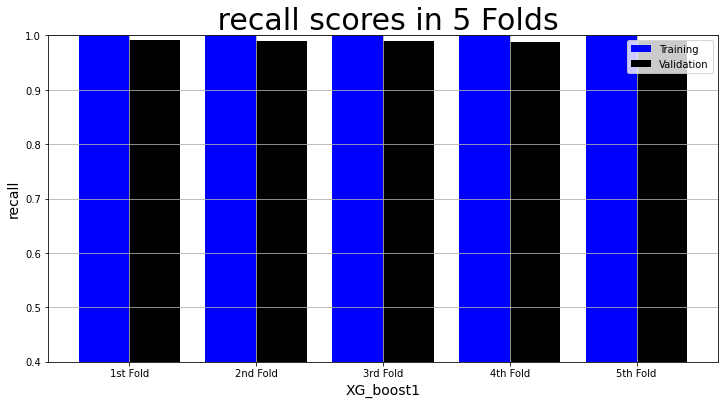

In [ ]:
# Plot recall Result
model_name = "XG_boost1"
plot_result(model_name,
            "recall",
            " recall scores in 5 Folds",
            results["train_recall"],
            results["test_recall"])



*   The bar graph above shows the recall score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* The train folds have the same recall.
*  The 1 and the 5 validation folds have approximately the same recall. These are the folds with the highest recall 

**Building models for oversampled data**

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Lregression1", LogisticRegression(random_state=1)))
models.append(("Bagging_t1", BaggingClassifier(random_state=1)))
models.append(("Dtree1", DecisionTreeClassifier(random_state=1)))
models.append(("randomforest1", RandomForestClassifier(random_state=1)))
models.append(("Ada_boost1", AdaBoostClassifier(random_state=1)))
models.append(("Gradient_boost1", GradientBoostingClassifier(random_state=1)))
models.append(("XG_boost1", XGBClassifier(random_state=1))) ## Complete the code to append remaining 4 models in the list models

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=x_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(x_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(x_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Lregression1: 0.883963699328486
Bagging_t1: 0.9762141471581656
Dtree1: 0.9720494245534969
randomforest1: 0.9839075260047615
Ada_boost1: 0.8978689011775473
Gradient_boost1: 0.9256068151319724
XG_boost1: 0.989554053559209

Validation Performance:

Lregression1: 0.8489208633093526
Bagging_t1: 0.8345323741007195
Dtree1: 0.7769784172661871
randomforest1: 0.8489208633093526
Ada_boost1: 0.8561151079136691
Gradient_boost1: 0.8776978417266187
XG_boost1: 0.8669064748201439


* The output above shows comparision between the cv of the train set data and the cv of the validation set data.
* Ada boost model is the best performing model as it does not overfit data and also has a high cv compared to logistic regression model

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
x_train_un, y_train_un = rus.fit_resample(x_train, y_train)

In [ ]:
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(x_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 832
Before UnderSampling, counts of label '0': 14168 

After UnderSampling, counts of label '1': 832
After UnderSampling, counts of label '0': 832 

After UnderSampling, the shape of train_X: (1664, 40)
After UnderSampling, the shape of train_y: (1664,) 



*  The output shows comparison of data before underfitting and after underfitting

**Decision tree model**

In [ ]:
# defining the model
Dtree2 = DecisionTreeClassifier(random_state = 1)
Dtree2.fit(x_train_un,y_train_un)
scoring1 = ['accuracy', 'precision', 'recall', 'f1']
# storing accuracy values of model for every fold in "results"
results = cross_validate(Dtree2, x_train_un, y_train_un, cv=k_fold, scoring= scoring1, return_train_score = True)
print("Training Accuracy scores:", results['train_accuracy'])
print( "Mean Training Accuracy: ", results['train_accuracy'].mean()*100)
print("Training Precision scores: ", results['train_precision'])
print("Mean Training Precision: " , results['train_precision'].mean())
print("Training Recall scores:" ,results['train_recall'])
print("Mean Training Recall: ", results['train_recall'].mean())
print("Training F1 scores: ", results['train_f1'])
print("Mean Training F1 Score: ", results['train_f1'].mean())
print("Validation Accuracy scores: ", results['test_accuracy'])
print("Mean Validation Accuracy: ", results['test_accuracy'].mean()*100)
print("Validation Precision scores: ", results['test_precision'])
print("Mean Validation Precision: ", results['test_precision'].mean())
print("Validation Recall scores: ", results['test_recall'])
print("Mean Validation Recall: ", results['test_recall'].mean())
print("Validation F1 scores: ", results['test_f1'])
print("Mean Validation F1 Score: ", results['test_f1'].mean())

Training Accuracy scores: [1. 1. 1. 1. 1.]
Mean Training Accuracy:  100.0
Training Precision scores:  [1. 1. 1. 1. 1.]
Mean Training Precision:  1.0
Training Recall scores: [1. 1. 1. 1. 1.]
Mean Training Recall:  1.0
Training F1 scores:  [1. 1. 1. 1. 1.]
Mean Training F1 Score:  1.0
Validation Accuracy scores:  [0.81381381 0.84684685 0.84384384 0.82582583 0.81927711]
Mean Validation Accuracy:  82.99214877528132
Validation Precision scores:  [0.78835979 0.83225806 0.85276074 0.81065089 0.83428571]
Mean Validation Precision:  0.8236630381863831
Validation Recall scores:  [0.87134503 0.83766234 0.83233533 0.8404908  0.82485876]
Mean Validation Recall:  0.8413384501703162
Validation F1 scores:  [0.82777778 0.83495146 0.84242424 0.8253012  0.82954545]
Mean Validation F1 Score:  0.8320000271754863


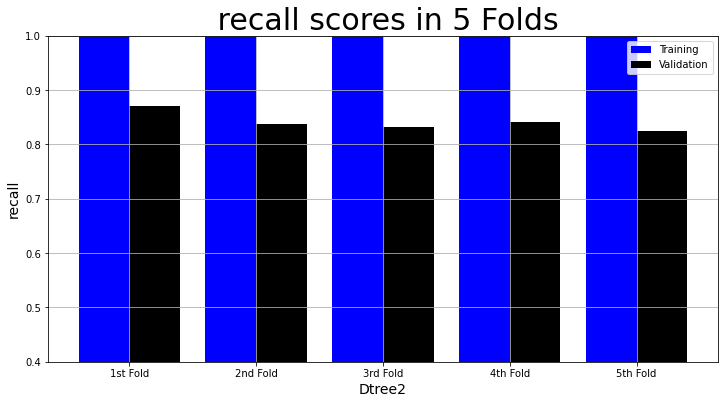

In [ ]:
# Plot recall Result
model_name = "Dtree2"
plot_result(model_name,
            "recall",
            " recall scores in 5 Folds",
            results["train_recall"],
            results["test_recall"])



*   The bar graph above shows the recall score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* The train folds have the same recall.
* The 1 validation fold has approximately the highest recall.

**Random Forest model**

In [ ]:
# defining the model
randomforest2 = RandomForestClassifier(random_state=1)
randomforest2.fit(x_train_un, y_train_un)
scoring1 = ['accuracy', 'precision', 'recall', 'f1']
# storing accuracy values of model for every fold in "results"
results = cross_validate(randomforest2, x_train_un, y_train_un, cv=k_fold, scoring= scoring1, return_train_score = True)
print("Training Accuracy scores:", results['train_accuracy'])
print( "Mean Training Accuracy: ", results['train_accuracy'].mean()*100)
print("Training Precision scores: ", results['train_precision'])
print("Mean Training Precision: " , results['train_precision'].mean())
print("Training Recall scores:" ,results['train_recall'])
print("Mean Training Recall: ", results['train_recall'].mean())
print("Training F1 scores: ", results['train_f1'])
print("Mean Training F1 Score: ", results['train_f1'].mean())
print("Validation Accuracy scores: ", results['test_accuracy'])
print("Mean Validation Accuracy: ", results['test_accuracy'].mean()*100)
print("Validation Precision scores: ", results['test_precision'])
print("Mean Validation Precision: ", results['test_precision'].mean())
print("Validation Recall scores: ", results['test_recall'])
print("Mean Validation Recall: ", results['test_recall'].mean())
print("Validation F1 scores: ", results['test_f1'])
print("Mean Validation F1 Score: ", results['test_f1'].mean())

Training Accuracy scores: [1. 1. 1. 1. 1.]
Mean Training Accuracy:  100.0
Training Precision scores:  [1. 1. 1. 1. 1.]
Mean Training Precision:  1.0
Training Recall scores: [1. 1. 1. 1. 1.]
Mean Training Recall:  1.0
Training F1 scores:  [1. 1. 1. 1. 1.]
Mean Training F1 Score:  1.0
Validation Accuracy scores:  [0.92192192 0.93393393 0.92192192 0.92192192 0.93072289]
Mean Validation Accuracy:  92.6084518253193
Validation Precision scores:  [0.95031056 0.94594595 0.9378882  0.94771242 0.97530864]
Mean Validation Precision:  0.9514331527971767
Validation Recall scores:  [0.89473684 0.90909091 0.90419162 0.88957055 0.89265537]
Mean Validation Recall:  0.8980490574683033
Validation F1 scores:  [0.92168675 0.92715232 0.92073171 0.91772152 0.93215339]
Mean Validation F1 Score:  0.923889136700709


**plotting the recall of the random forest model**

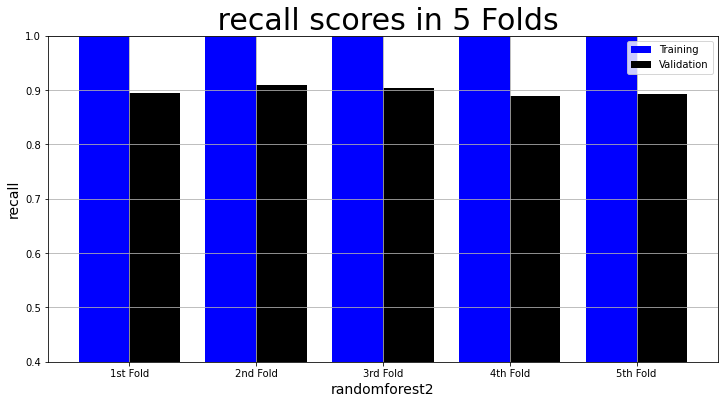

In [ ]:
# Plot recall Result
model_name = "randomforest2"
plot_result(model_name,
            "recall",
            " recall scores in 5 Folds",
            results["train_recall"],
            results["test_recall"])



*   The bar graph above shows the recall score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* The train folds have the same recall.
* The 2 validation fold has approximately the highest recall.

**logistic regression model**

In [ ]:
# defining the model
Lregression2 = LogisticRegression(random_state=1)
Lregression2.fit(x_train_un, y_train_un)
scoring1 = ['accuracy', 'precision', 'recall', 'f1']
# storing accuracy values of model for every fold in "results"
results = cross_validate(Lregression2, x_train_un, y_train_un, cv=k_fold, scoring= scoring1, return_train_score = True)
print("Training Accuracy scores:", results['train_accuracy'])
print( "Mean Training Accuracy: ", results['train_accuracy'].mean()*100)
print("Training Precision scores: ", results['train_precision'])
print("Mean Training Precision: " , results['train_precision'].mean())
print("Training Recall scores:" ,results['train_recall'])
print("Mean Training Recall: ", results['train_recall'].mean())
print("Training F1 scores: ", results['train_f1'])
print("Mean Training F1 Score: ", results['train_f1'].mean())
print("Validation Accuracy scores: ", results['test_accuracy'])
print("Mean Validation Accuracy: ", results['test_accuracy'].mean()*100)
print("Validation Precision scores: ", results['test_precision'])
print("Mean Validation Precision: ", results['test_precision'].mean())
print("Validation Recall scores: ", results['test_recall'])
print("Mean Validation Recall: ", results['test_recall'].mean())
print("Validation F1 scores: ", results['test_f1'])
print("Mean Validation F1 Score: ", results['test_f1'].mean())

Training Accuracy scores: [0.87678437 0.8677686  0.8730278  0.87753569 0.87087087]
Mean Training Accuracy:  87.31974649330022
Training Precision scores:  [0.87368421 0.87240356 0.87349398 0.87315634 0.86983155]
Mean Training Precision:  0.8725139272302371
Training Recall scores: [0.87897126 0.86725664 0.87218045 0.88490284 0.86717557]
Mean Training Recall:  0.8740973513096117
Training F1 scores:  [0.87631976 0.86982249 0.87283672 0.87899035 0.86850153]
Mean Training F1 Score:  0.8732941682386339
Validation Accuracy scores:  [0.85285285 0.87087087 0.86786787 0.86486486 0.88855422]
Mean Validation Accuracy:  86.90021346647853
Validation Precision scores:  [0.86746988 0.8627451  0.87272727 0.86419753 0.89325843]
Mean Validation Precision:  0.8720796416230101
Validation Recall scores:  [0.84210526 0.85714286 0.86227545 0.85889571 0.89830508]
Mean Validation Recall:  0.8637448719339567
Validation F1 scores:  [0.85459941 0.85993485 0.86746988 0.86153846 0.89577465]
Mean Validation F1 Score: 

**plotting the recall of logistic regression**

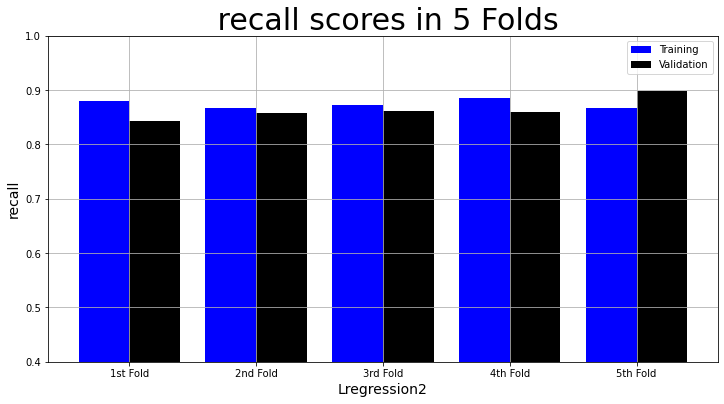

In [ ]:
# Plot recall Result
model_name = "Lregression2"
plot_result(model_name,
            "recall",
            " recall scores in 5 Folds",
            results["train_recall"],
            results["test_recall"])



*   The bar graph above shows the recall score of the kfolds. The blue one represents the train while the black coloured represents the validation.
* The 1 and 4 train folds have the same recall. These have the highest recall
* The 5 validation fold has approximately the highest recall.

**Bagging model**

In [ ]:
# defining the model
Bagging_t2 = BaggingClassifier(random_state=1)
Bagging_t2.fit(x_train_un, y_train_un)
scoring1 = ['accuracy', 'precision', 'recall', 'f1']
# storing accuracy values of model for every fold in "results"
results = cross_validate(Bagging_t2, x_train_un, y_train_un, cv=k_fold, scoring= scoring1, return_train_score = True)
print("Training Accuracy scores:", results['train_accuracy'])
print( "Mean Training Accuracy: ", results['train_accuracy'].mean()*100)
print("Training Precision scores: ", results['train_precision'])
print("Mean Training Precision: " , results['train_precision'].mean())
print("Training Recall scores:" ,results['train_recall'])
print("Mean Training Recall: ", results['train_recall'].mean())
print("Training F1 scores: ", results['train_f1'])
print("Mean Training F1 Score: ", results['train_f1'].mean())
print("Validation Accuracy scores: ", results['test_accuracy'])
print("Mean Validation Accuracy: ", results['test_accuracy'].mean()*100)
print("Validation Precision scores: ", results['test_precision'])
print("Mean Validation Precision: ", results['test_precision'].mean())
print("Validation Recall scores: ", results['test_recall'])
print("Mean Validation Recall: ", results['test_recall'].mean())
print("Validation F1 scores: ", results['test_f1'])
print("Mean Validation F1 Score: ", results['test_f1'].mean())

Training Accuracy scores: [0.99323817 0.99023291 0.99023291 0.98797896 0.98873874]
Mean Training Accuracy:  99.00843367785515
Training Precision scores:  [0.99847095 0.99850075 0.99847095 1.         0.99844237]
Mean Training Precision:  0.9987770026501798
Training Recall scores: [0.98789713 0.98230088 0.98195489 0.97608371 0.97862595]
Mean Training Recall:  0.9813725117930009
Training F1 scores:  [0.99315589 0.99033457 0.99014405 0.98789713 0.98843485]
Mean Training F1 Score:  0.9899932979537607
Validation Accuracy scores:  [0.90690691 0.91591592 0.91591592 0.88888889 0.90060241]
Mean Validation Accuracy:  90.56460074532365
Validation Precision scores:  [0.92168675 0.93150685 0.93710692 0.9375     0.95      ]
Mean Validation Precision:  0.9355601029084027
Validation Recall scores:  [0.89473684 0.88311688 0.89221557 0.82822086 0.85875706]
Mean Validation Recall:  0.871409443025404
Validation F1 scores:  [0.90801187 0.90666667 0.91411043 0.87947883 0.90207715]
Mean Validation F1 Score:  

**plotting recall for the bagging model**

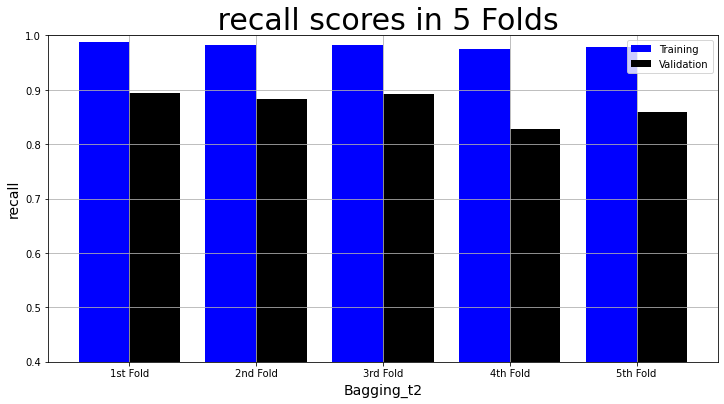

In [ ]:
# Plot recall Result
model_name = "Bagging_t2"
plot_result(model_name,
            "recall",
            " recall scores in 5 Folds",
            results["train_recall"],
            results["test_recall"])

* The plot above shows the recall scores of the 5 folds. 
* The 1 training fold has the highest recall
* The 3 and 1 validation folds have the maximum recall

######Boosting models

**Ada-Boost**

In [ ]:
# defining the model
ada_boost2 = AdaBoostClassifier(random_state=1)
ada_boost2.fit(x_train_un, y_train_un)
scoring1 = ['accuracy', 'precision', 'recall', 'f1']
# storing accuracy values of model for every fold in "results"
results = cross_validate(ada_boost2, x_train_un, y_train_un, cv=k_fold, scoring= scoring1, return_train_score = True)
print("Training Accuracy scores:", results['train_accuracy'])
print( "Mean Training Accuracy: ", results['train_accuracy'].mean()*100)
print("Training Precision scores: ", results['train_precision'])
print("Mean Training Precision: " , results['train_precision'].mean())
print("Training Recall scores:" ,results['train_recall'])
print("Mean Training Recall: ", results['train_recall'].mean())
print("Training F1 scores: ", results['train_f1'])
print("Mean Training F1 Score: ", results['train_f1'].mean())
print("Validation Accuracy scores: ", results['test_accuracy'])
print("Mean Validation Accuracy: ", results['test_accuracy'].mean()*100)
print("Validation Precision scores: ", results['test_precision'])
print("Mean Validation Precision: ", results['test_precision'].mean())
print("Validation Recall scores: ", results['test_recall'])
print("Mean Validation Recall: ", results['test_recall'].mean())
print("Validation F1 scores: ", results['test_f1'])
print("Mean Validation F1 Score: ", results['test_f1'].mean())

Training Accuracy scores: [0.92862509 0.92937641 0.92411721 0.92336589 0.92267267]
Mean Training Accuracy:  92.56314541438509
Training Precision scores:  [0.93140244 0.94242424 0.9378882  0.93548387 0.93809524]
Mean Training Precision:  0.9370587978538752
Training Recall scores: [0.92435703 0.91740413 0.90827068 0.9103139  0.90229008]
Mean Training Recall:  0.9125271637924346
Training F1 scores:  [0.92786636 0.92974589 0.92284186 0.92272727 0.91984436]
Mean Training F1 Score:  0.9246051494110992
Validation Accuracy scores:  [0.87687688 0.88588589 0.87687688 0.8978979  0.88855422]
Mean Validation Accuracy:  88.52183508810015
Validation Precision scores:  [0.88235294 0.86708861 0.87951807 0.90062112 0.90229885]
Mean Validation Precision:  0.8863759179295398
Validation Recall scores:  [0.87719298 0.88961039 0.8742515  0.88957055 0.88700565]
Mean Validation Recall:  0.8835262141874543
Validation F1 scores:  [0.8797654  0.87820513 0.87687688 0.89506173 0.89458689]
Mean Validation F1 Score: 

**Plotting the recall of ada-boost model**

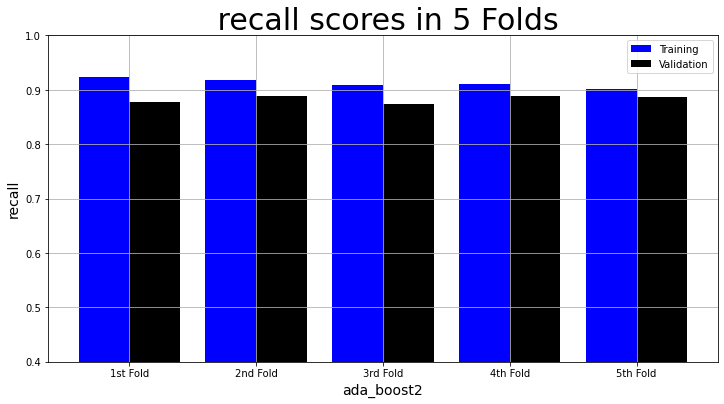

In [ ]:
# Plot recall Result
model_name = "ada_boost2"
plot_result(model_name,
            "recall",
            " recall scores in 5 Folds",
            results["train_recall"],
            results["test_recall"])

* The plot above shows the recall scores of the 5 folds. 
* The 1 training fold has the highest recall
* The 2 and 5 validation fold has the maximum recall

**Gradient boost**

In [ ]:
# defining the model
Gradient_boost2 = GradientBoostingClassifier(random_state=1)
Gradient_boost2.fit(x_train_un, y_train_un)
scoring1 = ['accuracy', 'precision', 'recall', 'f1']
# storing accuracy values of model for every fold in "results"
results = cross_validate(Gradient_boost2, x_train_un, y_train_un, cv=k_fold, scoring= scoring1, return_train_score = True)
print("Training Accuracy scores:", results['train_accuracy'])
print( "Mean Training Accuracy: ", results['train_accuracy'].mean()*100)
print("Training Precision scores: ", results['train_precision'])
print("Mean Training Precision: " , results['train_precision'].mean())
print("Training Recall scores:" ,results['train_recall'])
print("Mean Training Recall: ", results['train_recall'].mean())
print("Training F1 scores: ", results['train_f1'])
print("Mean Training F1 Score: ", results['train_f1'].mean())
print("Validation Accuracy scores: ", results['test_accuracy'])
print("Mean Validation Accuracy: ", results['test_accuracy'].mean()*100)
print("Validation Precision scores: ", results['test_precision'])
print("Mean Validation Precision: ", results['test_precision'].mean())
print("Validation Recall scores: ", results['test_recall'])
print("Mean Validation Recall: ", results['test_recall'].mean())
print("Validation F1 scores: ", results['test_f1'])
print("Mean Validation F1 Score: ", results['test_f1'].mean())

Training Accuracy scores: [0.97520661 0.97220135 0.97145004 0.97069872 0.96846847]
Mean Training Accuracy:  97.16050385471873
Training Precision scores:  [0.990625   0.98931298 0.99526066 0.9921875  0.9872814 ]
Mean Training Precision:  0.9909335079304901
Training Recall scores: [0.9591528  0.95575221 0.94736842 0.94917788 0.9480916 ]
Mean Training Recall:  0.9519085825428316
Training F1 scores:  [0.9746349  0.97224306 0.97072419 0.97020626 0.96728972]
Mean Training F1 Score:  0.9710196264024222
Validation Accuracy scores:  [0.9009009  0.91591592 0.91291291 0.90990991 0.90361446]
Mean Validation Accuracy:  90.86508194941929
Validation Precision scores:  [0.91566265 0.92       0.93125    0.92356688 0.91907514]
Mean Validation Precision:  0.9219109348183944
Validation Recall scores:  [0.88888889 0.8961039  0.89221557 0.88957055 0.89830508]
Mean Validation Recall:  0.8930167981496124
Validation F1 scores:  [0.90207715 0.90789474 0.91131498 0.90625    0.90857143]
Mean Validation F1 Score: 

**Plotting the recall of gradient boost model**

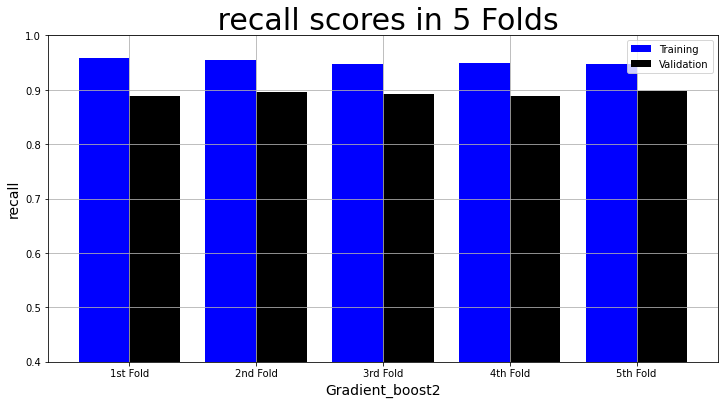

In [ ]:
# Plot recall Result
model_name = "Gradient_boost2"
plot_result(model_name,
            "recall",
            " recall scores in 5 Folds",
            results["train_recall"],
            results["test_recall"])

* The plot above shows the recall scores of the 5 folds. 
* The 1 training fold has the highest recall
* The 5 validation fold has the maximum recall

**XG boost**

In [ ]:
# defining the model
XG_boost2 = XGBClassifier(random_state=1)
XG_boost2.fit(x_train_un, y_train_un)
scoring1 = ['accuracy', 'precision', 'recall', 'f1']
# storing accuracy values of model for every fold in "results"
results = cross_validate(XG_boost2, x_train_un, y_train_un, cv=k_fold, scoring= scoring1, return_train_score = True)
print("Training Accuracy scores:", results['train_accuracy'])
print( "Mean Training Accuracy: ", results['train_accuracy'].mean()*100)
print("Training Precision scores: ", results['train_precision'])
print("Mean Training Precision: " , results['train_precision'].mean())
print("Training Recall scores:" ,results['train_recall'])
print("Mean Training Recall: ", results['train_recall'].mean())
print("Training F1 scores: ", results['train_f1'])
print("Mean Training F1 Score: ", results['train_f1'].mean())
print("Validation Accuracy scores: ", results['test_accuracy'])
print("Mean Validation Accuracy: ", results['test_accuracy'].mean()*100)
print("Validation Precision scores: ", results['test_precision'])
print("Mean Validation Precision: ", results['test_precision'].mean())
print("Validation Recall scores: ", results['test_recall'])
print("Mean Validation Recall: ", results['test_recall'].mean())
print("Validation F1 scores: ", results['test_f1'])
print("Mean Validation F1 Score: ", results['test_f1'].mean())

Training Accuracy scores: [1. 1. 1. 1. 1.]
Mean Training Accuracy:  100.0
Training Precision scores:  [1. 1. 1. 1. 1.]
Mean Training Precision:  1.0
Training Recall scores: [1. 1. 1. 1. 1.]
Mean Training Recall:  1.0
Training F1 scores:  [1. 1. 1. 1. 1.]
Mean Training F1 Score:  1.0
Validation Accuracy scores:  [0.9009009  0.92192192 0.92792793 0.91291291 0.9246988 ]
Mean Validation Accuracy:  91.76724917688773
Validation Precision scores:  [0.91566265 0.92666667 0.93865031 0.92948718 0.95238095]
Mean Validation Precision:  0.9325695511771348
Validation Recall scores:  [0.88888889 0.9025974  0.91616766 0.88957055 0.9039548 ]
Mean Validation Recall:  0.9002358621128153
Validation F1 scores:  [0.90207715 0.91447368 0.92727273 0.90909091 0.92753623]
Mean Validation F1 Score:  0.9160901407587065


**Plotting the recall of the folds**

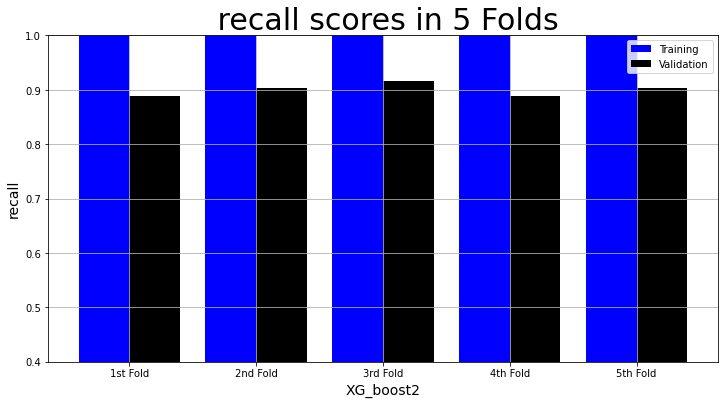

In [ ]:
# Plot recall Result
model_name = "XG_boost2"
plot_result(model_name,
            "recall",
            " recall scores in 5 Folds",
            results["train_recall"],
            results["test_recall"])

* The plot above shows the recall scores of the 5 folds. 
* The recall of the training folds are equal
* The 3 validation fold has the maximum recall

**Getting the recall score of the models created with undersampled data**

In [ ]:
#function to plot models and get recall score
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Lregression2", LogisticRegression(random_state=1)))
models.append(("Bagging_t2", BaggingClassifier(random_state=1)))
models.append(("Dtree2", DecisionTreeClassifier(random_state=1)))
models.append(("randomforest2", RandomForestClassifier(random_state=1)))
models.append(("ada_boost2", AdaBoostClassifier(random_state=1)))
models.append(("Gradient_boost2", GradientBoostingClassifier(random_state=1)))
models.append(("XG_boost2", XGBClassifier(random_state=1))) ## Complete the code to append remaining 4 models in the list models

results2 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=x_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(x_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(x_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Lregression2: 0.8726138085275232
Bagging_t2: 0.8641945025611427
Dtree2: 0.8617776495202367
randomforest2: 0.9038669648654498
ada_boost2: 0.8666113556020489
Gradient_boost2: 0.8990621167303946
XG_boost2: 0.9074742082100858

Validation Performance:

Lregression2: 0.8525179856115108
Bagging_t2: 0.8705035971223022
Dtree2: 0.841726618705036
randomforest2: 0.8920863309352518
ada_boost2: 0.8489208633093526
Gradient_boost2: 0.8884892086330936
XG_boost2: 0.9028776978417267


* The output above shows the cross validation performance on the train set and tghe validation set of different models.
* The best performing model is the xg boost model. It is not overfitting data

**plotting boxplots to compare the models**

## HyperparameterTuning 

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Sample tuning method for Decision tree with original data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7], 
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.5684366207344347:


* The cv score of the model with original data is 0.5684

### Sample tuning method for Decision tree with oversampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7], 
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 3} with CV score=0.9102913265648006:


* The cv score of the model with oversampled data is 0.9102

### Sample tuning method for Decision tree with undersampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7], 
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 5, 'max_depth': 2} with CV score=0.850811629752543:


* The cv score of the model with undersampled data is 0.8508

**creating a pipeline for the model with the highest cv score compared to all models**

In [ ]:
# Creating new pipeline with best parameters
tuned_Dtree_over= DecisionTreeClassifier(
    min_samples_leaf =  7 ,min_impurity_decrease =  0.001, max_leaf_nodes = 15,  max_depth=3, random_state=1)
## Complete the code with the best parameters obtained from tuning

tuned_Dtree_over.fit(x_train_over,y_train_over) ## Complete the code to fit the model on oversampled data

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, min_samples_leaf=7,
                       random_state=1)

In [ ]:
Dtree_train_over_perf = model_performance_classification_sklearn(tuned_Dtree_over, x_train_over, y_train_over)
Dtree_train_over_perf

,Accuracy,Recall,Precision,F1
0,0.843,0.917,0.799,0.854


In [ ]:
Dtree_val_over_perf = model_performance_classification_sklearn(tuned_Dtree_over, x_val, y_val)
Dtree_val_over_perf

,Accuracy,Recall,Precision,F1
0,0.763,0.885,0.176,0.294




*   The output above shows the performance of the model on the train and validation set. The model is still overfitting data. 
* The precision of the validation set is very low.




###Random forest

######Sample tuning random forest with normal data

In [ ]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_par

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.6996248466921577:


* The tuned random forest with original data has a cv score of 0.6996

######sample tuning random forest with oversampled data

In [ ]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_par

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9815078165615898:


* The cv of a random forest oversampled data is 0.9815

######sample tuning random forest with undersampled data

In [ ]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_par

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.8978140105331505:


* The cv score of a random forest with undersampled data is 0.8978

**creating a pipeline of the tuned  random forest model with the best cv score**

In [ ]:
# Creating new pipeline with best parameters
tuned_randomforest_over = RandomForestClassifier(
    n_estimators= 250 , min_samples_leaf = 1, max_samples = 0.6, max_features =  'sqrt'
) ## Complete the code with the best parameters obtained from tuning

tuned_randomforest_over.fit(x_train_over, y_train_over) ## Complete the code to fit the model on oversampled data

RandomForestClassifier(max_samples=0.6, n_estimators=250)

In [ ]:
randomforest_train_over_perf = model_performance_classification_sklearn(tuned_randomforest_over, x_train_over, y_train_over)
randomforest_train_over_perf

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [ ]:
randomforest_val_over_perf = model_performance_classification_sklearn(tuned_randomforest_over, x_val, y_val)
randomforest_val_over_perf

,Accuracy,Recall,Precision,F1
0,0.988,0.867,0.916,0.891


* The output above shows us the performance metics of the random forest. This model has a good performance even though it is overfitting data.

###Logistic regression

######Tuning logistic regression with normal data

In [ ]:
# defining model
Model = LogisticRegression(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'C': np.arange(0.1,1.1,0.1)}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'C': 0.2} with CV score=0.4952240098117019:


*Tuned logistic regression with original data has a cv of 0.49522

######Tuning using Oversampled data

In [ ]:
# defining model
Model = LogisticRegression(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'C': np.arange(0.1,1.1,0.1)}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'C': 0.1} with CV score=0.8838231041005031:


* Tuned logistic regression model with oversampled data has a cv of 0.8838

**creating a pipeline with oversampled data**

######Tuning using undersampled data

In [ ]:
# defining model
Model = LogisticRegression(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'C': np.arange(0.1,1.1,0.1)}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'C': 0.1} with CV score=0.8653560349181155:


* Tuned logistic regression model with undersampled data has a cv of 0.86535

**creating a pipeline of the model with best cv score**

In [ ]:
# Creating new pipeline with best parameters
tuned_Lregression_over = LogisticRegression(
    C = 0.1
) ## Complete the code with the best parameters obtained from tuning

tuned_Lregression_over.fit(x_train_over, y_train_over) ## Complete the code to fit the model on oversampled data

LogisticRegression(C=0.1)

In [ ]:
Lregression_train_over_perf = model_performance_classification_sklearn(tuned_Lregression_over, x_train_over, y_train_over)
Lregression_train_over_perf

,Accuracy,Recall,Precision,F1
0,0.880,0.884,0.878,0.881


In [ ]:
Lregression_val_over_perf = model_performance_classification_sklearn(tuned_Lregression_over, x_val, y_val)
Lregression_val_over_perf

,Accuracy,Recall,Precision,F1
0,0.868,0.849,0.277,0.418


* The output above shows us the performance metics of the random forest. This model has an optimum accuracy and recall.

###Bagging

######Tuning using normal data

In [ ]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.8, 'max_features': 0.9} with CV score=0.7308563595700166:


* Tuned bagging model with original data has a cv of 0.73085

######Using oversampled data

In [ ]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.8} with CV score=0.9828488269988673:


* Tuned bagging model with oversampled data has a cv of 0.98284

######Using undersampled data

In [ ]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.9} with CV score=0.8966236202294207:


* Tuned bagging model with undersampled data has a cv of 0.89662

**Building a pipeline of the model with the best cv**

In [ ]:
# Creating new pipeline with best parameters
tuned_Bagging_t_over = BaggingClassifier(
    n_estimators= 70, max_samples = 0.9, max_features = 0.8)
 ## Complete the code with the best parameters obtained from tuning

tuned_Bagging_t_over.fit(x_train_over, y_train_over) ## Complete the code to fit the model on oversampled data

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=70)

In [ ]:
Bagging_t_train_over_perf = model_performance_classification_sklearn(tuned_Bagging_t_over, x_train_over, y_train_over)
Bagging_t_train_over_perf

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [ ]:
Bagging_t_val_over_perf = model_performance_classification_sklearn(tuned_Bagging_t_over, x_val, y_val)
Bagging_t_val_over_perf

,Accuracy,Recall,Precision,F1
0,0.985,0.863,0.863,0.863


* The bagging model is overfitting data but it still has a good performance on the validation set.

###Boosting

###Ada-Boost

**Tuning using normal data**

In [ ]:
# defining model
Model = AdaBoostClassifier(random_state=1)

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), 
                       DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.7620734434744969:


* Tuned ada boost model with original data has a cv of 0.76207

**Tuning using oversampled data**

In [ ]:
# defining model
Model = AdaBoostClassifier(random_state=1)

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), 
                       DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9714853746337214:


* Tuned ada boost model with oversampled data has a cv of 0.9714853

**Tuning using undersampled data**

In [ ]:
# defining model
Model = AdaBoostClassifier(random_state=1)

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), 
                       DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters are {'n_estimators': 100, 'learning_rate': 0.05, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8846114998917827:


* Tuned ada boost model with undersampled data has a cv of 0.884611

**Building a pipeline with the best cv**

In [ ]:
# Creating new pipeline with best parameters
tuned_ada_over = AdaBoostClassifier(
    n_estimators= 200, learning_rate= 0.2, base_estimator= DecisionTreeClassifier(max_depth= 3, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_ada_over.fit(x_train_over,y_train_over) ## Complete the code to fit the model on oversampled data

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=200)

In [ ]:
ada_train_over_perf = model_performance_classification_sklearn(tuned_ada_over, x_train_over, y_train_over)
ada_train_over_perf

,Accuracy,Recall,Precision,F1
0,0.992,0.988,0.995,0.992


In [ ]:
ada_val_over_perf = model_performance_classification_sklearn(tuned_ada_over, x_val, y_val)
ada_val_over_perf

,Accuracy,Recall,Precision,F1
0,0.979,0.849,0.789,0.818


* The adaboost model has a good performance when comparing both the train set and the validation set

###Gradient boost

**Tuning using normal data**

In [ ]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.754895029218671:


* Tuned gradient boost model with original data has a cv of 0.75489

**Tuning using oversampled data**

In [ ]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 1} with CV score=0.9723322092856124:


* Tuned gradient boost model with oversampled data has a cv of 0.972332

**Tuning using undersampled data**

In [ ]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.2} with CV score=0.9014212538777866:


* Tuned gradient boost model with undersampled data has a cv of 0.90142

**Building a pipeline with the best cv**

In [ ]:
# Creating new pipeline with best parameters
tuned_Gradient_boost_over = GradientBoostingClassifier(
    n_estimators= 125, learning_rate= 1, subsample = 0.7, max_features = 0.5)
 ## Complete the code with the best parameters obtained from tuning

tuned_Gradient_boost_over.fit(x_train_over,y_train_over)## Complete the code to fit the model on oversampled data

GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           subsample=0.7)

In [ ]:
Gradient_train_over_perf = model_performance_classification_sklearn(tuned_Gradient_boost_over, x_train_over, y_train_over)
Gradient_train_over_perf

,Accuracy,Recall,Precision,F1
0,0.993,0.993,0.994,0.993


In [ ]:
Gradient_val_over_perf = model_performance_classification_sklearn(tuned_Gradient_boost_over, x_val, y_val)
Gradient_val_over_perf

,Accuracy,Recall,Precision,F1
0,0.967,0.842,0.659,0.739


* The gradient boost is performing okay on the train data but it's performnce drops on the validation data

###XG Boost

**Tuning using normal data**

In [ ]:
# defining model
Model = XGBClassifier(random_state=1)

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.8570088738186279:


* Tuned XG boost model with original data has a cv of 0.857008

**Tuning using oversampled data**

In [ ]:
# defining model
Model = XGBClassifier(random_state=1)

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.2, 'gamma': 0} with CV score=0.9956240108948847:


*  Tuned XG boost model with oversampled data has a cv of 0.9956

**Tuning using undersampled data**

In [ ]:
# defining model
Model = XGBClassifier(random_state=1)

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9266503138301709:


* * Tuned XG boost model with undesampled data has a cv of 0.92665

**Building a pipeline of the model with the best cv**

In [ ]:
# Creating new pipeline with best parameters
tuned_XG_boost_over = XGBClassifier(
    n_estimators= 200, learning_rate= 0.2,subsample = 0.9, scale_pos_weight =10 , gamma = 0)
 ## Complete the code with the best parameters obtained from tuning

tuned_XG_boost_over.fit(x_train_over,y_train_over) ## Complete the code to fit the model on oversampled data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
XG_train_over_perf = model_performance_classification_sklearn(tuned_XG_boost_over, x_train_over, y_train_over)
XG_train_over_perf

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [ ]:
XG_val_over_perf = model_performance_classification_sklearn(tuned_XG_boost_over, x_val, y_val)
XG_val_over_perf

,Accuracy,Recall,Precision,F1
0,0.982,0.874,0.818,0.845


* The XG model is overfitting the training set but performing well on the validation set compared to the rest of the models
* All the models that were performing well were from oversampled data. This shows that oversampling is a good way to deal with imbalanced data.

## Model performance comparison and choosing the final model

**Comparing models on training data**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
     Dtree_train_over_perf.T,
     randomforest_train_over_perf.T,
     Lregression_train_over_perf.T,
     Bagging_t_train_over_perf.T,
     ada_train_over_perf.T,
     Gradient_train_over_perf.T,
     XG_train_over_perf.T
        
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision tree tuned with oversampled data",
    "Random forest tuned with oversampled data",
    "Logistic Regression tuned with oversampled data",
    "Bagging classifier tuned with oversampled data",
    "AdaBoost  tuned with oversampled data",
    "Gradient boost tuned with oversampled data",
    "XGBoost tuned with oversampled data"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision tree tuned with oversampled data,Random forest tuned with oversampled data,Logistic Regression tuned with oversampled data,Bagging classifier tuned with oversampled data,AdaBoost tuned with oversampled data,Gradient boost tuned with oversampled data,XGBoost tuned with oversampled data
Accuracy,0.843,1.000,0.880,1.000,0.992,0.993,1.000
Recall,0.917,1.000,0.884,1.000,0.988,0.993,1.000
Precision,0.799,1.000,0.878,1.000,0.995,0.994,1.000
F1,0.854,1.000,0.881,1.000,0.992,0.993,1.000


* When checking the performance on the training set, many models are overfitting the data. We have to also check the performance on the validation set to see what to choose. 
* The random forest, XG boost, and bagging classifier are overfitting data

**comparison model on validation data**

In [ ]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
     Dtree_val_over_perf.T,
     randomforest_val_over_perf.T,
     Lregression_val_over_perf.T,
     Bagging_t_val_over_perf.T,
     ada_val_over_perf.T,
     Gradient_val_over_perf.T,
     XG_val_over_perf.T
        
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Decision tree tuned with oversampled data val results",
    "Random forest tuned with oversampled data val results",
    "Logistic Regression tuned with oversampled data val results",
    "Bagging classifier tuned with oversampled data val results",
    "AdaBoost  tuned with oversampled data val results",
    "Gradient boost tuned with oversampled data val results",
    "XGBoost tuned with oversampled data val results"
]
print("validation performance comparison:")
models_val_comp_df

validation performance comparison:


,Decision tree tuned with oversampled data val results,Random forest tuned with oversampled data val results,Logistic Regression tuned with oversampled data val results,Bagging classifier tuned with oversampled data val results,AdaBoost tuned with oversampled data val results,Gradient boost tuned with oversampled data val results,XGBoost tuned with oversampled data val results
Accuracy,0.763,0.988,0.868,0.985,0.979,0.967,0.982
Recall,0.885,0.867,0.849,0.863,0.849,0.842,0.874
Precision,0.176,0.916,0.277,0.863,0.789,0.659,0.818
F1,0.294,0.891,0.418,0.863,0.818,0.739,0.845


* When comparing the performance of the models on the validation data, the bagging classifier with oversampled data that has been tuned is optimal and a bit stable compared to the rest.

**Checking important features**

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
# Calculate feature importances using permutation importance
result = permutation_importance(tuned_Bagging_t_over, x_train_over, y_train_over)

# Print the feature importances
importance = result.importances_mean
for i, v in enumerate(importance):
    print('Feature %d: %.5f' % (i, v))

Feature 0: 0.00013
Feature 1: 0.00005
Feature 2: 0.00237
Feature 3: 0.00046
Feature 4: 0.02350
Feature 5: 0.00288
Feature 6: 0.00210
Feature 7: 0.00043
Feature 8: 0.00863
Feature 9: 0.00136
Feature 10: 0.00735
Feature 11: 0.00577
Feature 12: 0.00018
Feature 13: 0.01788
Feature 14: 0.00137
Feature 15: 0.02262
Feature 16: 0.00015
Feature 17: 0.06500
Feature 18: 0.00025
Feature 19: 0.00009
Feature 20: 0.00224
Feature 21: 0.00019
Feature 22: 0.00032
Feature 23: 0.00092
Feature 24: 0.00008
Feature 25: 0.02870
Feature 26: 0.00022
Feature 27: 0.00022
Feature 28: 0.00009
Feature 29: 0.00127
Feature 30: 0.00020
Feature 31: 0.00008
Feature 32: 0.00003
Feature 33: 0.00020
Feature 34: 0.00035
Feature 35: 0.10748
Feature 36: 0.00123
Feature 37: 0.00118
Feature 38: 0.01070
Feature 39: 0.00014


* The above output shows feature importance in the bagging oversampled model.
* The most important feature is feature 35 with 0.10748
* Feature 25 is next on the list with an importance of 0.02870
* The followed by feature 4, then feature 15.

### Test set final performance

In [ ]:
Bagging_test_over_perf = model_performance_classification_sklearn(tuned_Bagging_t_over, x_test, y_test)
Bagging_test_over_perf

,Accuracy,Recall,Precision,F1
0,0.984,0.823,0.889,0.855


* The bagging model performance on the unseen test data is very good. 
* It has a 98% accuracy. The other metrics are also not bad.

## Pipelines to build the final model


In [ ]:
#PIPELINE FOR THE BEST MODEL
Pipeline_model = Pipeline([('Tuned_BT',BaggingClassifier(
    n_estimators= 70, max_samples = 0.9, max_features = 0.8))] ) 

In [ ]:
# Separating target variable and other variables
X1 = df.drop(columns="Target", axis = 1)
Y1 = df["Target"]

X_test1 = df_test.drop(columns = 'Target', axis = 1) 
y_test1 = df_test['Target'] 


In [ ]:
#missing values treatment
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)

#test columns missing value treatment
imputer = SimpleImputer(strategy="median")
X_test1 = imputer.fit_transform(X_test1)


In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_over1, y_over1 = sm.fit_resample(X1, Y1)

In [ ]:
#fitting the pipeline model
Pipeline_model.fit(X_over1,y_over1)

Pipeline(steps=[('Tuned_BT',
                 BaggingClassifier(max_features=0.8, max_samples=0.9,
                                   n_estimators=70))])

**Checking the performance of the pipeline**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = Pipeline_model.predict(X_test1)

In [ ]:
#checking performance on test data
Pipeline_model_test = classification_report(y_test1, y_pred)
print(Pipeline_model_test)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4718
           1       0.89      0.84      0.87       282

    accuracy                           0.99      5000
   macro avg       0.94      0.92      0.93      5000
weighted avg       0.99      0.99      0.99      5000



* The pipeline performance is very good as seen in the output above

# Business Insights and Conclusions

**Best model**
- The best model to use is the tuned bagging model with oversampled data.
- It has an accuracy of  0.984, a recall of	0.823, a precision of	0.889 and a f1 score of	0.855 on the test data.
- As seen, the model is optimized.

**Important features**
- The important features in this model are V36, V26, V5 and V16.
- The tuned XG model with oversampled data is also a good model but the bagging model has a better performance compared to it.
- All in all models built from oversampled data performed better that models built from original data and undersampled data. 

***